In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
loan_df  = pd.read_csv('loan.csv', low_memory=False)

In [104]:
loan_df.shape

(39717, 111)

## Filter Loan Status

<p> As the Current loans are not going to help in identifying the driving factors of loan default filtering those records from the dataset

In [105]:
loan_df.shape

(39717, 111)

In [106]:
loan_df = loan_df[loan_df.loan_status != 'Current']

In [107]:
loan_df.shape

(38577, 111)

# Data Cleaning

## Removing NA / Unnecessary columns

#### Removing all NA columns

In [108]:
loan_df.dropna(axis=1, how='all', inplace=True)

In [109]:
loan_df.shape

(38577, 56)

#### Removing columns with more than 80% NA values

In [110]:
loan_df.drop(list(loan_df.columns[loan_df.isna().mean() > 0.8]), axis=1, inplace=True)

In [111]:
loan_df.shape

(38577, 55)

#### Removing all the columns with single values

In [112]:
singleValuedCols = [c for c in loan_df.columns if len(loan_df[c].value_counts()) == 1]
singleValuedCols

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [113]:
loan_df.drop(singleValuedCols, axis=1, inplace=True)

In [114]:
loan_df.shape

(38577, 44)

In [115]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### Removing the columns which do not have significant impact on the loan default

In [116]:
loan_df.drop(['id','member_id','url','collection_recovery_fee','last_pymnt_d','installment','recoveries', 'desc', 'title'], axis=1, inplace=True)


In [117]:
loan_df.shape

(38577, 35)

## Fixing Missing Values

In [118]:
loan_df.columns[loan_df.isna().sum() > 0]

Index(['emp_title', 'emp_length', 'mths_since_last_delinq', 'revol_util',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [119]:
len(loan_df[loan_df.emp_length.isna()])

1033

In [120]:
len(loan_df[loan_df.emp_title.isna()])

2386

In [121]:
loan_df.dropna(subset=['emp_length', 'emp_title'],inplace=True)

In [122]:
print("occurances of NA values : ")
print(loan_df.last_credit_pull_d[loan_df.last_credit_pull_d.isna()])

occurances of NA values : 
Series([], Name: last_credit_pull_d, dtype: object)


#### There are only two occurances of NA values for last_credit_pull_d. Imputing NA dates with issue_d considering the credit pull was done when the loan was issued

In [21]:
loan_df.last_credit_pull_d.fillna(loan_df.issue_d, inplace=True)

#### Using mode imputation on continuous columns

In [22]:
print("Mode : ", loan_df.mths_since_last_delinq.mode())
loan_df.mths_since_last_delinq.fillna(0, inplace=True)

Mode :  0    0.0
Name: mths_since_last_delinq, dtype: float64


In [23]:
print("Mode : ", loan_df.revol_util.mode())
loan_df.revol_util.fillna('0%', inplace=True)

Mode :  0    0%
Name: revol_util, dtype: object


In [24]:
print("Mode : ", loan_df.pub_rec_bankruptcies.mode())
loan_df.pub_rec_bankruptcies.fillna(0, inplace=True)

Mode :  0    0.0
Name: pub_rec_bankruptcies, dtype: float64


In [25]:
loan_df = loan_df.reset_index(drop=True)

## Correcting data types

<p> int_rate column can be used for range calculations but is derived as object
<p> emp_length column can be used for range calculations but is derived as object
<p> revol_util column can be used for range calculations but is derived as object



In [26]:
loan_df.dtypes

loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
total_acc                   int64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prnc

#### Fixing int_rate column

In [27]:
loan_df.int_rate.value_counts()

10.99%    862
11.49%    739
7.51%     732
13.49%    711
7.88%     674
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
15.01%      1
Name: int_rate, Length: 368, dtype: int64

In [28]:
loan_df.int_rate = loan_df.int_rate.apply(lambda x : float(str(x).rstrip('%')))

#### Fixing emp_length column

In [29]:
loan_df.emp_length.value_counts()

10+ years    8156
2 years      4178
< 1 year     4127
3 years      3901
4 years      3266
5 years      3091
1 year       3067
6 years      2099
7 years      1663
8 years      1391
9 years      1197
Name: emp_length, dtype: int64

In [30]:
loan_df.emp_length.replace('10+ years',10, inplace=True)

In [31]:
loan_df.emp_length.replace('< 1 year',0, inplace=True)

In [32]:
loan_df.emp_length = loan_df.emp_length.apply(lambda x : int(str(x).split(' year')[0]))

#### Fixing revol_util column

In [33]:
loan_df.revol_util.value_counts(normalize=True)*100

0%        2.515497
0.20%     0.163272
63%       0.160505
70.40%    0.152203
61%       0.149435
            ...   
0.54%     0.002767
77.63%    0.002767
25.74%    0.002767
0.83%     0.002767
7.28%     0.002767
Name: revol_util, Length: 1081, dtype: float64

In [34]:
loan_df.revol_util = loan_df.revol_util.apply(lambda x : float(str(x).split('%')[0]))

# Analysis

## Types Of variables

In [35]:
loan_df.columns.groupby(loan_df.dtypes)

{int64: ['loan_amnt', 'funded_amnt', 'emp_length', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc'], float64: ['funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies'], object: ['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d']}

#### Continuous Variables

<p> ['loan_amnt', 'funded_amnt', 'emp_length', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc']
    
<p> ['funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']
    
    
#### Non Continuous Variable
    
<p> ['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d']
    

In [36]:
continuous = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti', 'emp_length', 'annual_inc', 'delinq_2yrs', 'mths_since_last_delinq', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'open_acc', 'total_acc', 'revol_bal','revol_util', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']
continuous

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'dti',
 'emp_length',
 'annual_inc',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'inq_last_6mths',
 'pub_rec',
 'pub_rec_bankruptcies',
 'open_acc',
 'total_acc',
 'revol_bal',
 'revol_util',
 'total_pymnt',
 'total_pymnt_inv',
 'last_pymnt_amnt',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee']

In [37]:
categorical = ['term', 'emp_title', 'zip_code', 'addr_state',  'verification_status','issue_d','last_credit_pull_d', 'loan_status', 'purpose', 'grade', 'sub_grade', 'home_ownership', 'earliest_cr_line']
categorical

['term',
 'emp_title',
 'zip_code',
 'addr_state',
 'verification_status',
 'issue_d',
 'last_credit_pull_d',
 'loan_status',
 'purpose',
 'grade',
 'sub_grade',
 'home_ownership',
 'earliest_cr_line']

## Univariate Analaysis for continuous data

In [38]:
def annotate_boxplot(bpdict):
    
    minV = bpdict['caps'][0].get_ydata()[0]
    maxV = bpdict['caps'][1].get_ydata()[0]
    q1 = bpdict['boxes'][0].get_ydata()[0]
    q2 = bpdict['boxes'][0].get_ydata()[2]
    median = bpdict['medians'][0].get_ydata()[0]   
    
    
    plt.annotate(median, (1.10, median))
    plt.annotate(q1, (1.10, q1))
    plt.annotate(q2, (1.10, q2))
    plt.annotate(minV, (1.10, minV))
    plt.annotate(maxV, (1.10, maxV))

In [39]:
def univariate_plot_continuous(columnName):
    figure, axis=plt.subplots(nrows =1,ncols=2,figsize=(20,10))
    
    axis[0].set_title("Distribution Plot for "+columnName)
    sns.histplot(loan_df[columnName],ax=axis[0])
    
    axis[1].set_title("Box Plot for " + columnName)
    bplt = plt.boxplot(loan_df[columnName])
    annotate_boxplot(bplt)
    
    plt.show()

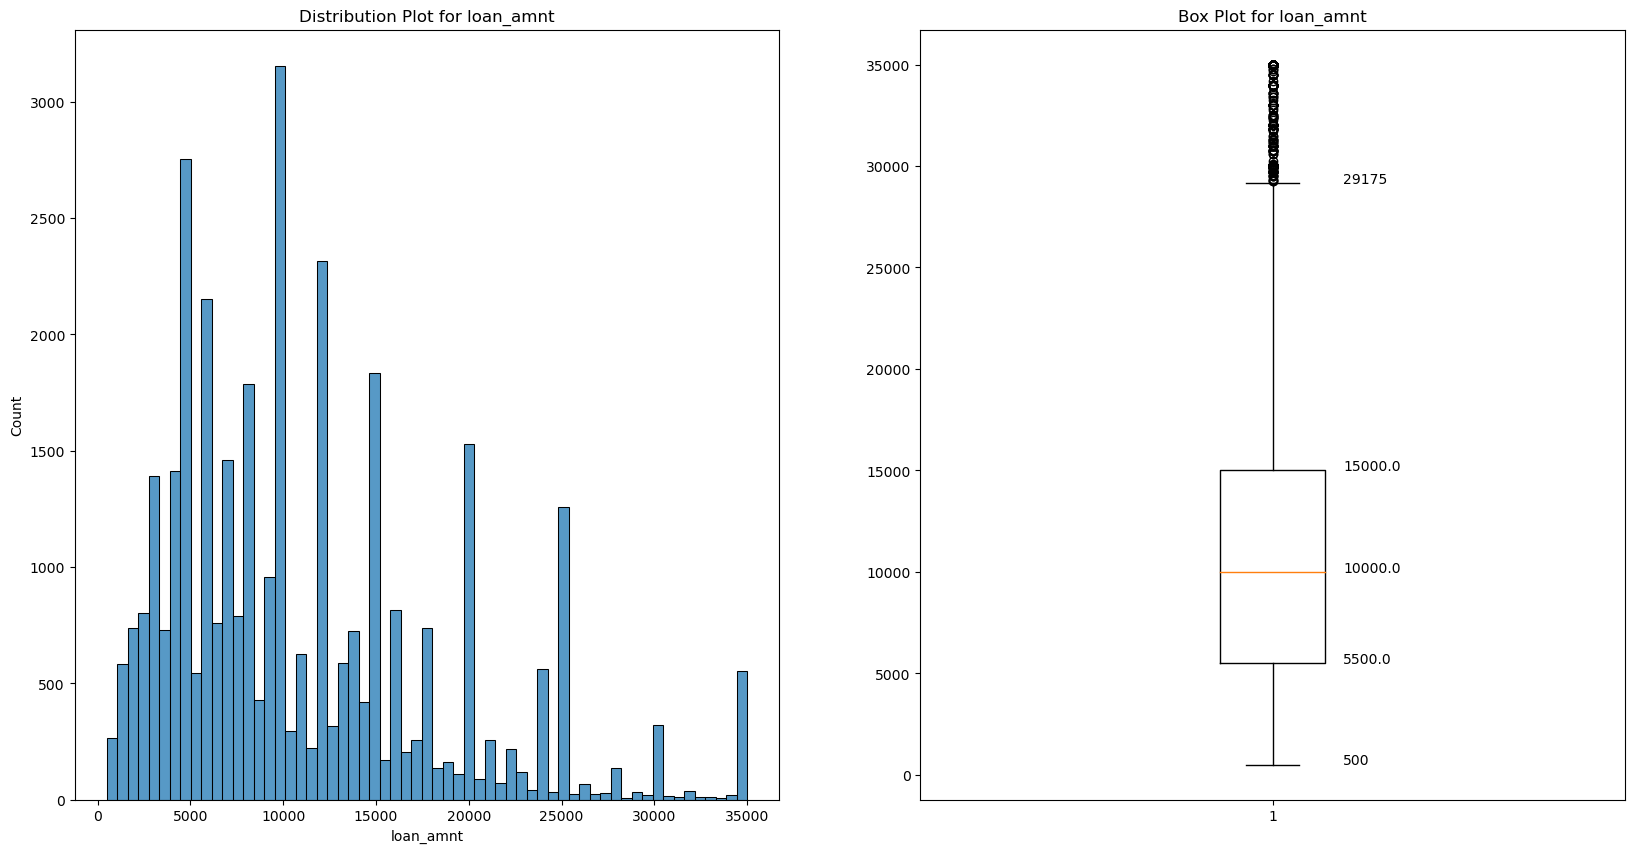

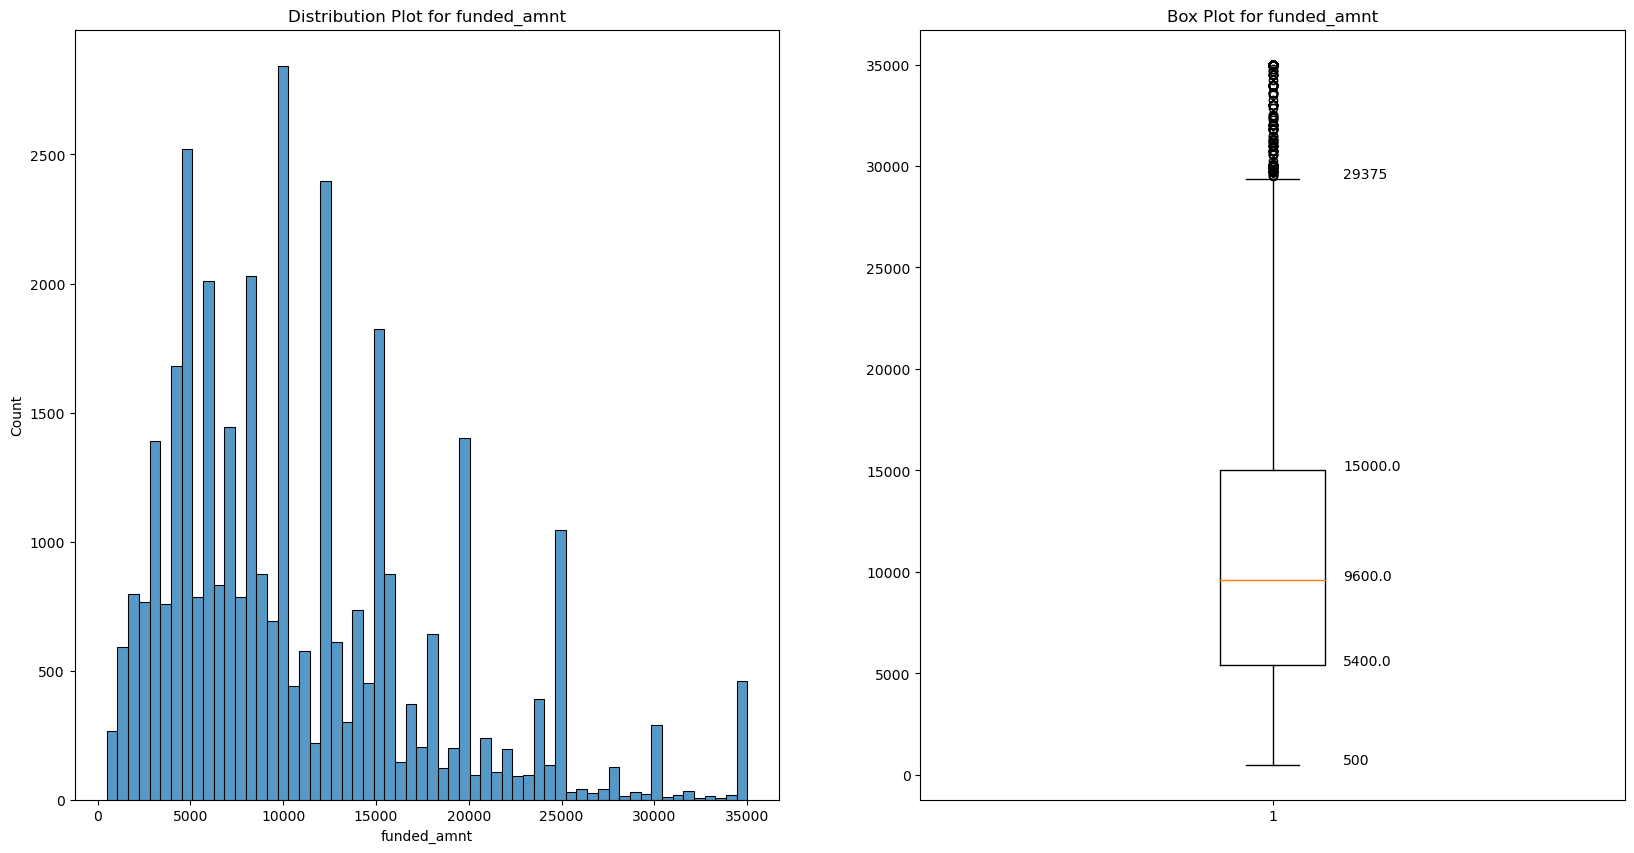

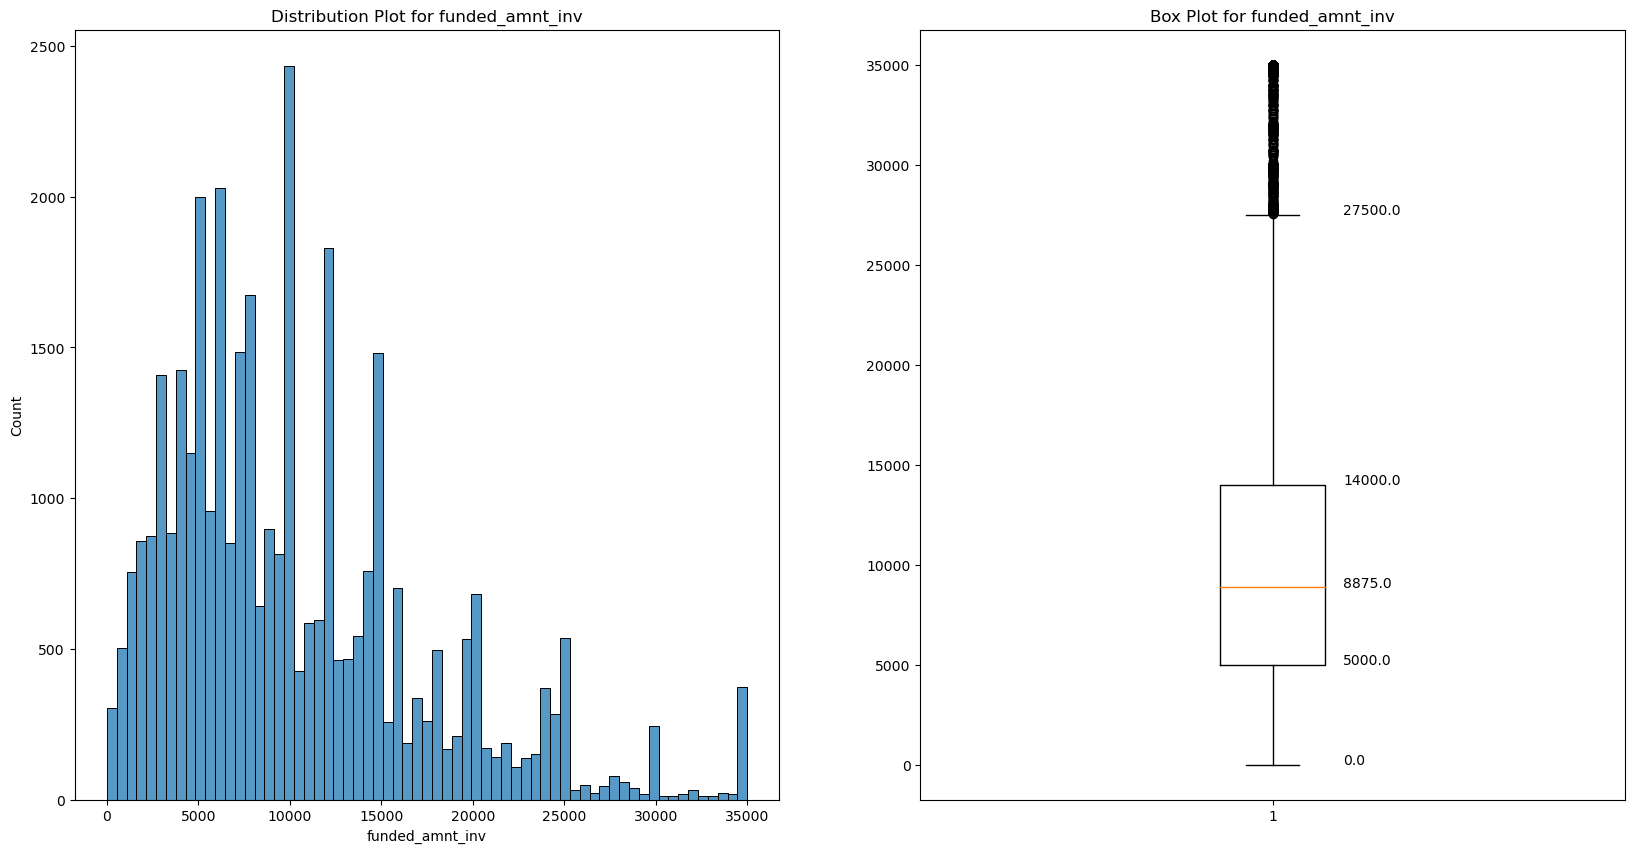

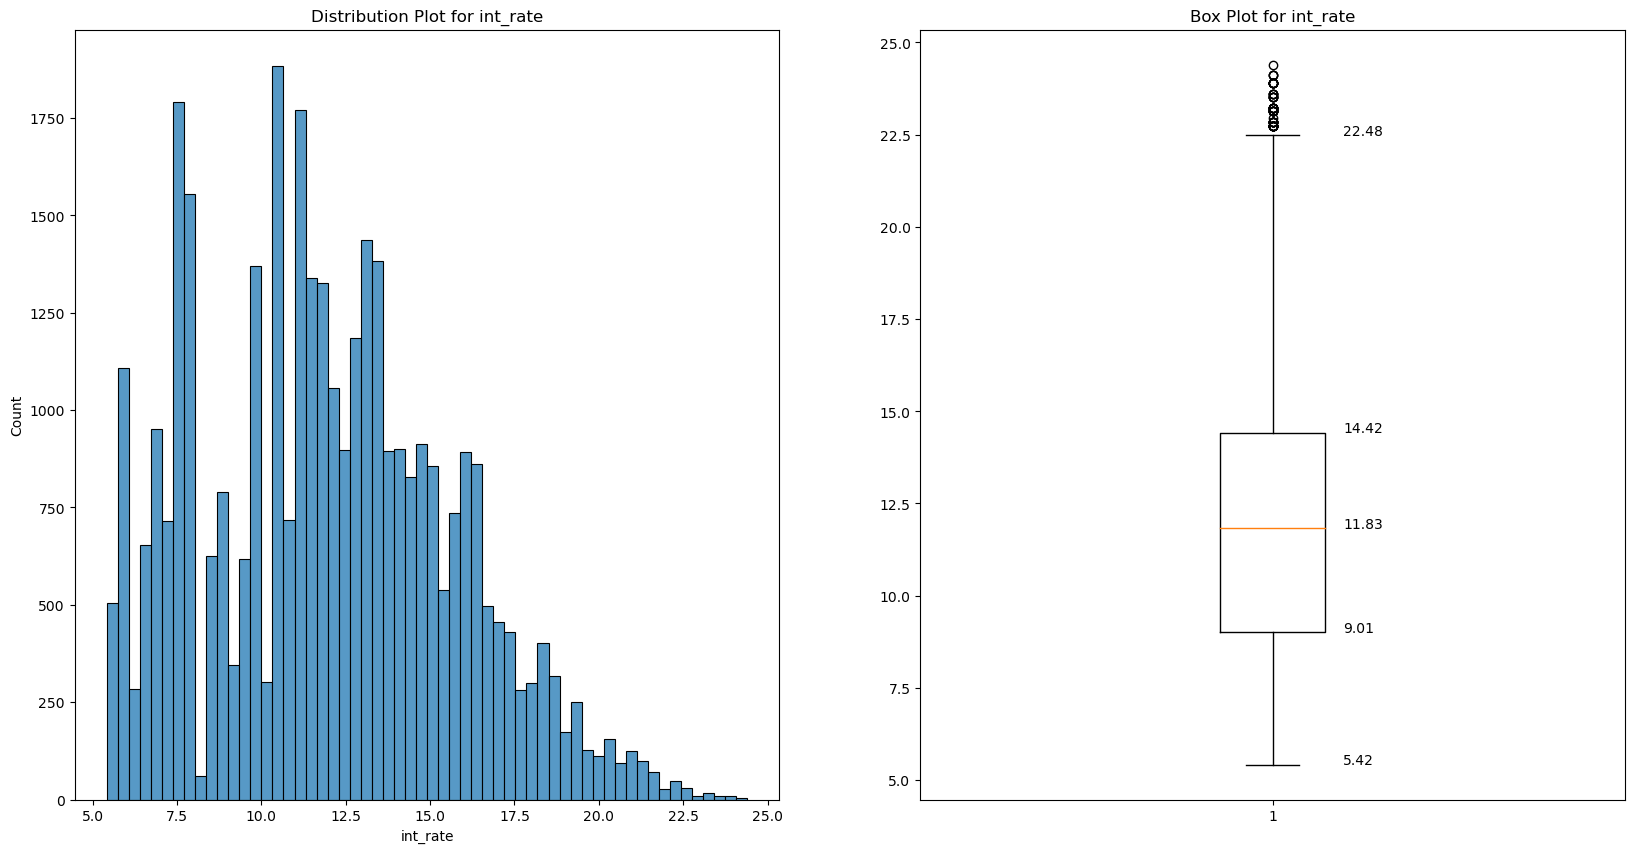

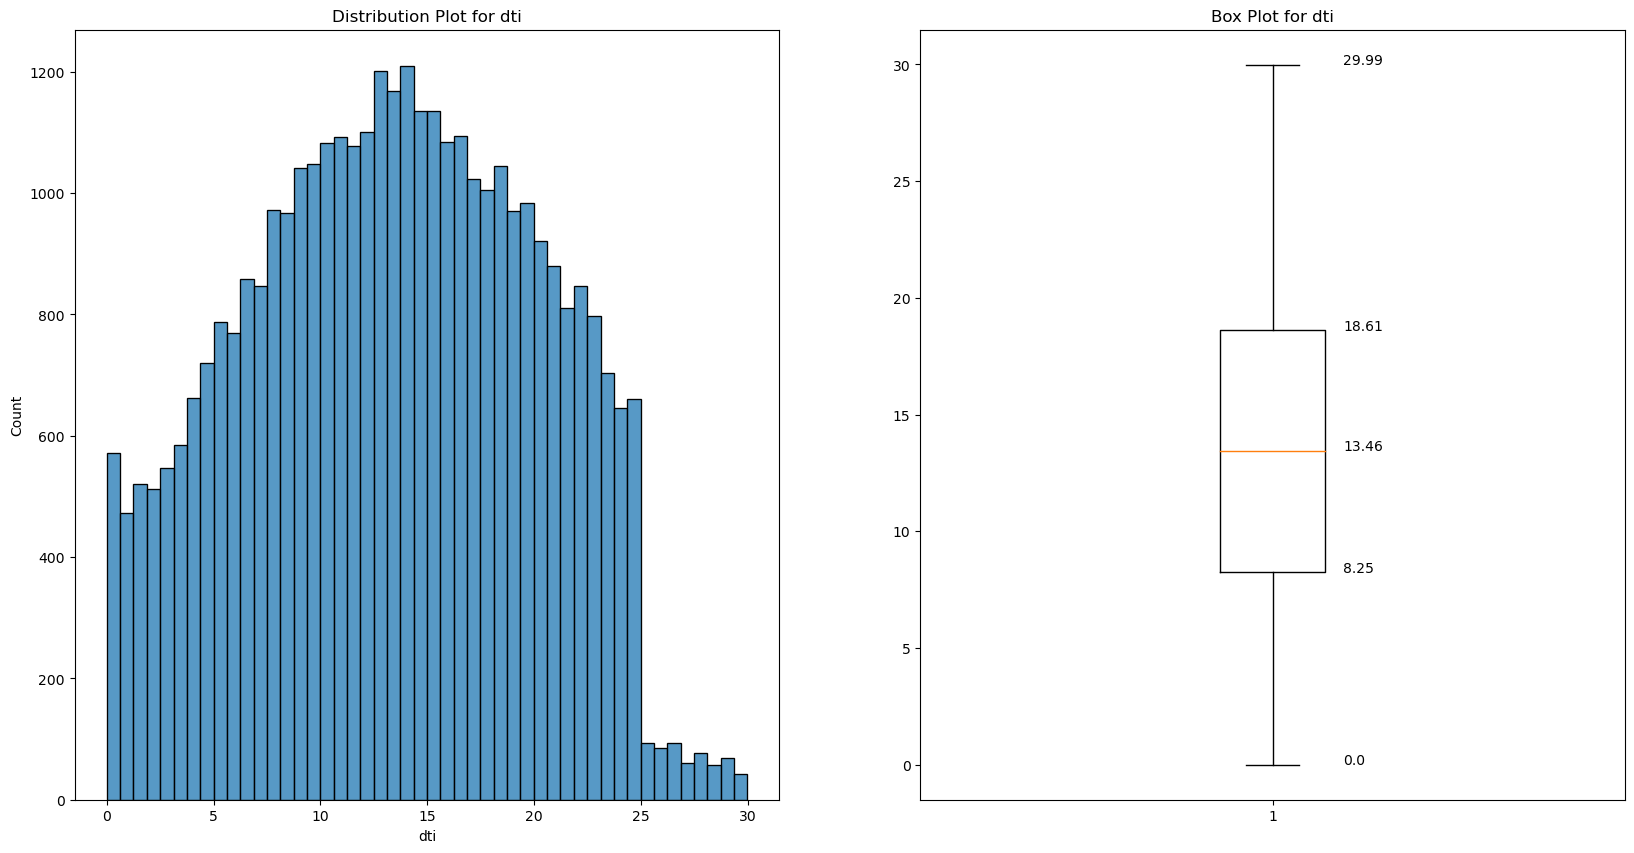

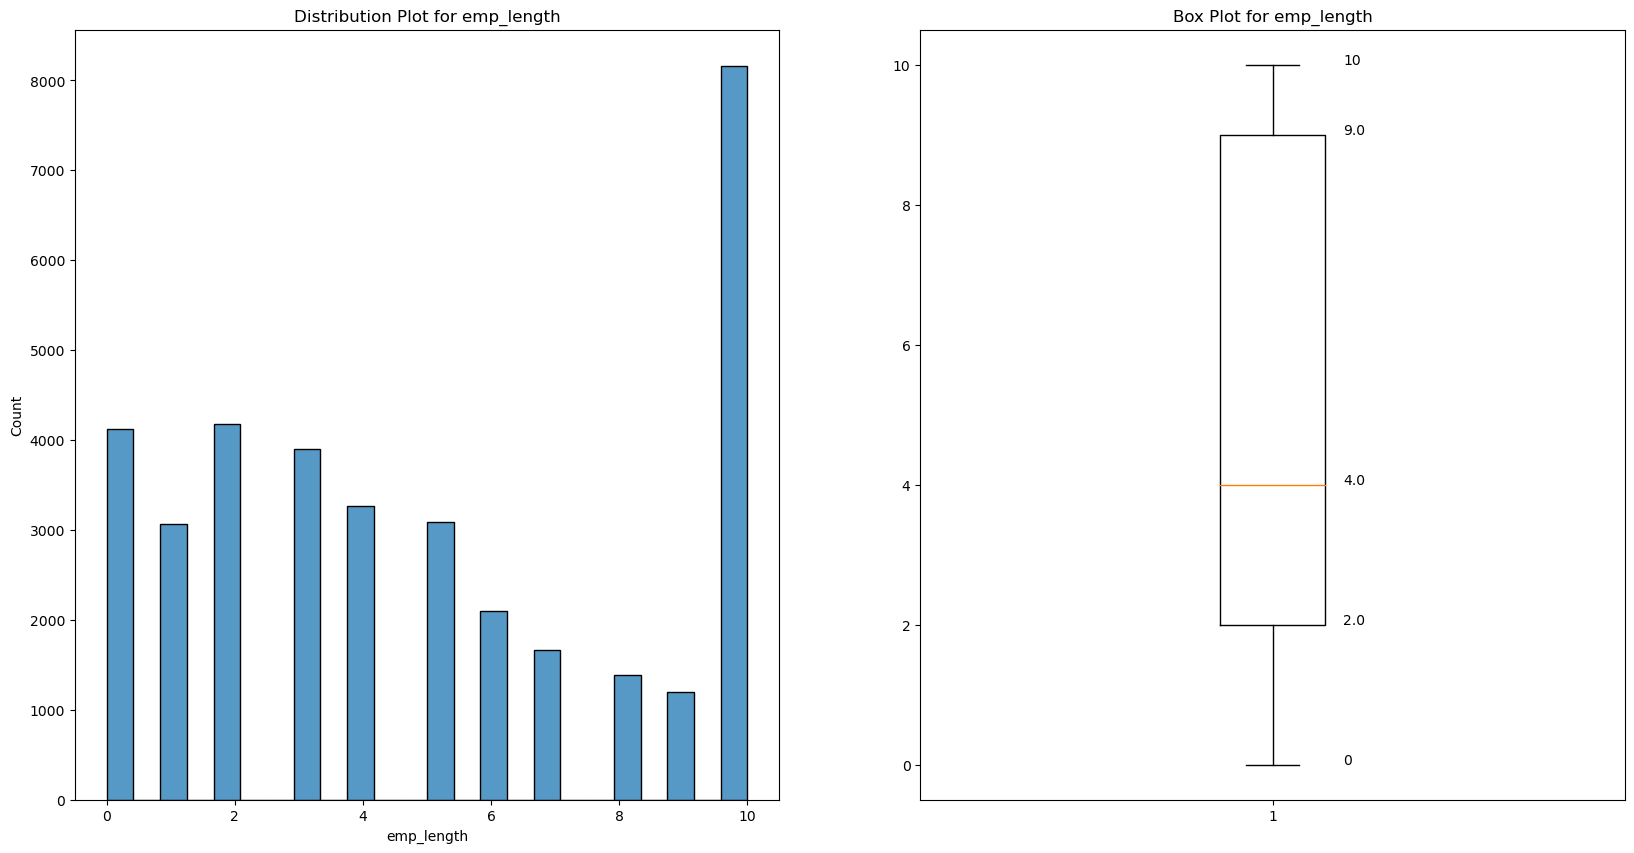

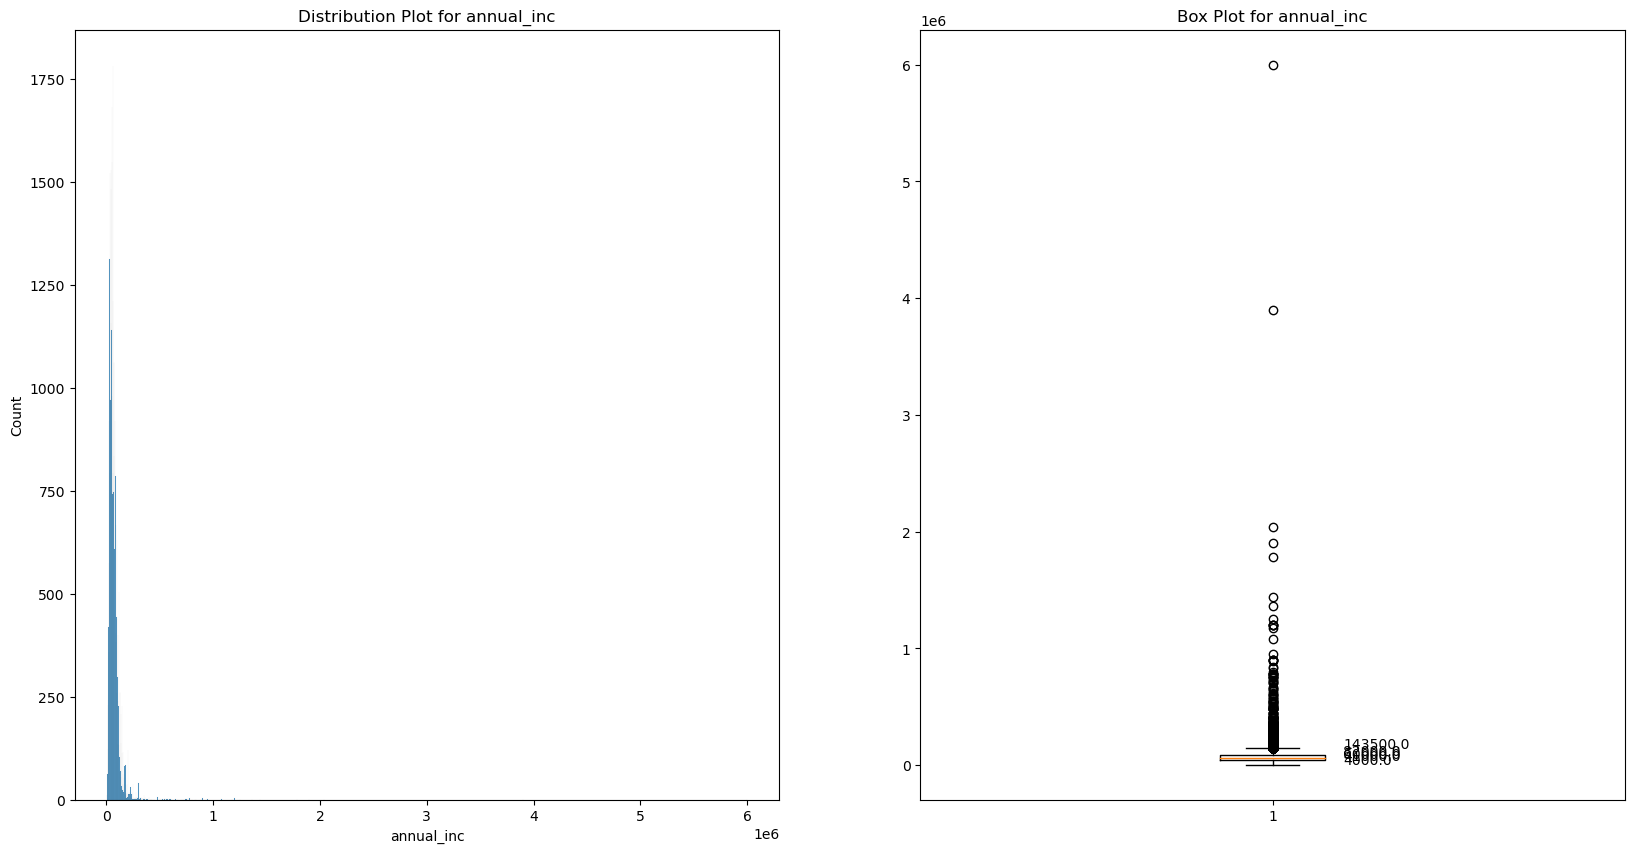

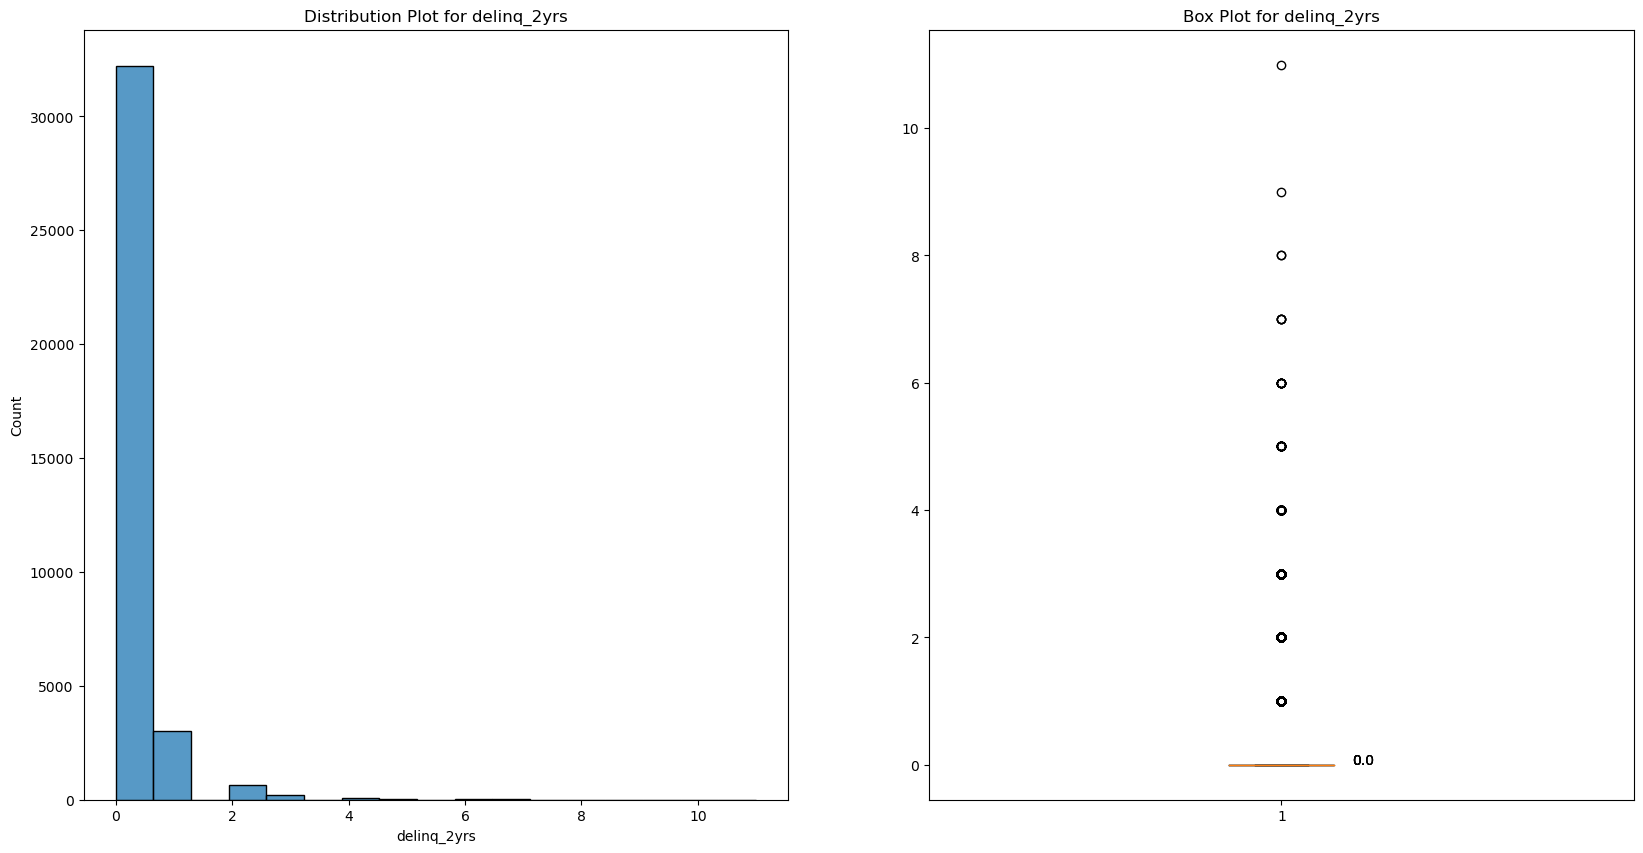

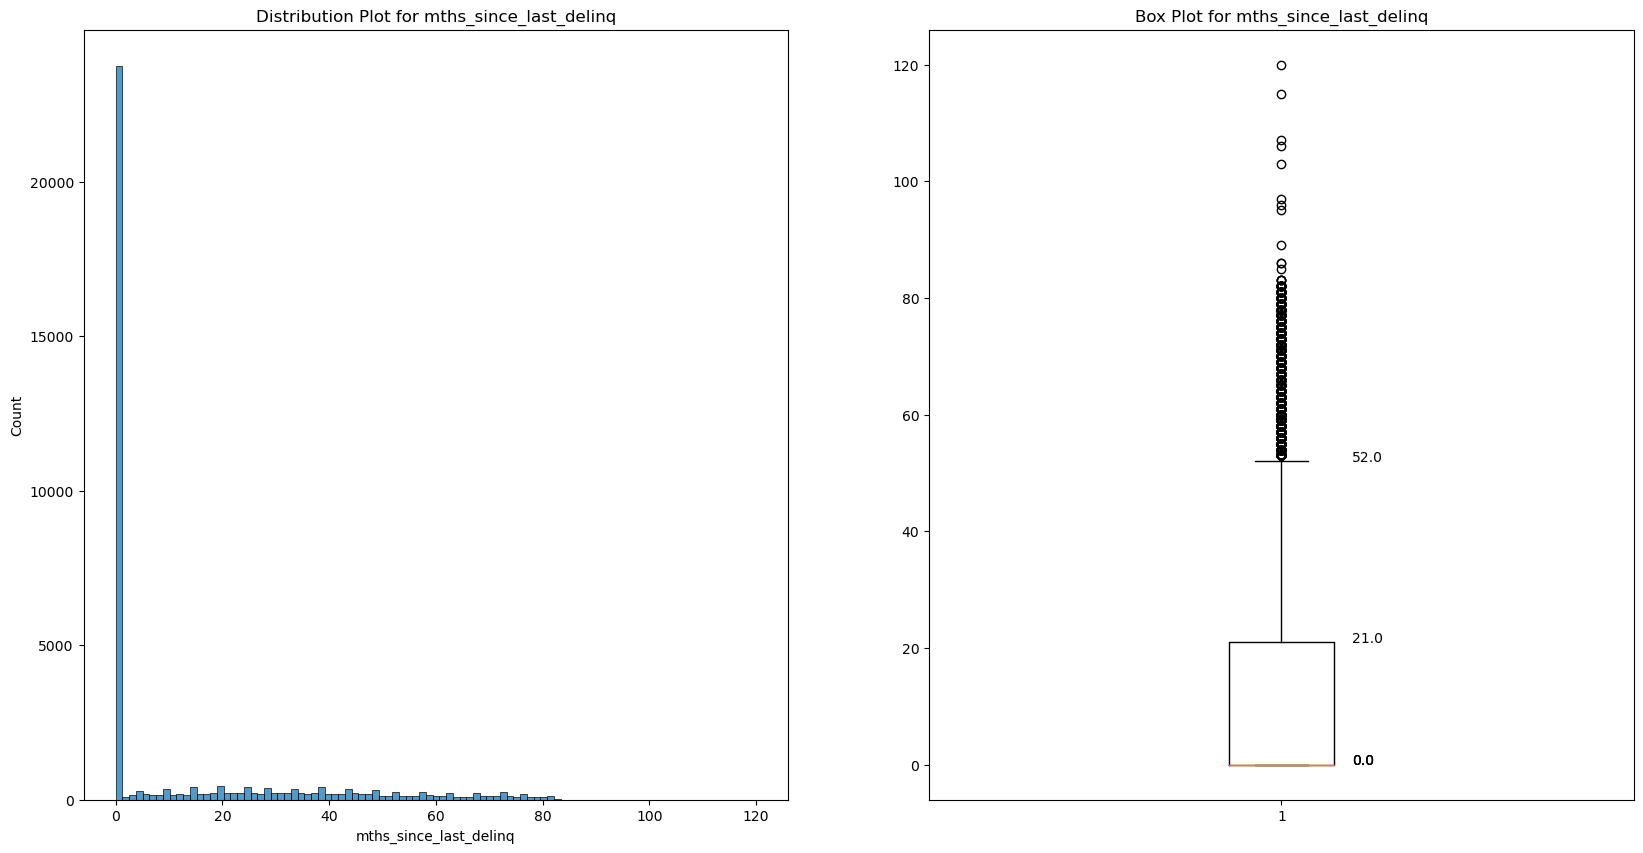

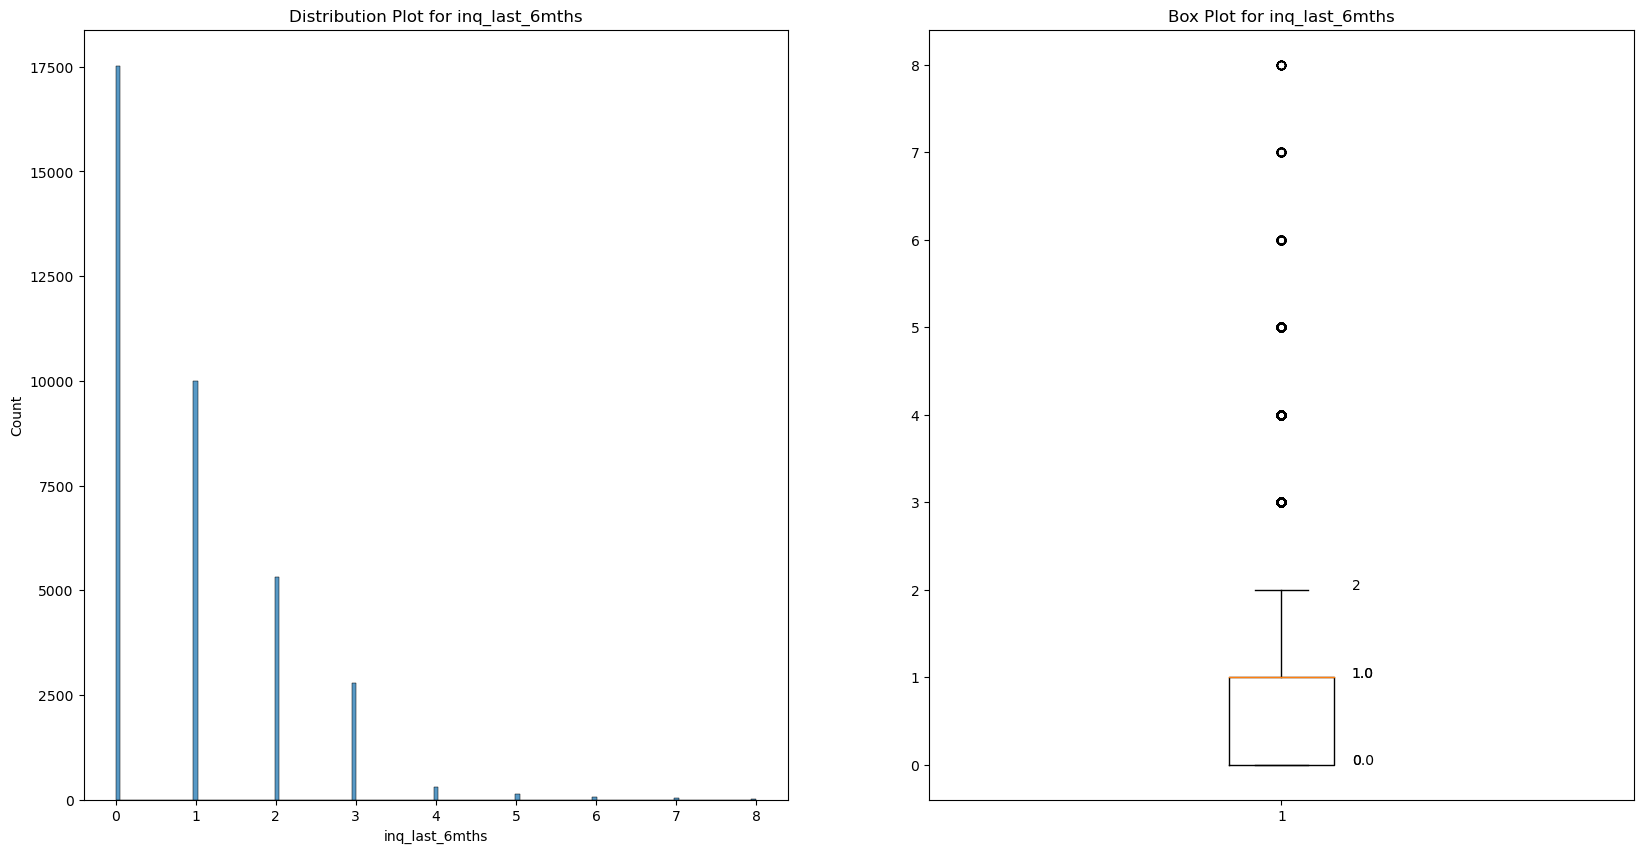

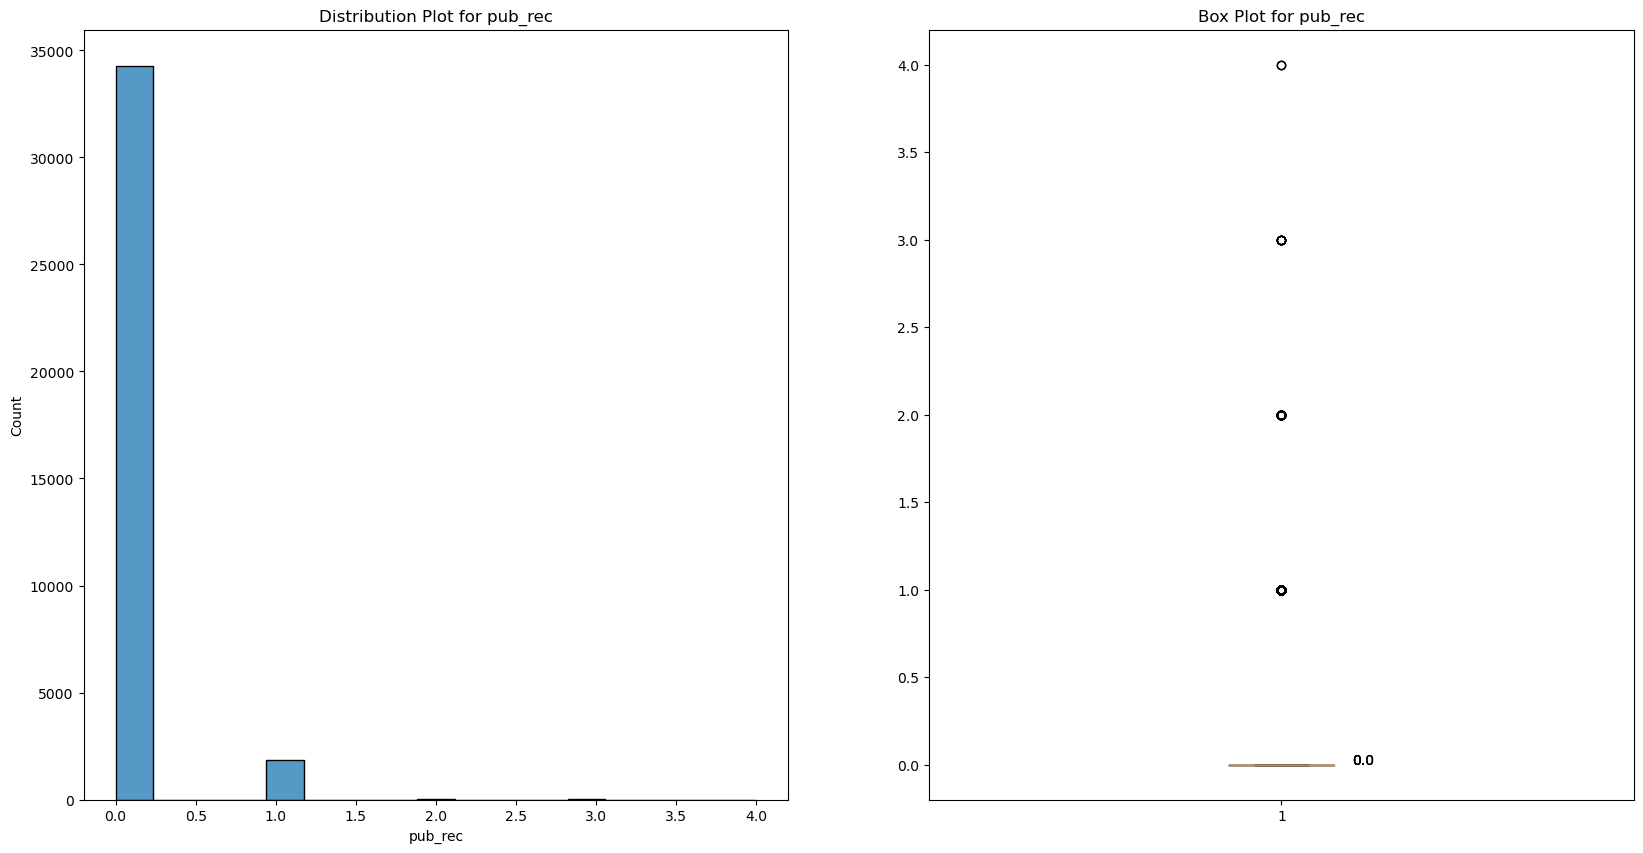

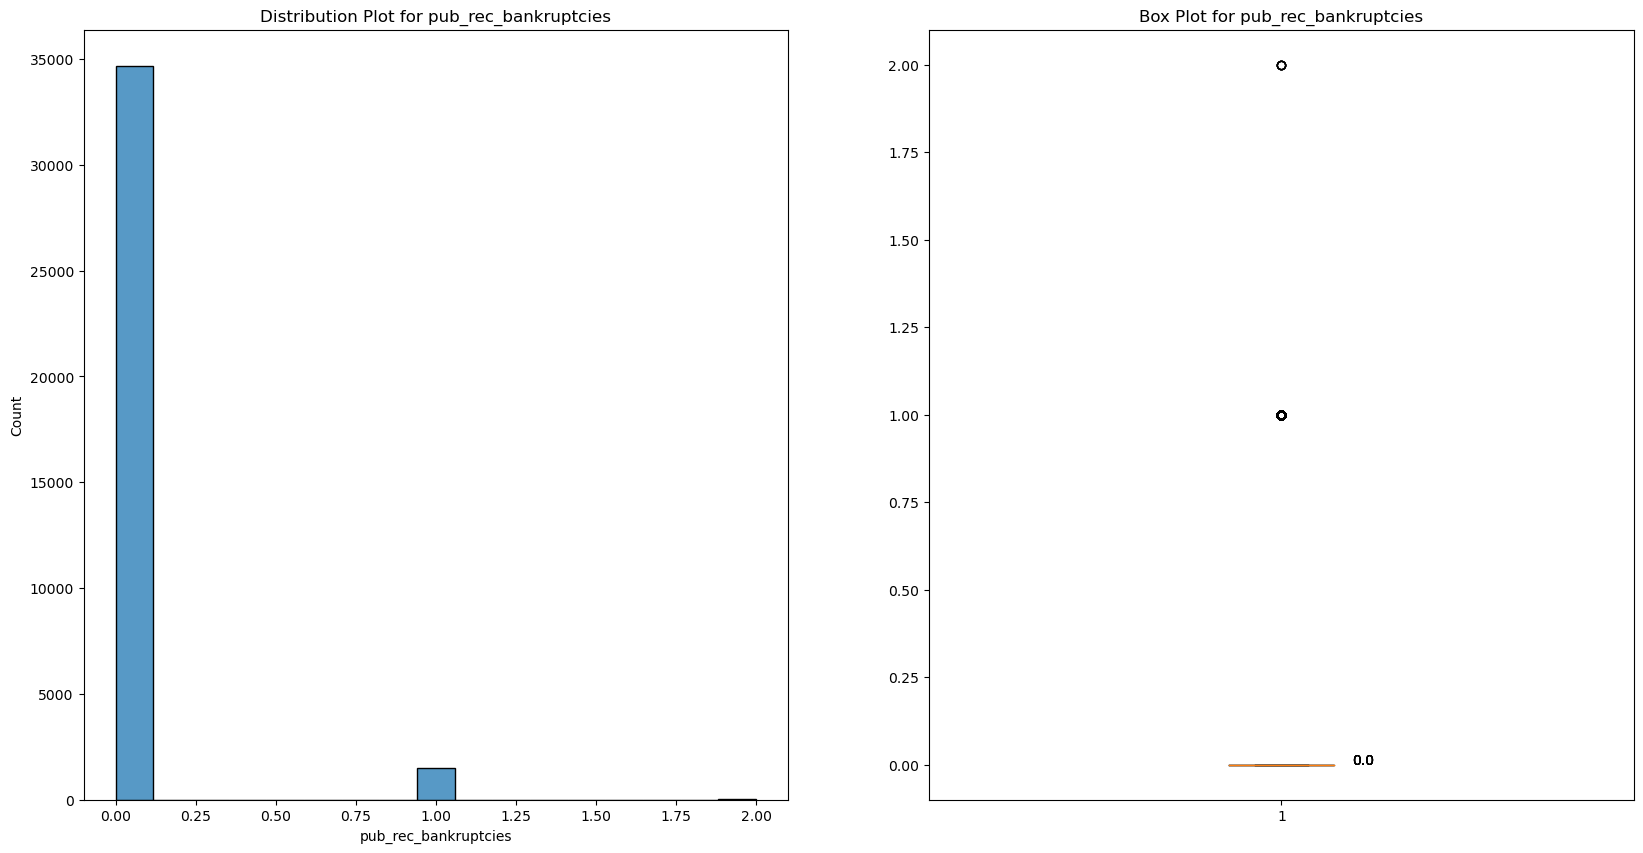

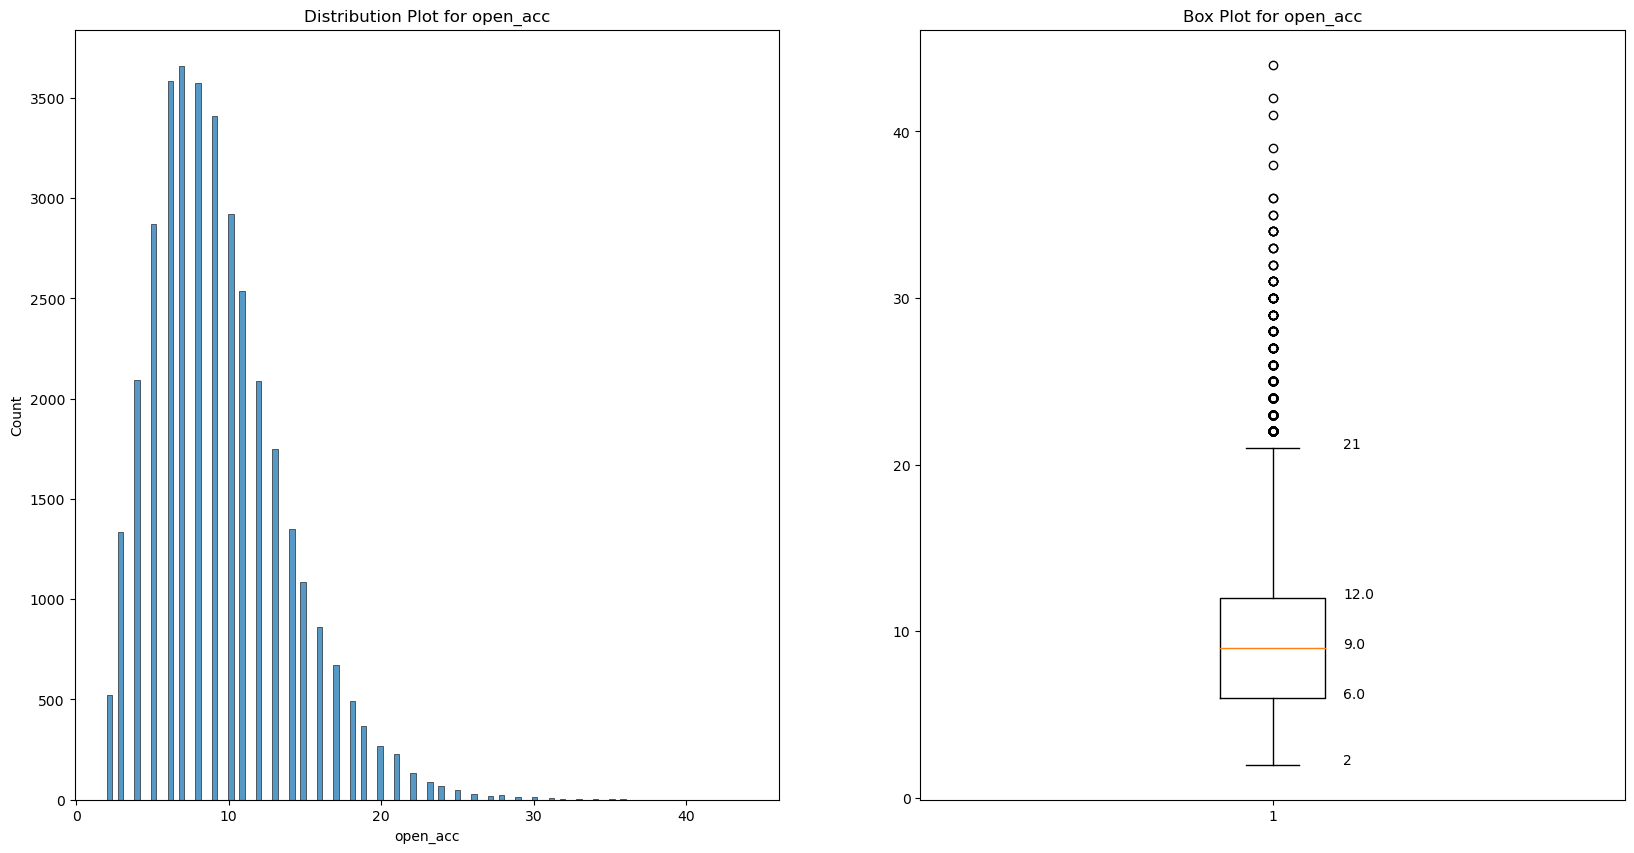

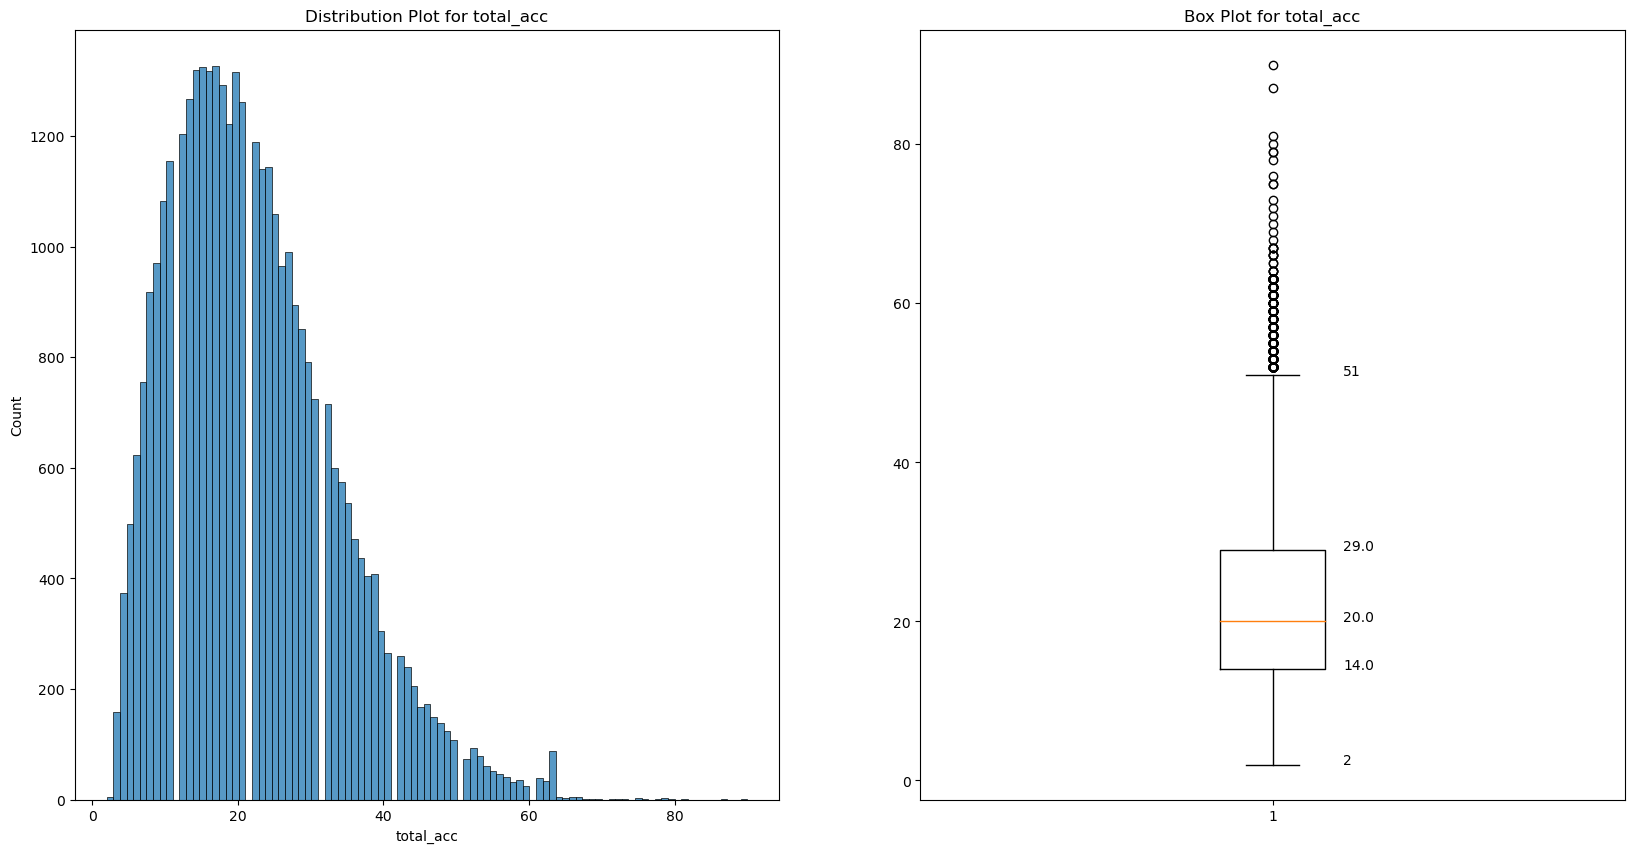

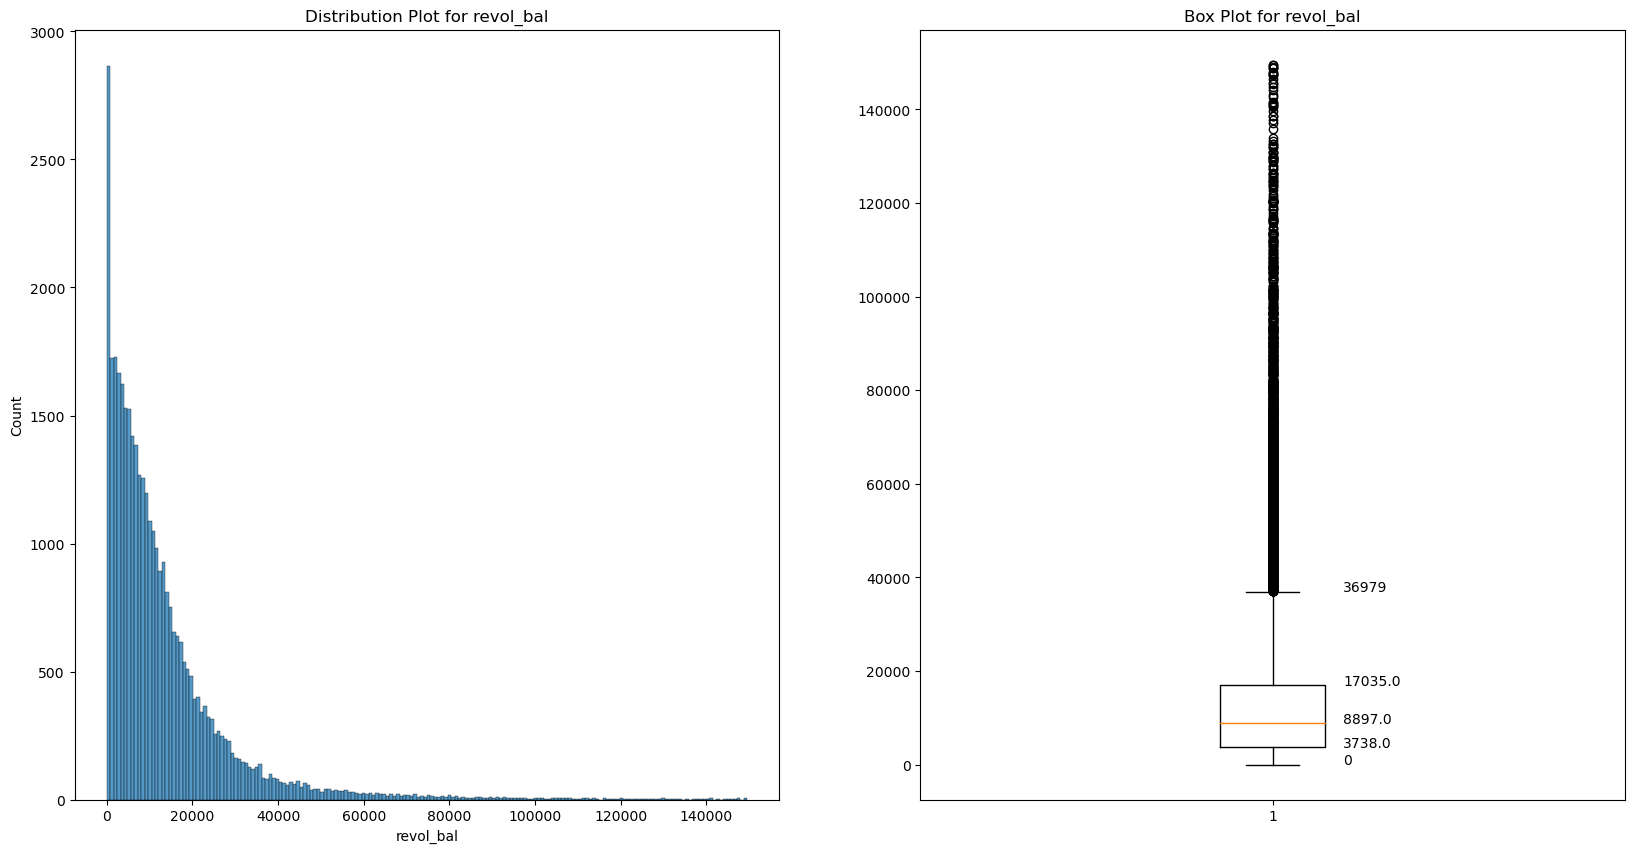

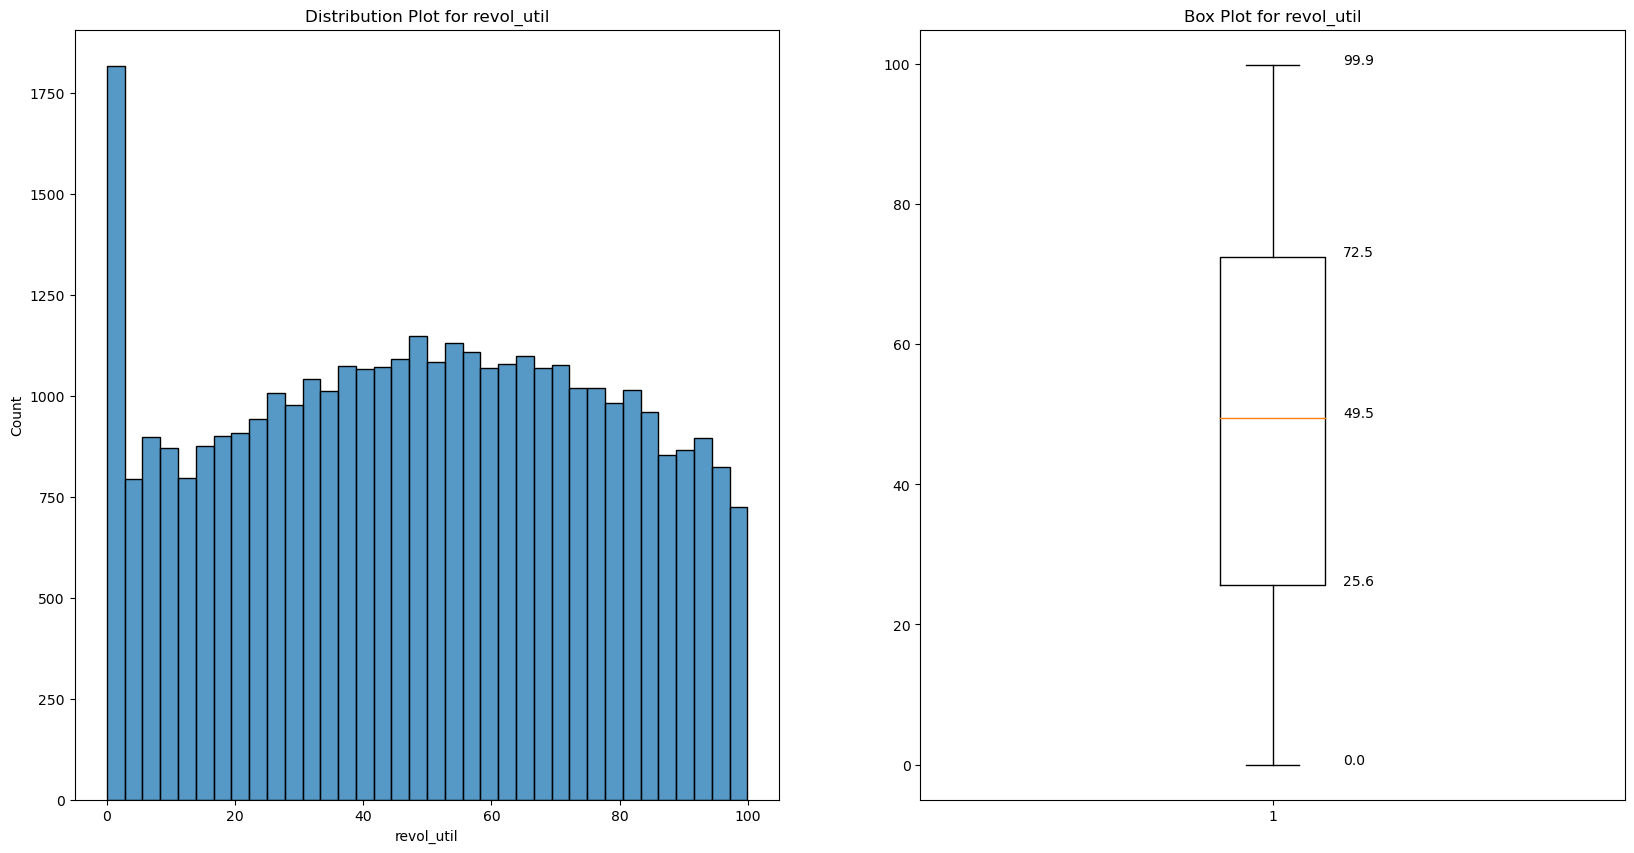

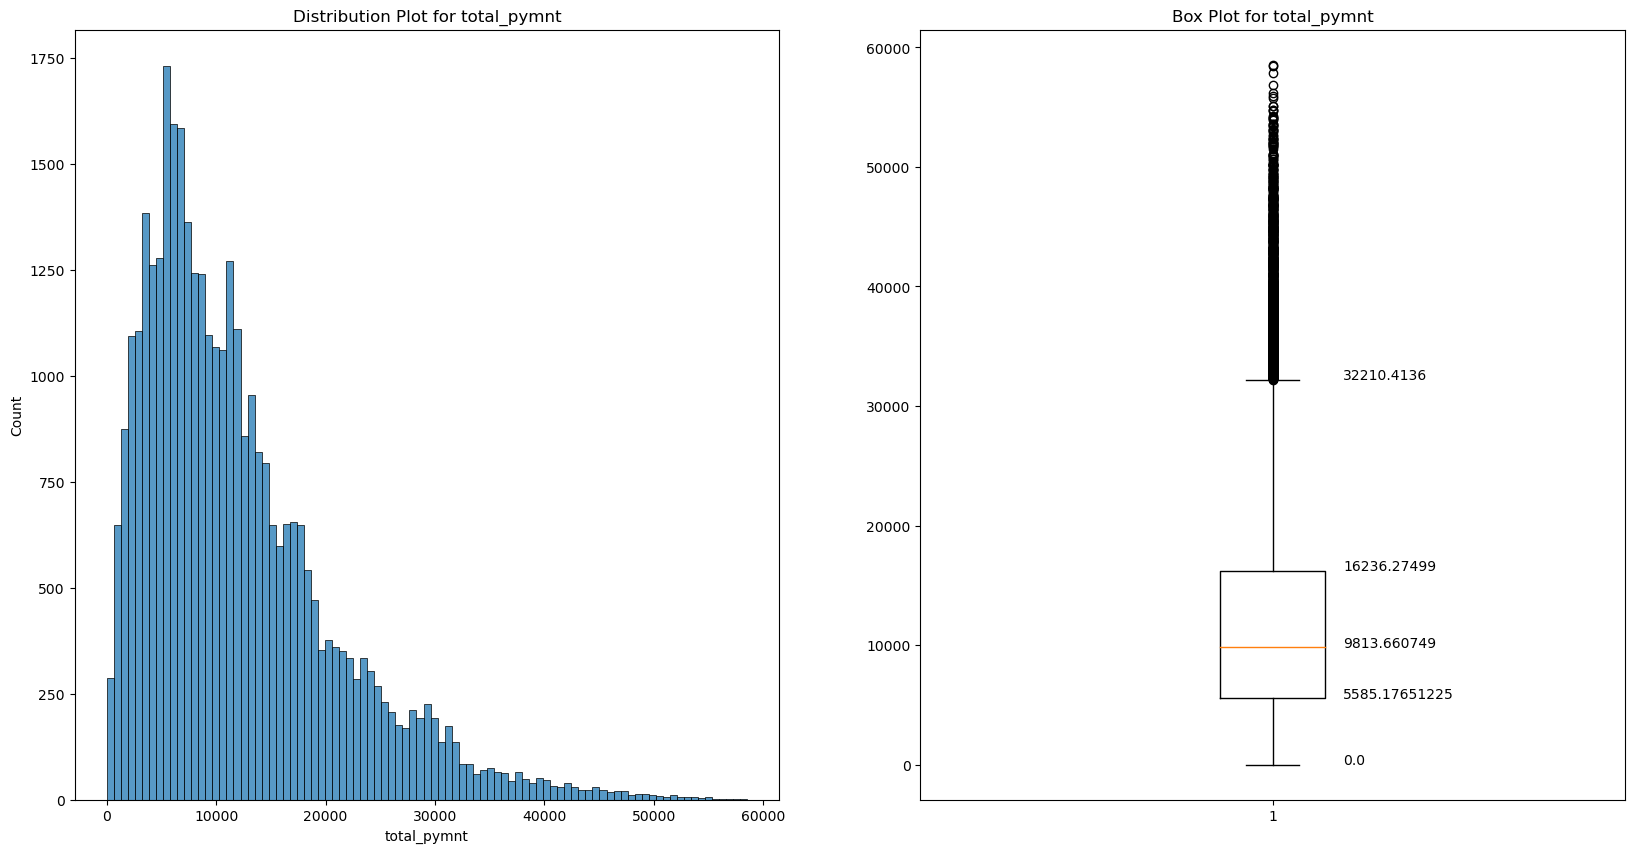

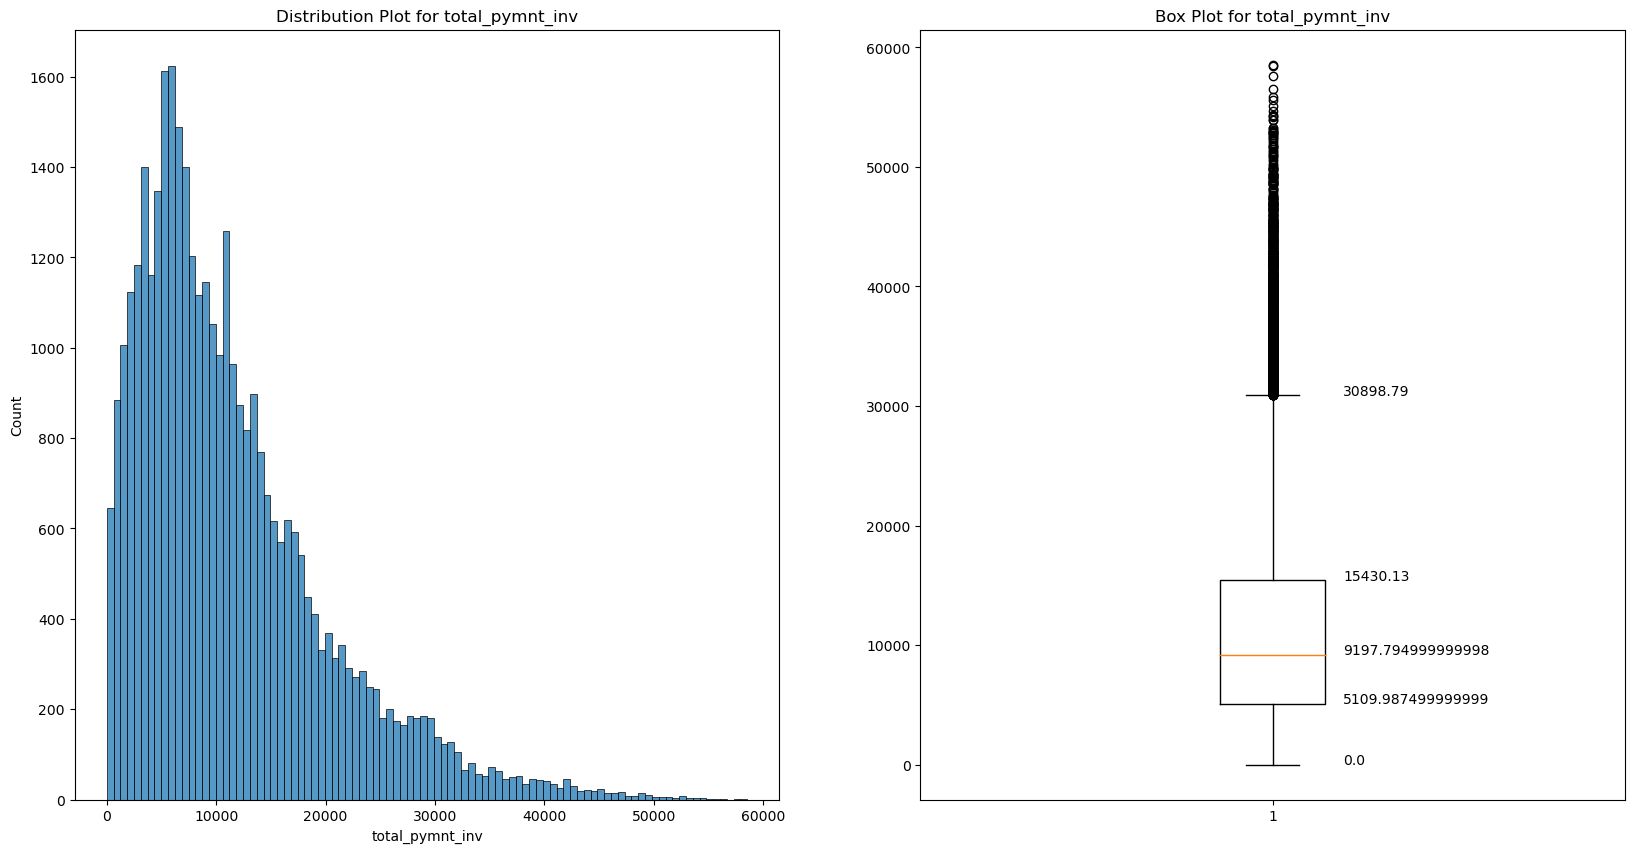

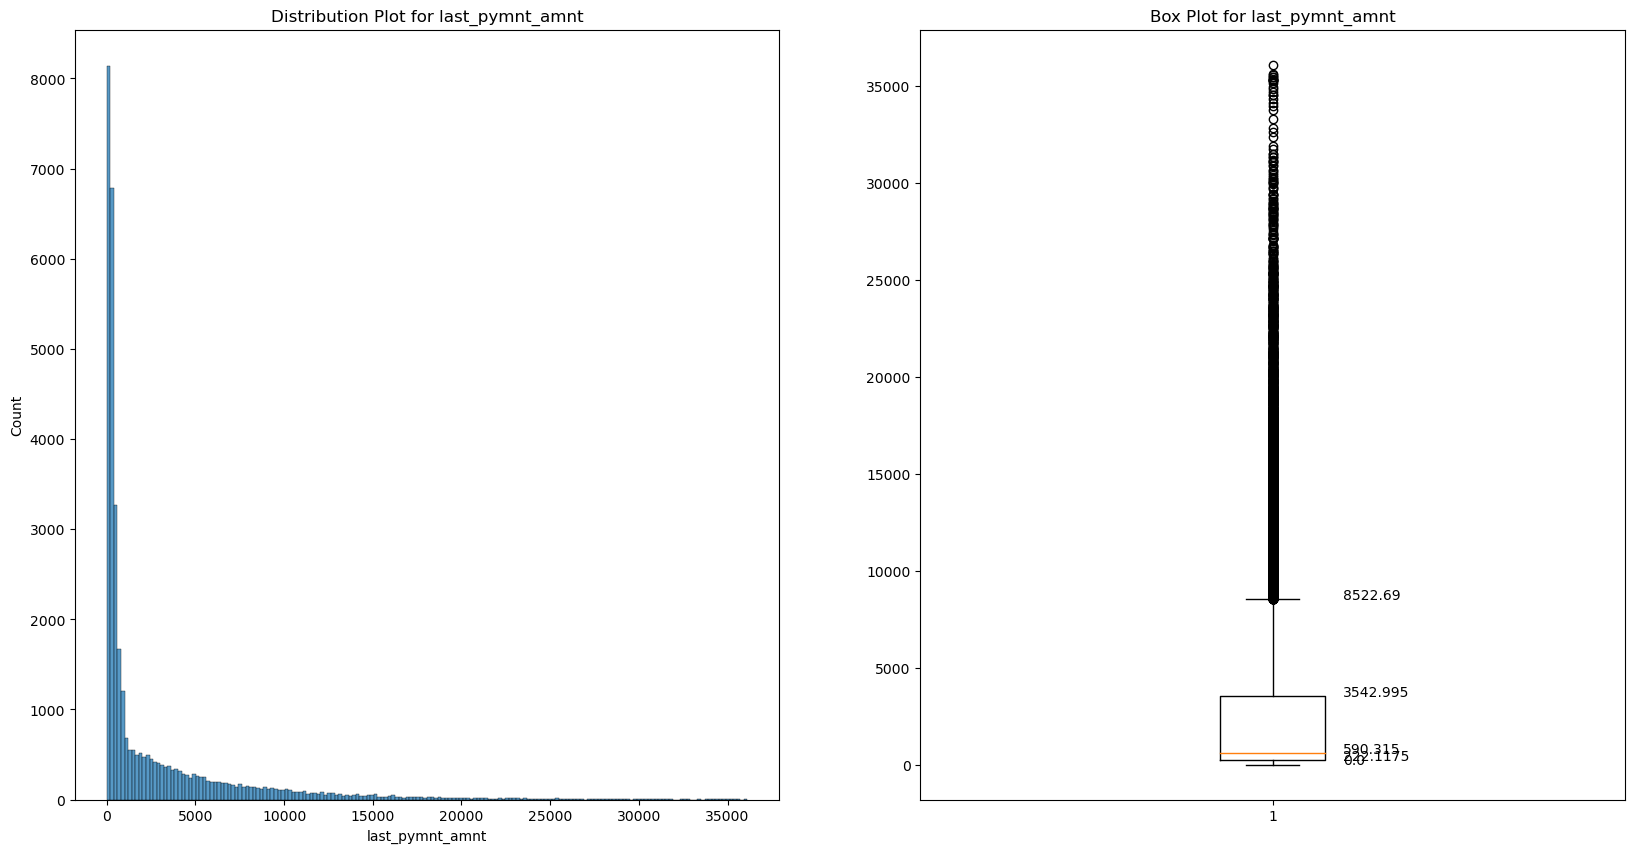

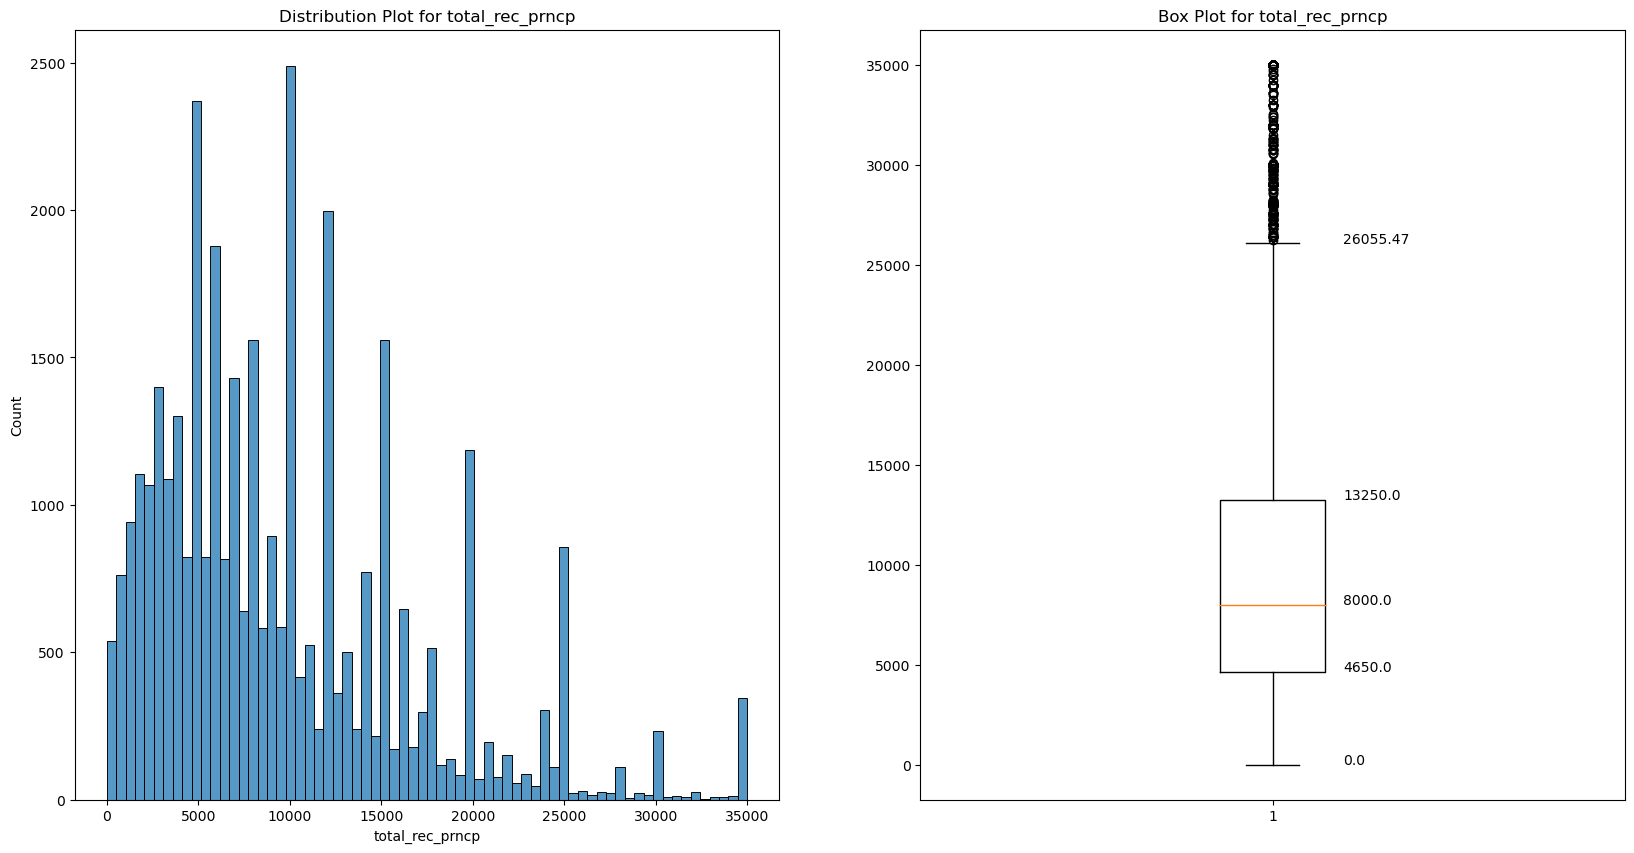

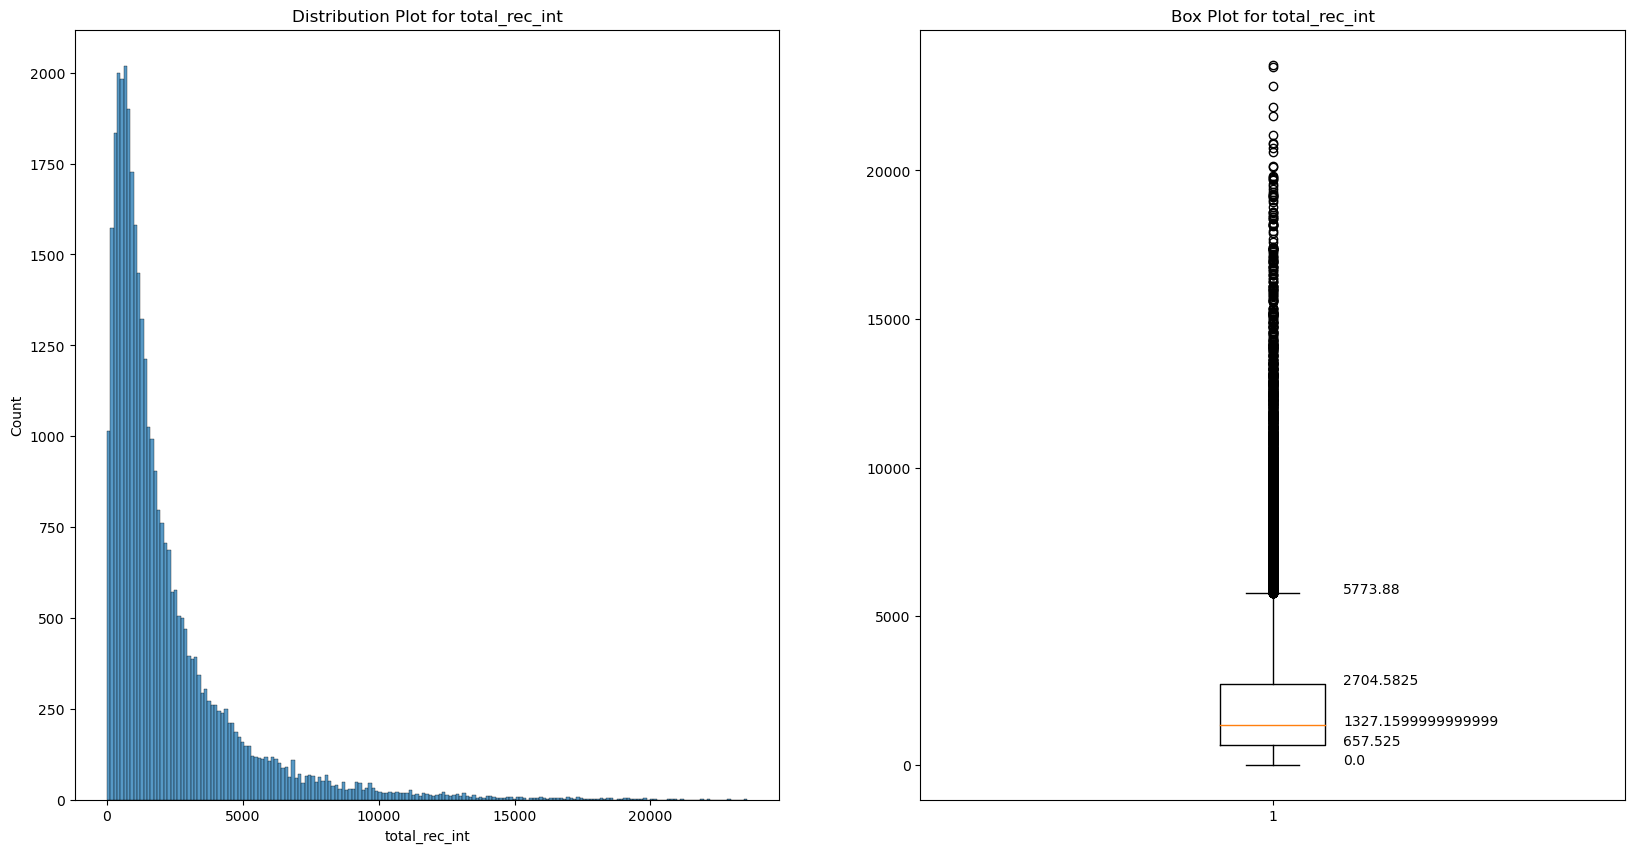

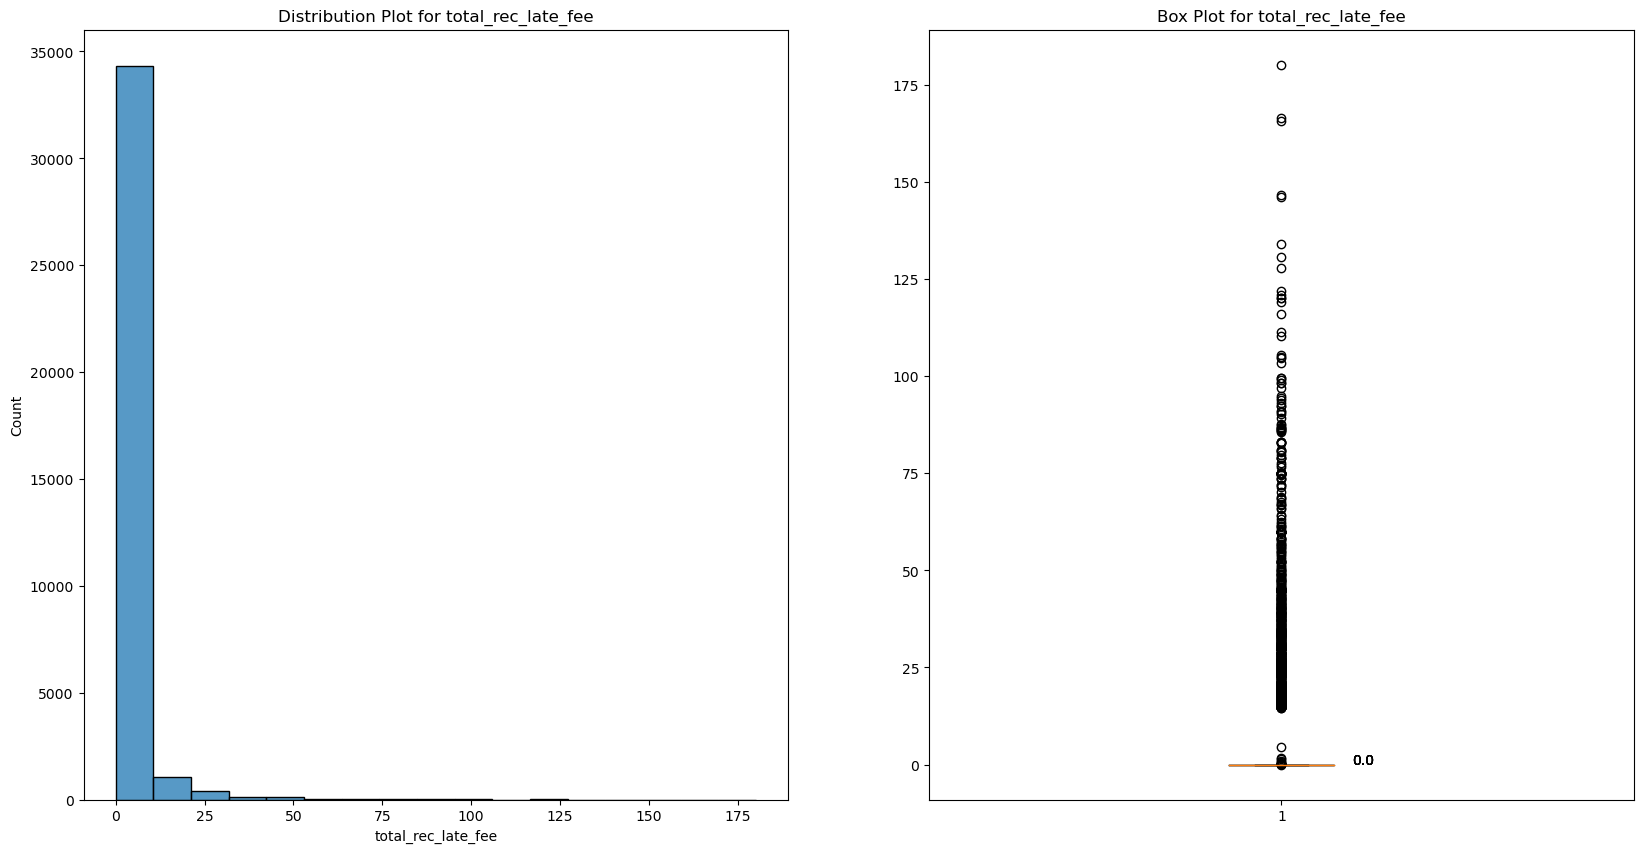

In [40]:
for i in continuous:
    univariate_plot_continuous(i)

## Outlier Treatment

<p>From the above plots there are some attributes with outliers which are worth checking
    
<p> loan_amnt
,funded_amnt
,funded_amnt_inv
,int_rate
,annual_inc
,mnths_since_last_delinq
,revol_bal
,total_pymnt
,total_pymnt_inv
,last_pymnt_amnt
,total_rec_prncp
,total_rec_int

<p> Where there are clear outliers in the column, we will remove the values greater than 95% quantile to standardize the data

#### annual_inc

<Axes: >

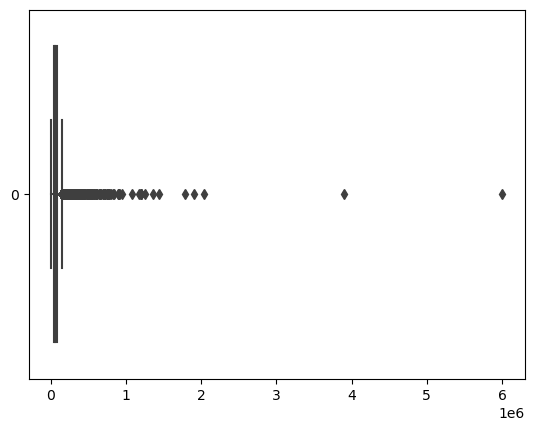

In [41]:
sns.boxplot(loan_df['annual_inc'], orient='h')

In [42]:
quantile_info = loan_df.annual_inc.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
quantile_info

0.50     60000.0
0.25     41000.0
0.50     60000.0
0.75     82000.0
0.80     90000.0
0.95    140000.0
0.97    162000.0
0.99    230000.0
Name: annual_inc, dtype: float64

In [43]:
len(loan_df[loan_df.annual_inc > quantile_info[0.95]])

1752

In [44]:
loan_df = loan_df[loan_df.annual_inc <= quantile_info[0.95]]

<Axes: >

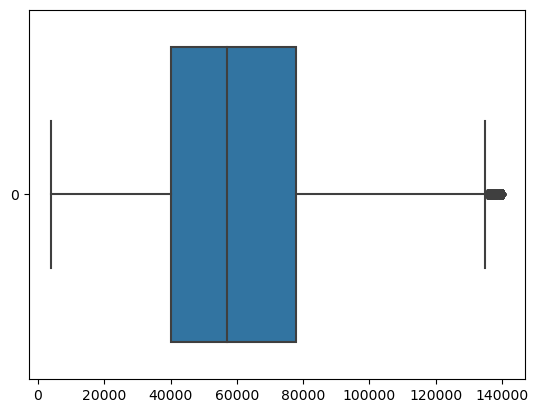

In [45]:
sns.boxplot(loan_df['annual_inc'], orient='h')  # The box plot looks good now

#### last_pymnt_amnt

<Axes: >

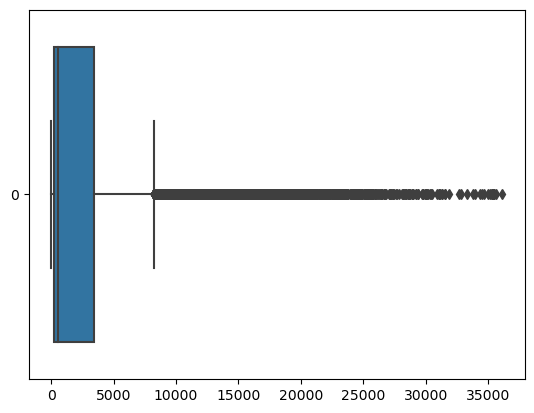

In [46]:
sns.boxplot(loan_df['last_pymnt_amnt'], orient='h')

In [47]:
quantile_info = loan_df.last_pymnt_amnt.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
quantile_info

0.50      563.4500
0.25      216.8775
0.50      563.4500
0.75     3414.9700
0.80     4531.8080
0.95    11874.8235
0.97    14630.1316
0.99    20262.5312
Name: last_pymnt_amnt, dtype: float64

In [48]:
len(loan_df[loan_df.last_pymnt_amnt > quantile_info[0.95]])

1720

In [49]:
loan_df = loan_df[loan_df.last_pymnt_amnt <= quantile_info[0.95]]

<Axes: >

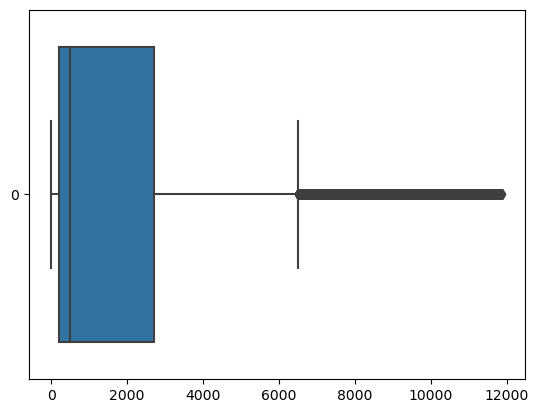

In [50]:
sns.boxplot(loan_df['last_pymnt_amnt'], orient='h')

#### revol_bal

<Axes: >

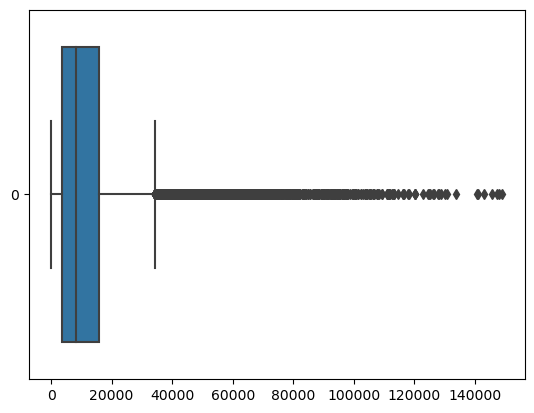

In [51]:
sns.boxplot(loan_df.revol_bal, orient='h')

In [52]:
quantile_info = loan_df.revol_bal.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
quantile_info

0.50     8359.00
0.25     3520.00
0.50     8359.00
0.75    15780.00
0.80    18160.60
0.95    35961.65
0.97    45011.98
0.99    68063.21
Name: revol_bal, dtype: float64

In [53]:
len(loan_df[loan_df.revol_bal > quantile_info[0.95]])

1634

In [54]:
loan_df = loan_df[loan_df.revol_bal <= quantile_info[0.95]]

<Axes: >

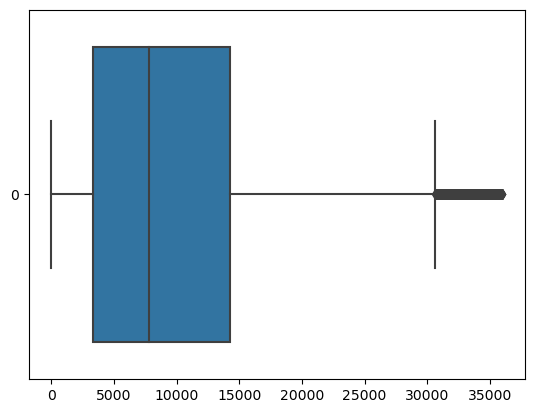

In [55]:
sns.boxplot(loan_df.revol_bal, orient='h')

#### loan_amnt, funded_amnt, funded_amnt_inv, int_rate, mths_since_last_delinq, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int

Though there outliers in these columns the difference is not that large so lets keep these outliers

0.50     8500.0
0.25     5000.0
0.50     8500.0
0.75    13000.0
0.80    15000.0
0.95    23000.0
0.97    25000.0
0.99    30000.0
Name: loan_amnt, dtype: float64
1521


<Axes: >

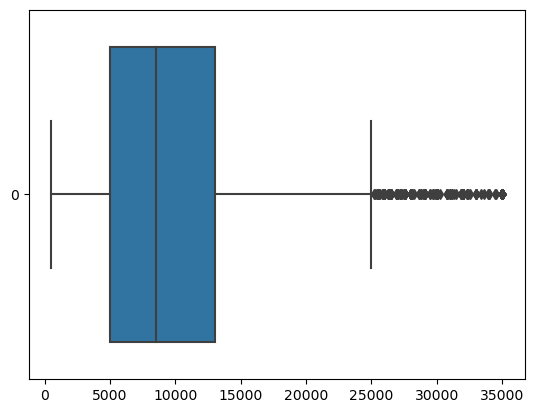

In [56]:
quantile_info = loan_df.loan_amnt.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.loan_amnt > quantile_info[0.95]]))
sns.boxplot(loan_df.loan_amnt, orient='h')

0.50     8400.0
0.25     5000.0
0.50     8400.0
0.75    12800.0
0.80    14500.0
0.95    21000.0
0.97    25000.0
0.99    28000.0
Name: funded_amnt, dtype: float64
1541


<Axes: >

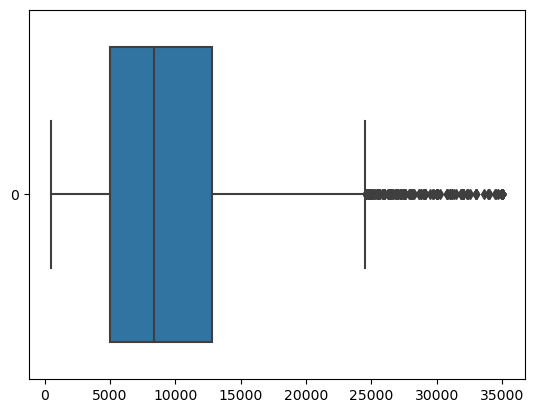

In [57]:
quantile_info = loan_df.funded_amnt.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.funded_amnt > quantile_info[0.95]]))
sns.boxplot(loan_df.funded_amnt, orient='h')

0.50     8000.000000
0.25     4889.243026
0.50     8000.000000
0.75    12000.000000
0.80    13950.646148
0.95    20375.000000
0.97    23950.000000
0.99    27952.593502
Name: funded_amnt_inv, dtype: float64
1550


<Axes: >

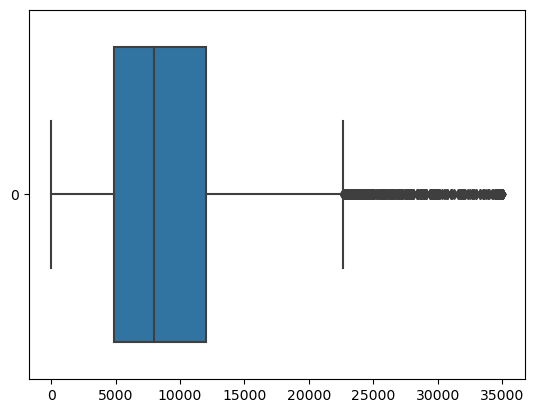

In [58]:
quantile_info = loan_df.funded_amnt_inv.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.funded_amnt_inv > quantile_info[0.95]]))
sns.boxplot(loan_df.funded_amnt_inv, orient='h')

0.50    11.71
0.25     8.90
0.50    11.71
0.75    14.26
0.80    14.91
0.95    17.99
0.97    18.79
0.99    20.62
Name: int_rate, dtype: float64
1479


<Axes: >

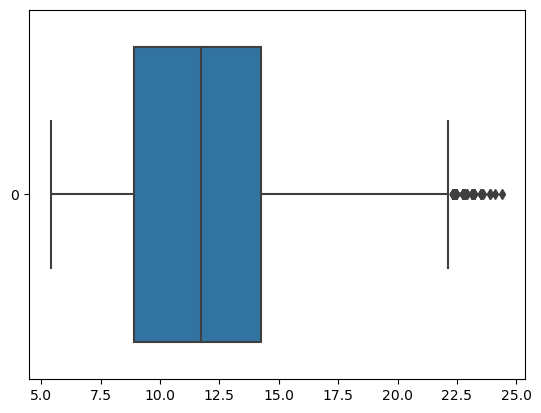

In [59]:
quantile_info = loan_df.int_rate.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.int_rate > quantile_info[0.95]]))
sns.boxplot(loan_df.int_rate, orient='h')

0.50     0.0
0.25     0.0
0.50     0.0
0.75    22.0
0.80    31.0
0.95    64.0
0.97    71.0
0.99    78.0
Name: mths_since_last_delinq, dtype: float64
1523


<Axes: >

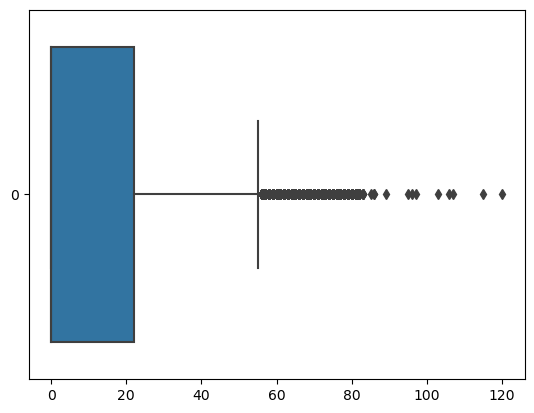

In [60]:
quantile_info = loan_df.mths_since_last_delinq.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.mths_since_last_delinq > quantile_info[0.95]]))
sns.boxplot(loan_df.mths_since_last_delinq, orient='h')

0.50     7450.0
0.25     4100.0
0.50     7450.0
0.75    12000.0
0.80    12950.0
0.95    20000.0
0.97    22400.0
0.99    25000.0
Name: total_rec_prncp, dtype: float64
1240


<Axes: >

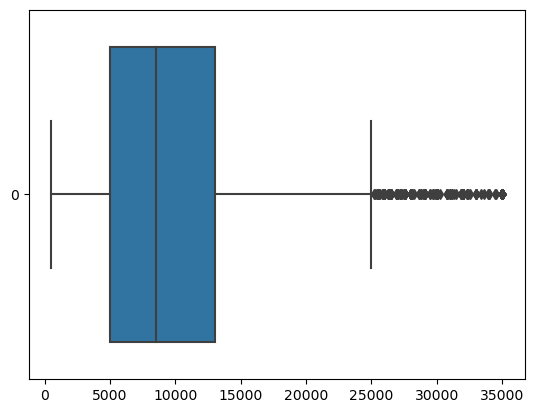

In [61]:
quantile_info = loan_df.total_rec_prncp.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.total_rec_prncp > quantile_info[0.95]]))
sns.boxplot(loan_df.loan_amnt, orient='h')

0.50     1226.1000
0.25      621.7600
0.50     1226.1000
0.75     2413.5475
0.80     2843.0960
0.95     6014.9890
0.97     7340.5818
0.99    10206.4809
Name: total_rec_int, dtype: float64
1552


<Axes: >

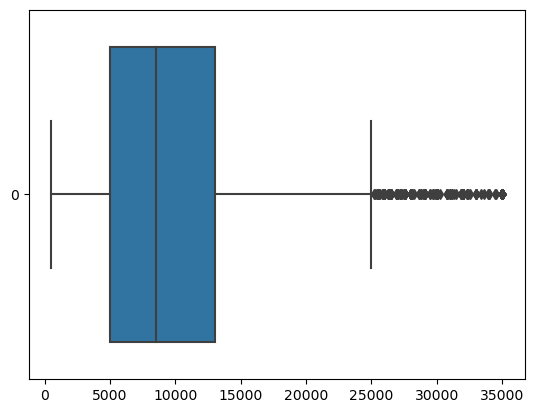

In [62]:
quantile_info = loan_df.total_rec_int.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.total_rec_int > quantile_info[0.95]]))
sns.boxplot(loan_df.loan_amnt, orient='h')

## Univariate analysis of categorical variables

In [63]:
for i in categorical:
    print(len(loan_df[i].unique()), '\t', i)

2 	 term
24565 	 emp_title
806 	 zip_code
50 	 addr_state
3 	 verification_status
55 	 issue_d
105 	 last_credit_pull_d
2 	 loan_status
14 	 purpose
7 	 grade
35 	 sub_grade
5 	 home_ownership
500 	 earliest_cr_line


#### As the total numer of unique values for emp_title, zip_code, earliest_cr_line are too large to fit on the countplot, picking top 50 for analysis

In [64]:
def PlotFirst50Categorical(column):
    result = []
    df_temp = loan_df.groupby(column) # Group by column name 
    
    for key,item in df_temp:
        temp = {}
        temp[column] = key 
        temp['Count'] = item[column].count() # Find length of column
        result.append(temp)
    
    df_result = pd.DataFrame(result) # Create data frame

    df_plot = df_result.nlargest(50,['Count']) # Finding top 50 counts of 

    plt.figure(figsize=(20, 15))
    plt.title(column)

    sns.barplot(x=column, y='Count', data=df_plot) # Plot using barplot

    plt.xticks(rotation=90) # Name column vertically
    plt.show()

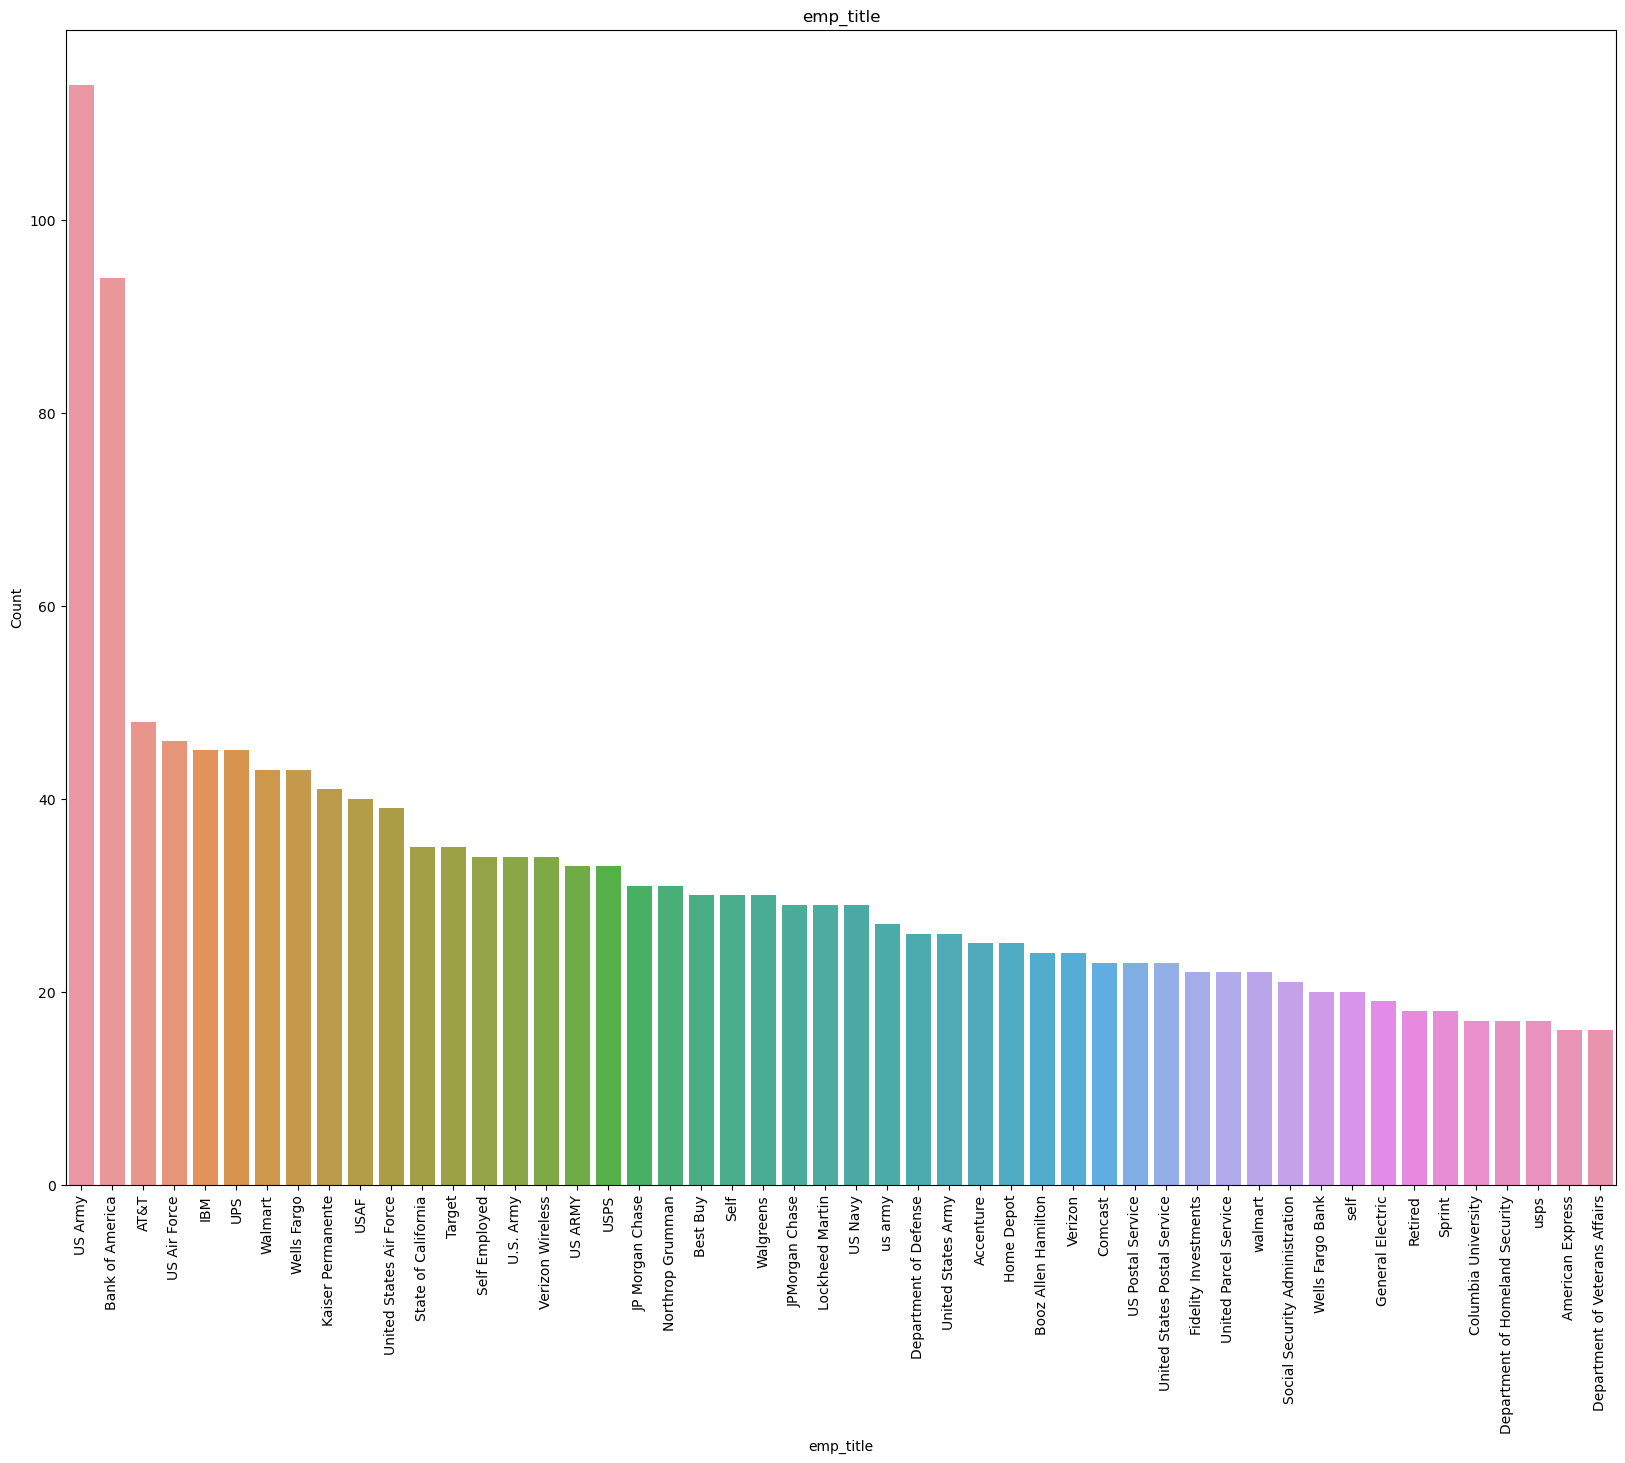

In [65]:
PlotFirst50Categorical('emp_title')

In [66]:
categorical.remove('emp_title')

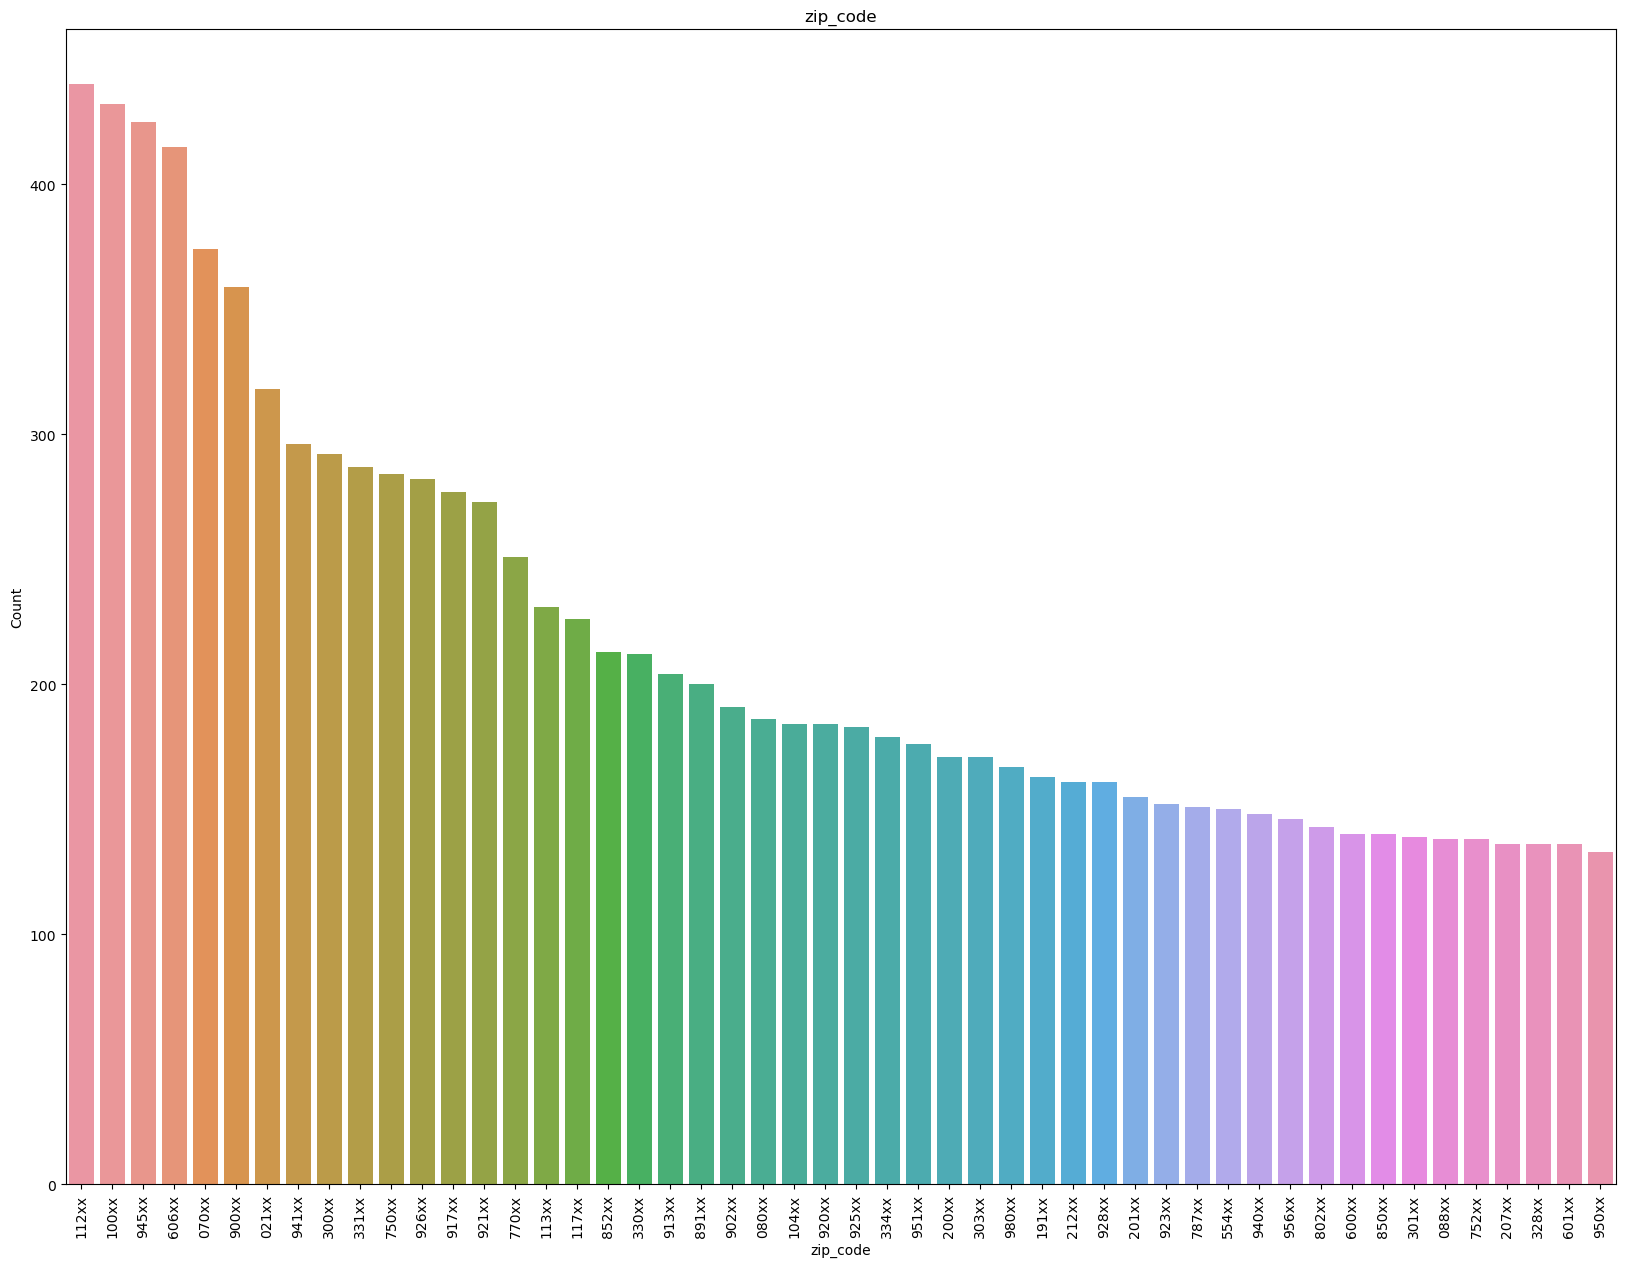

In [67]:
PlotFirst50Categorical('zip_code')

In [68]:
categorical.remove('zip_code')

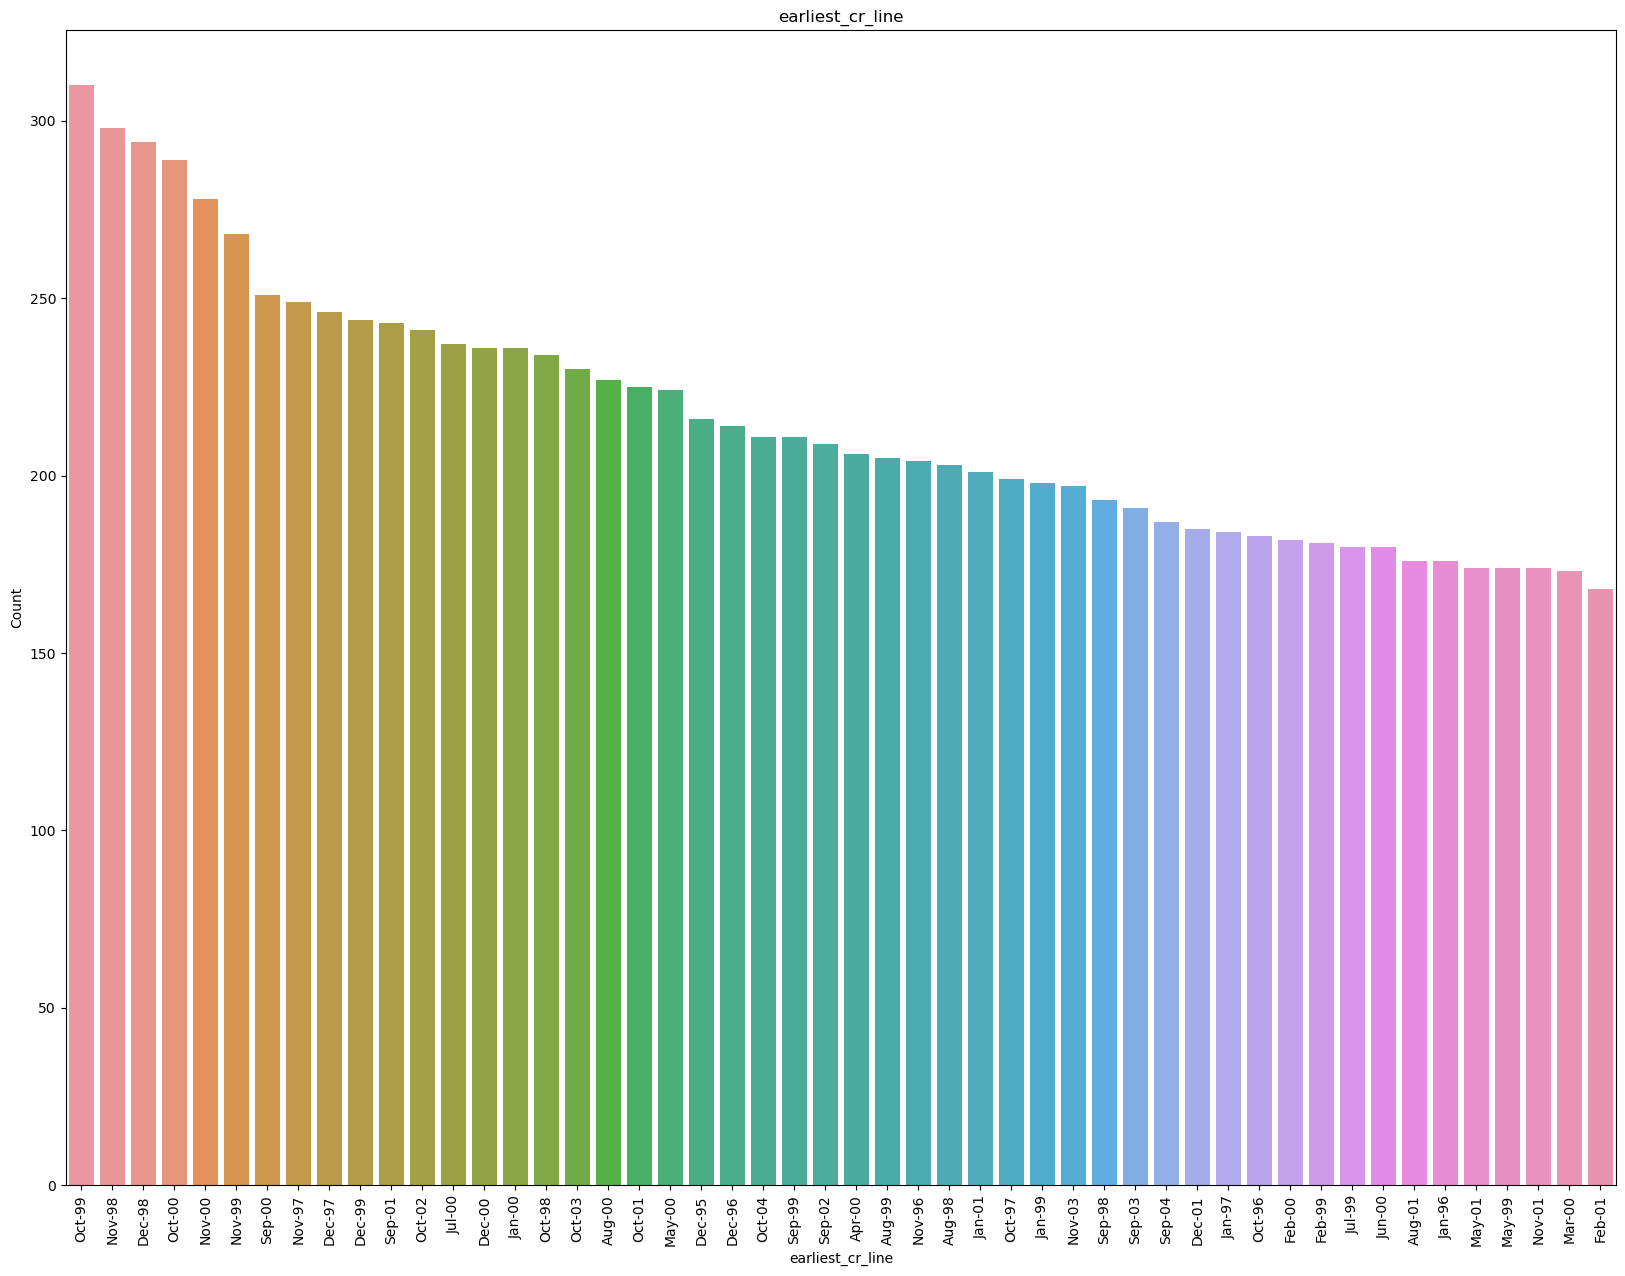

In [69]:
PlotFirst50Categorical('earliest_cr_line')

In [70]:
categorical.remove('earliest_cr_line')

#### Rendering count plots for rest of the columns

In [71]:
def plot_univariate_analysis_categorical(column_name):    
    plt.figure(figsize=(20, 15))
    plt.title(column_name)
    
    sns.countplot(x = column_name, data = loan_df)
            
    plt.xticks(rotation=90)
    plt.show()    


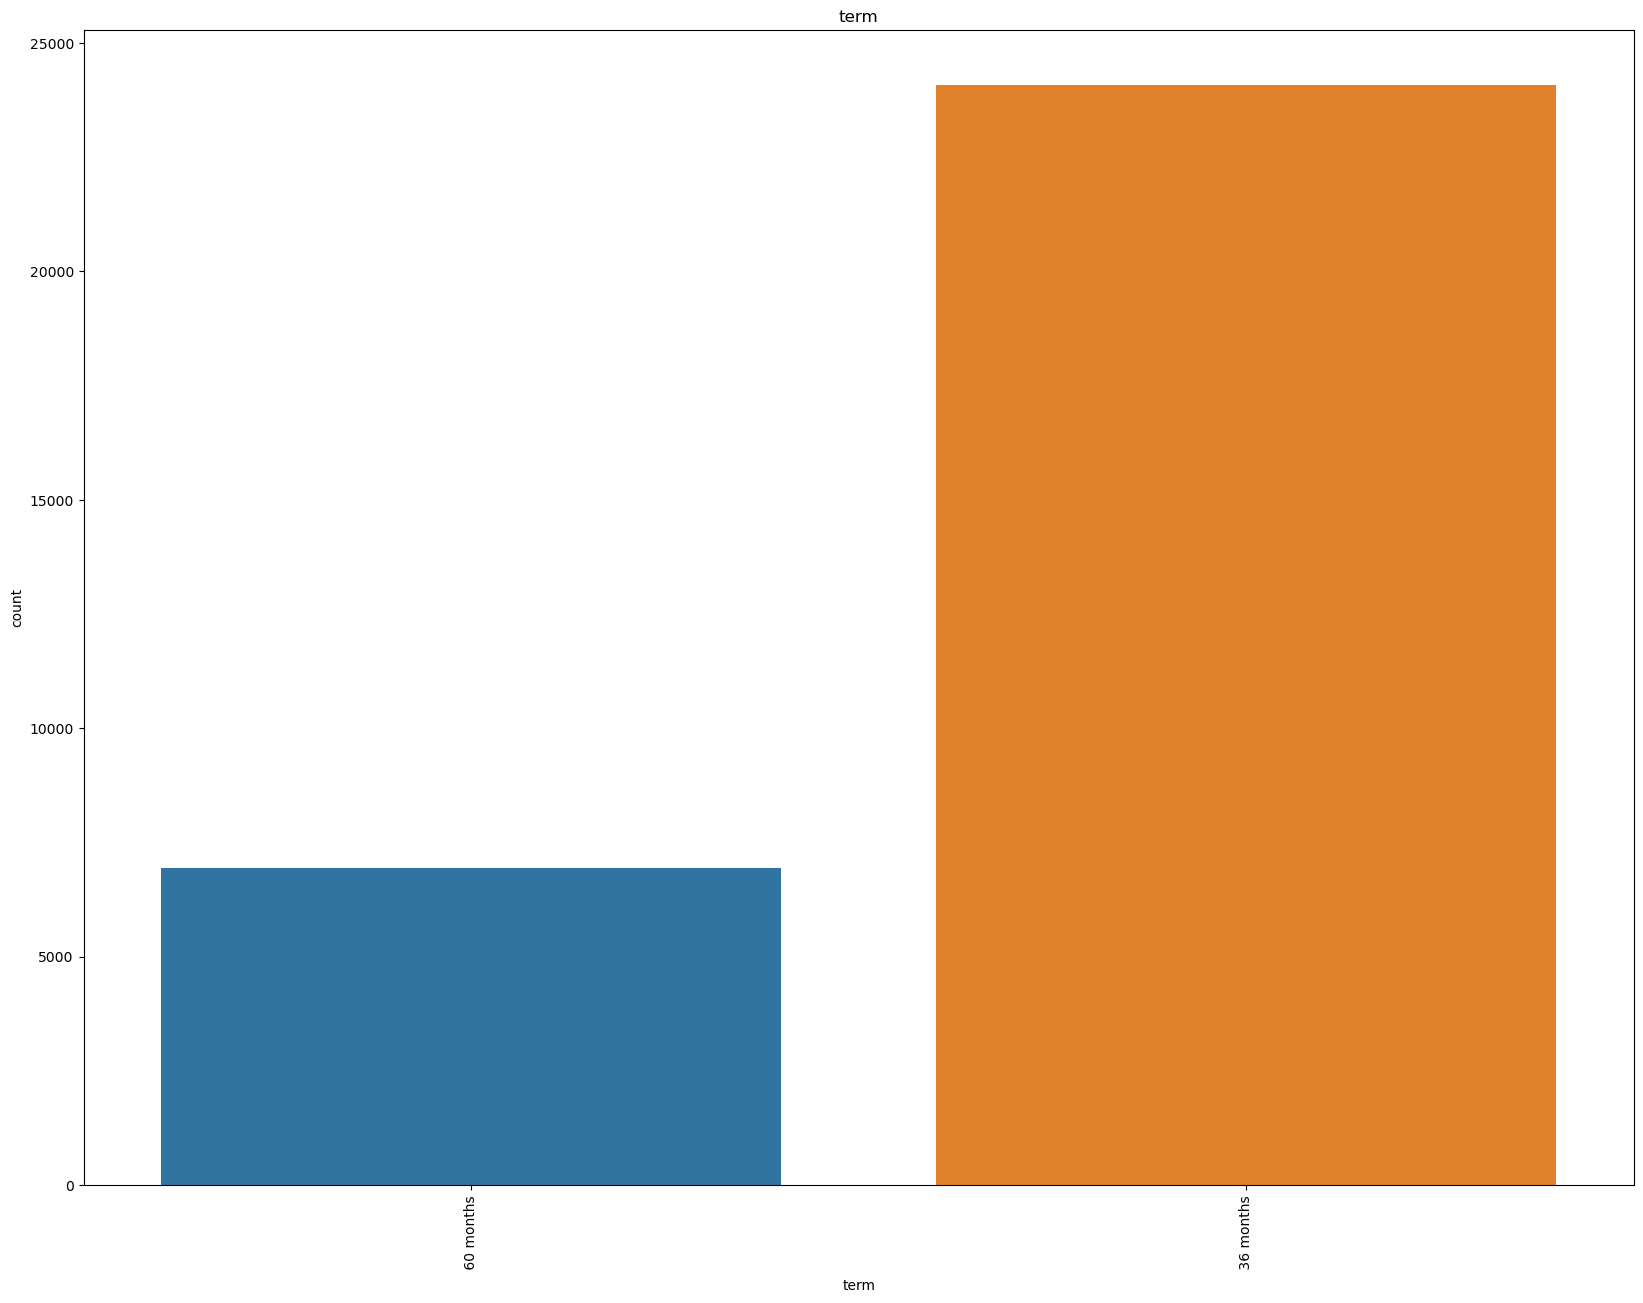

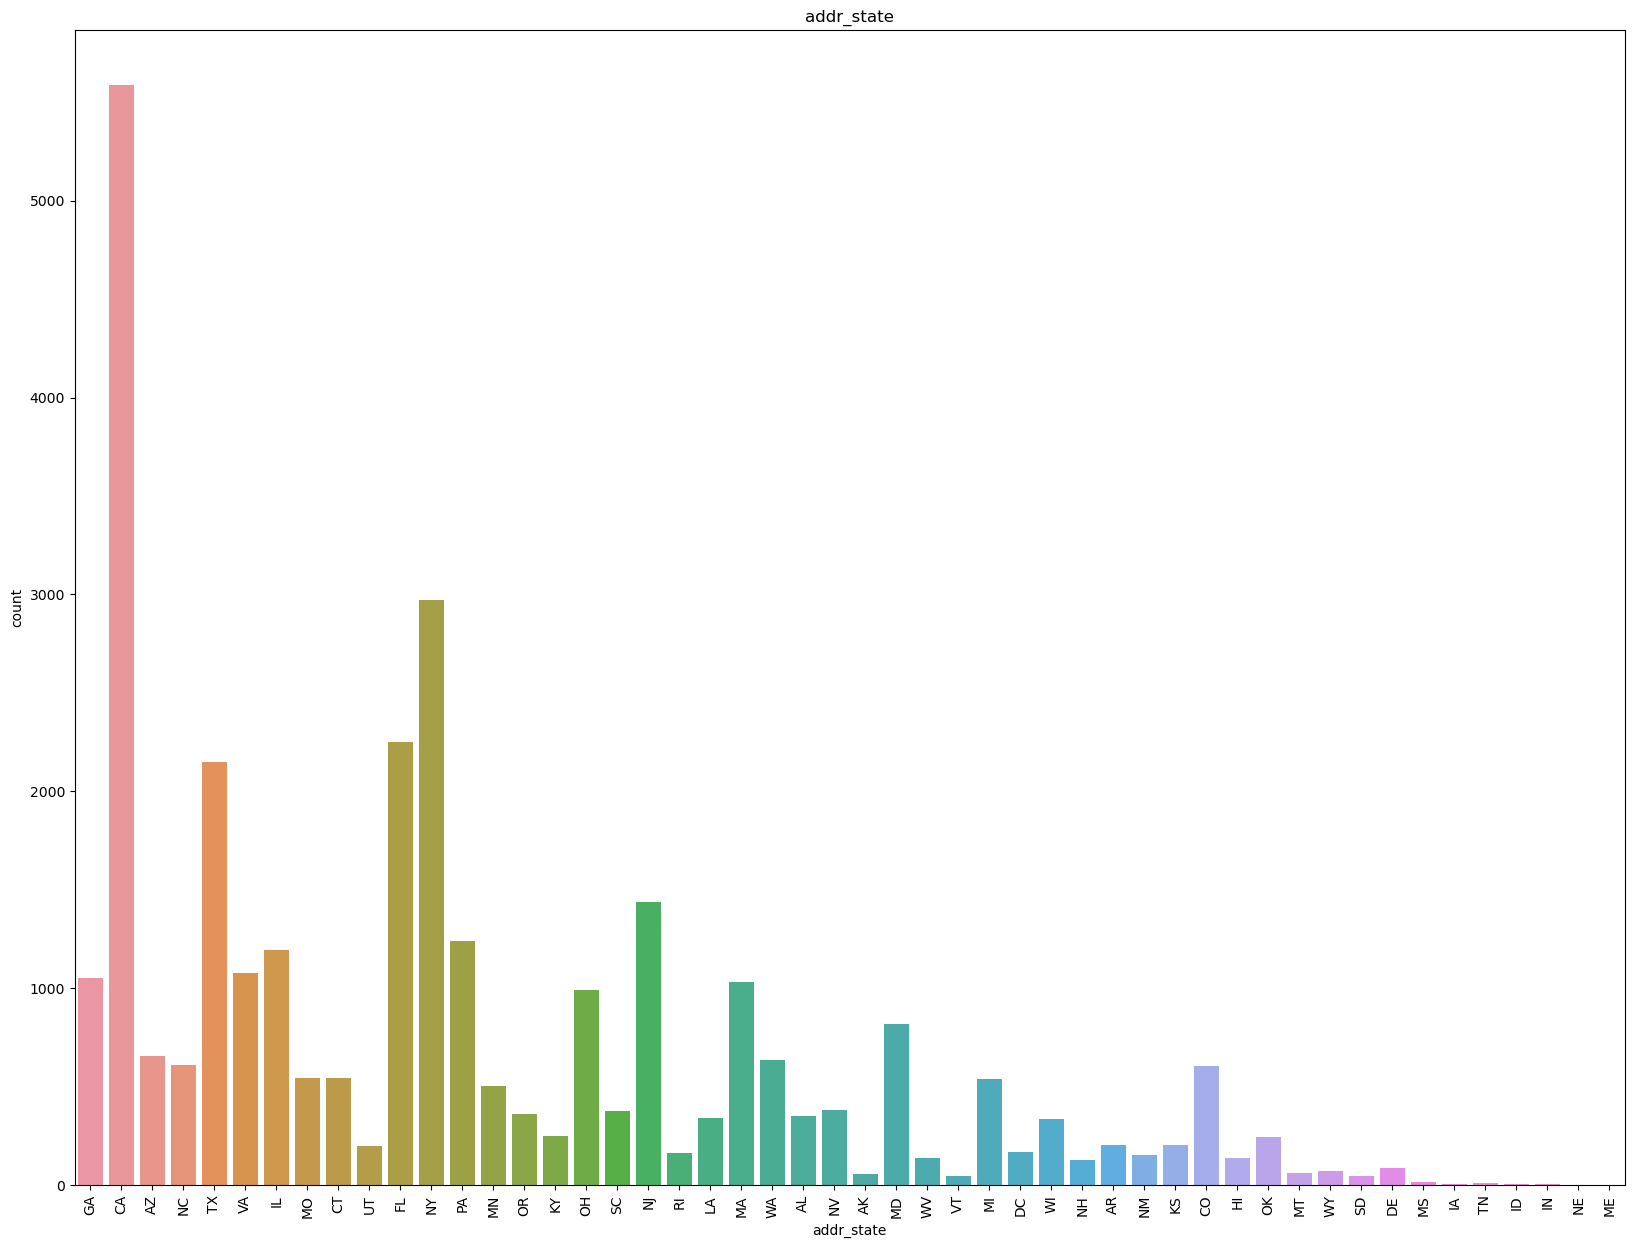

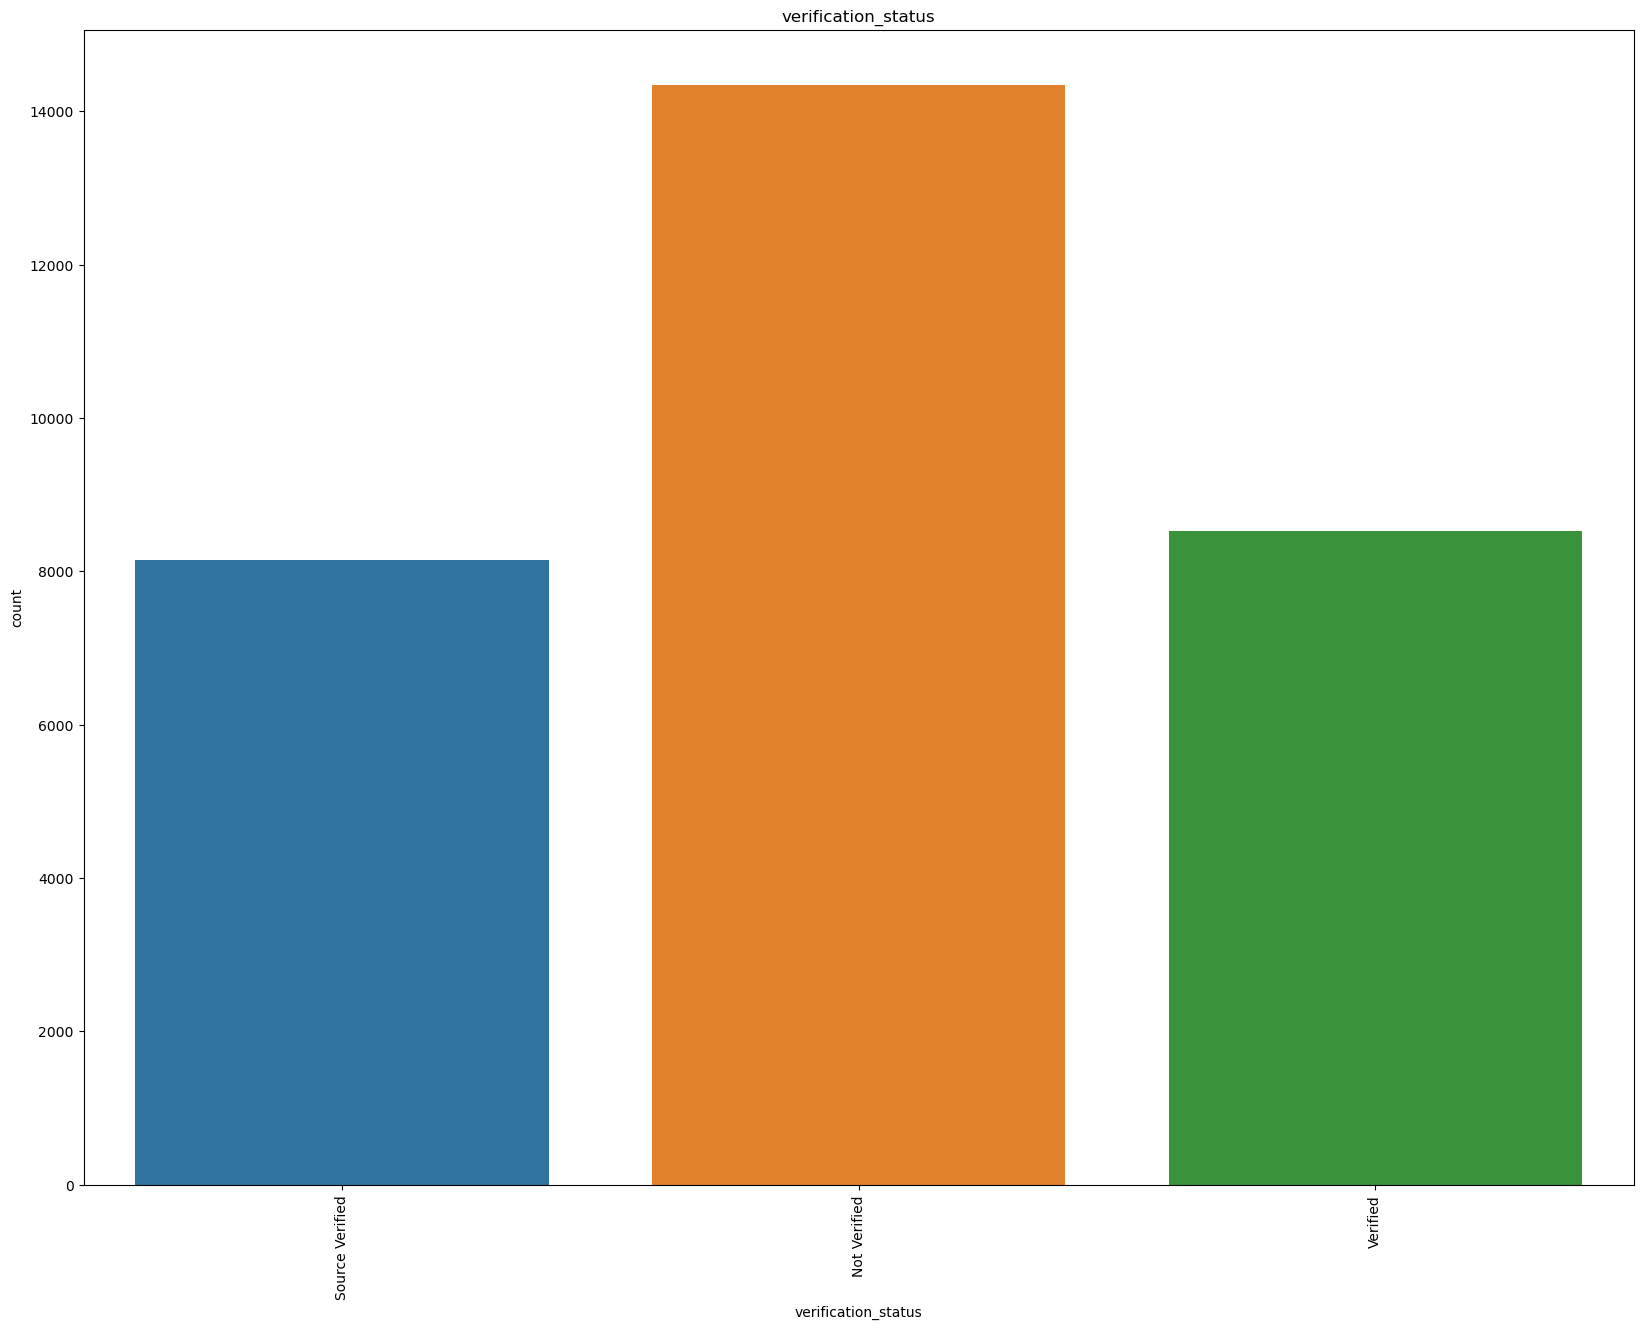

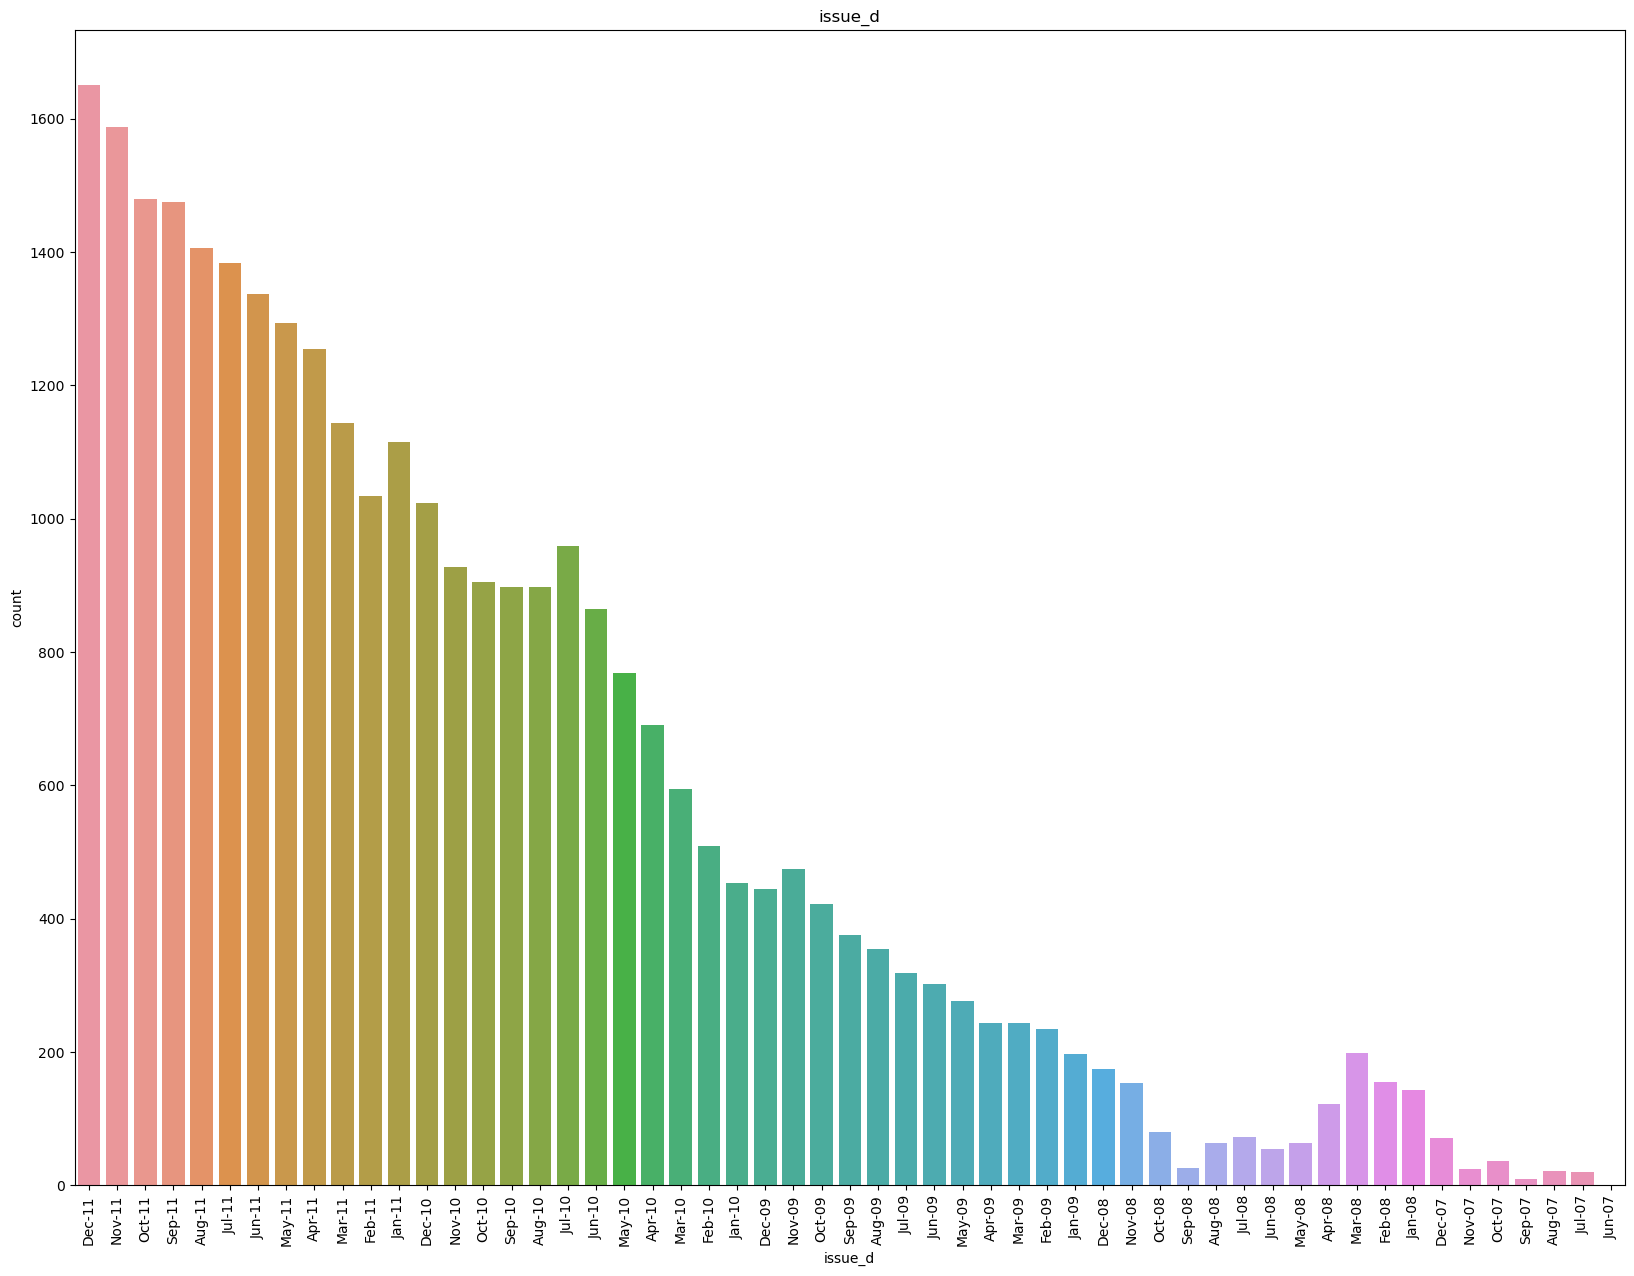

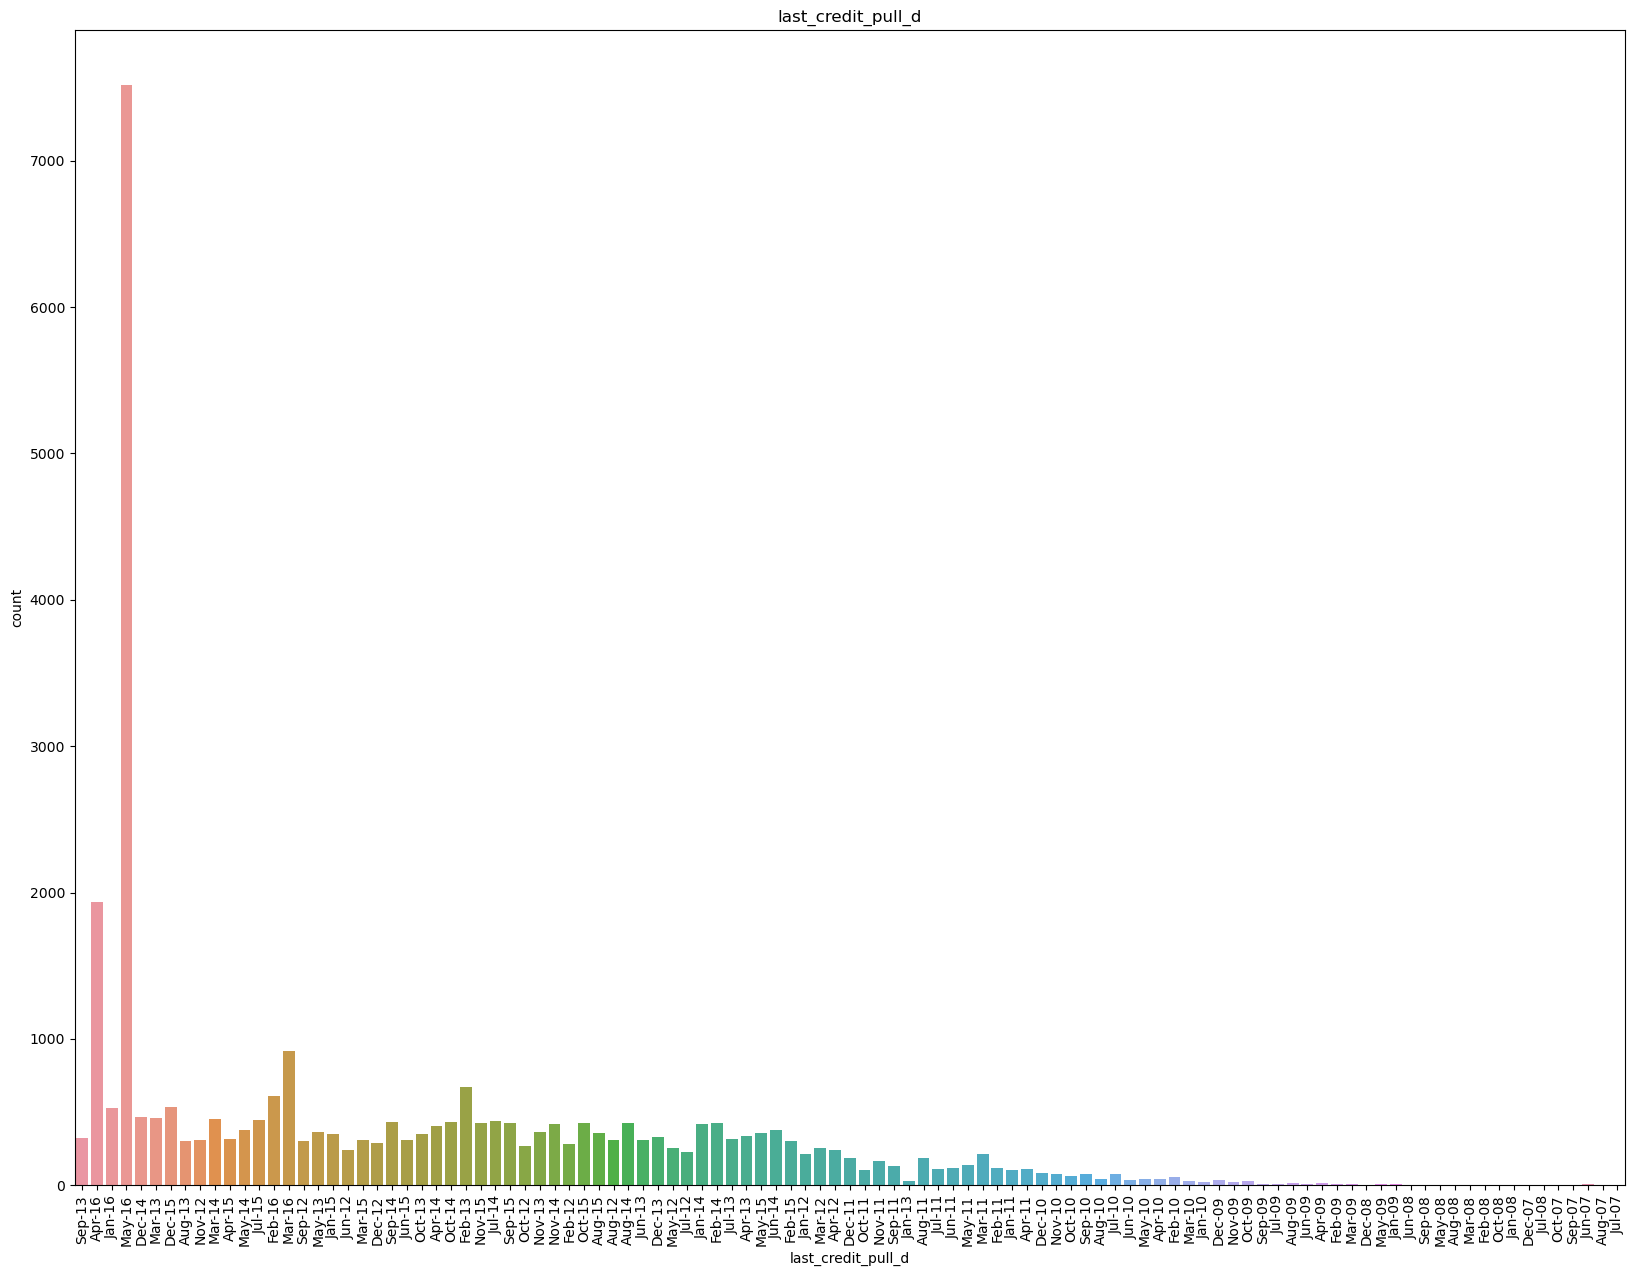

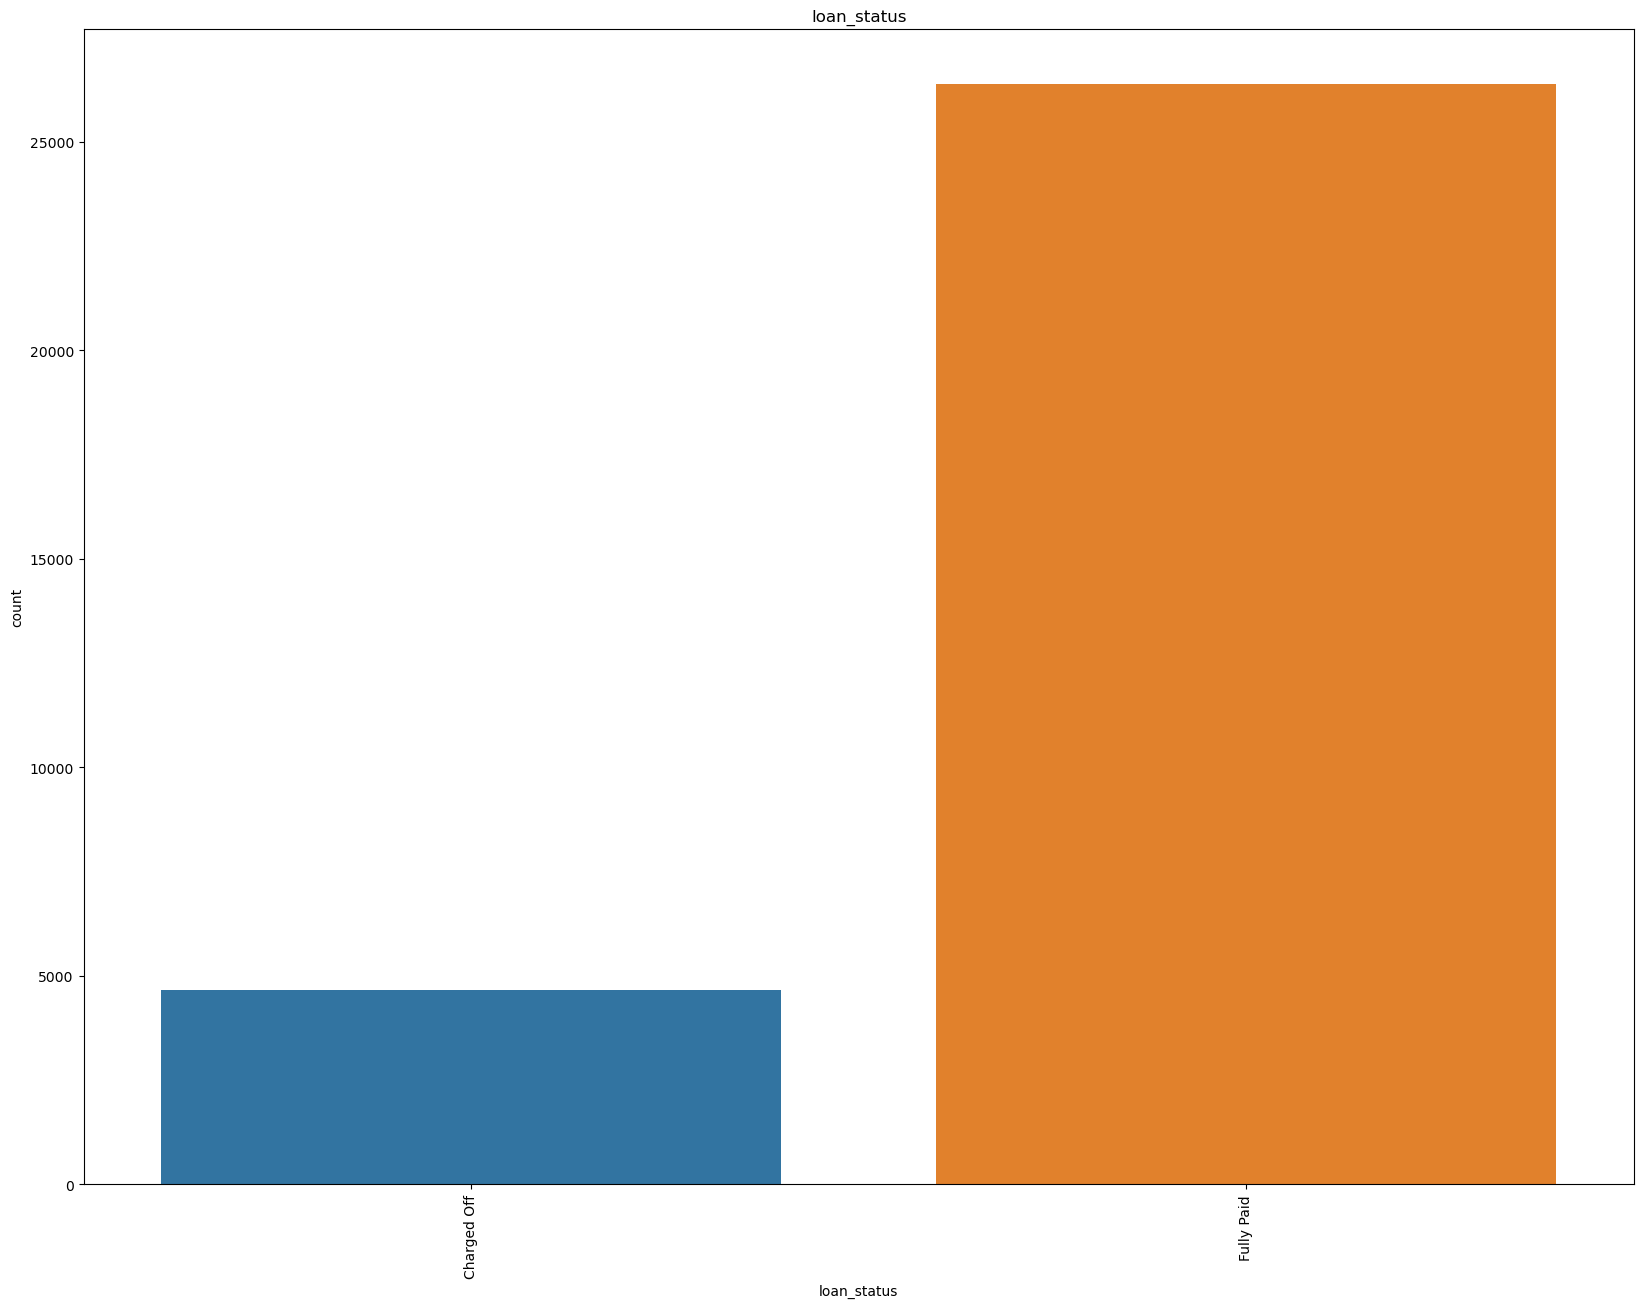

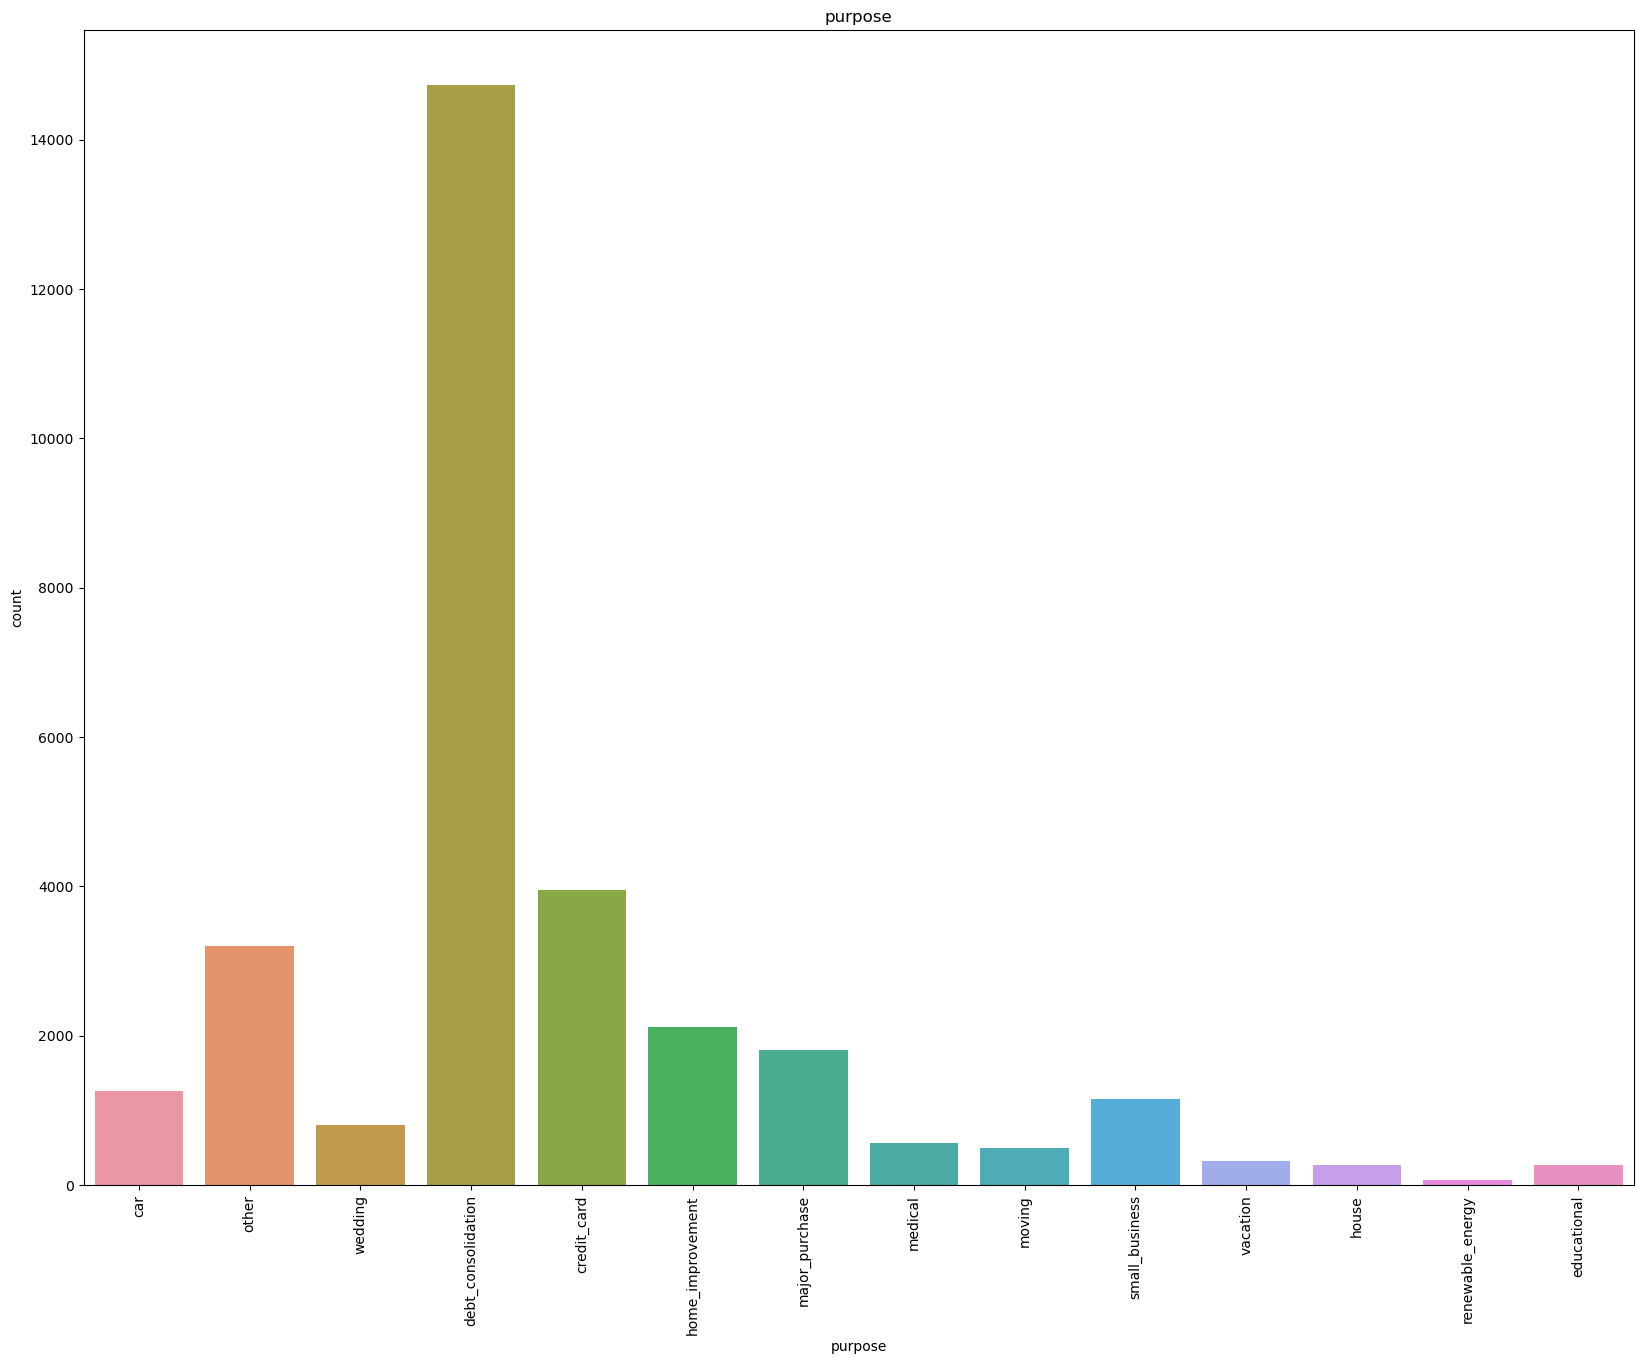

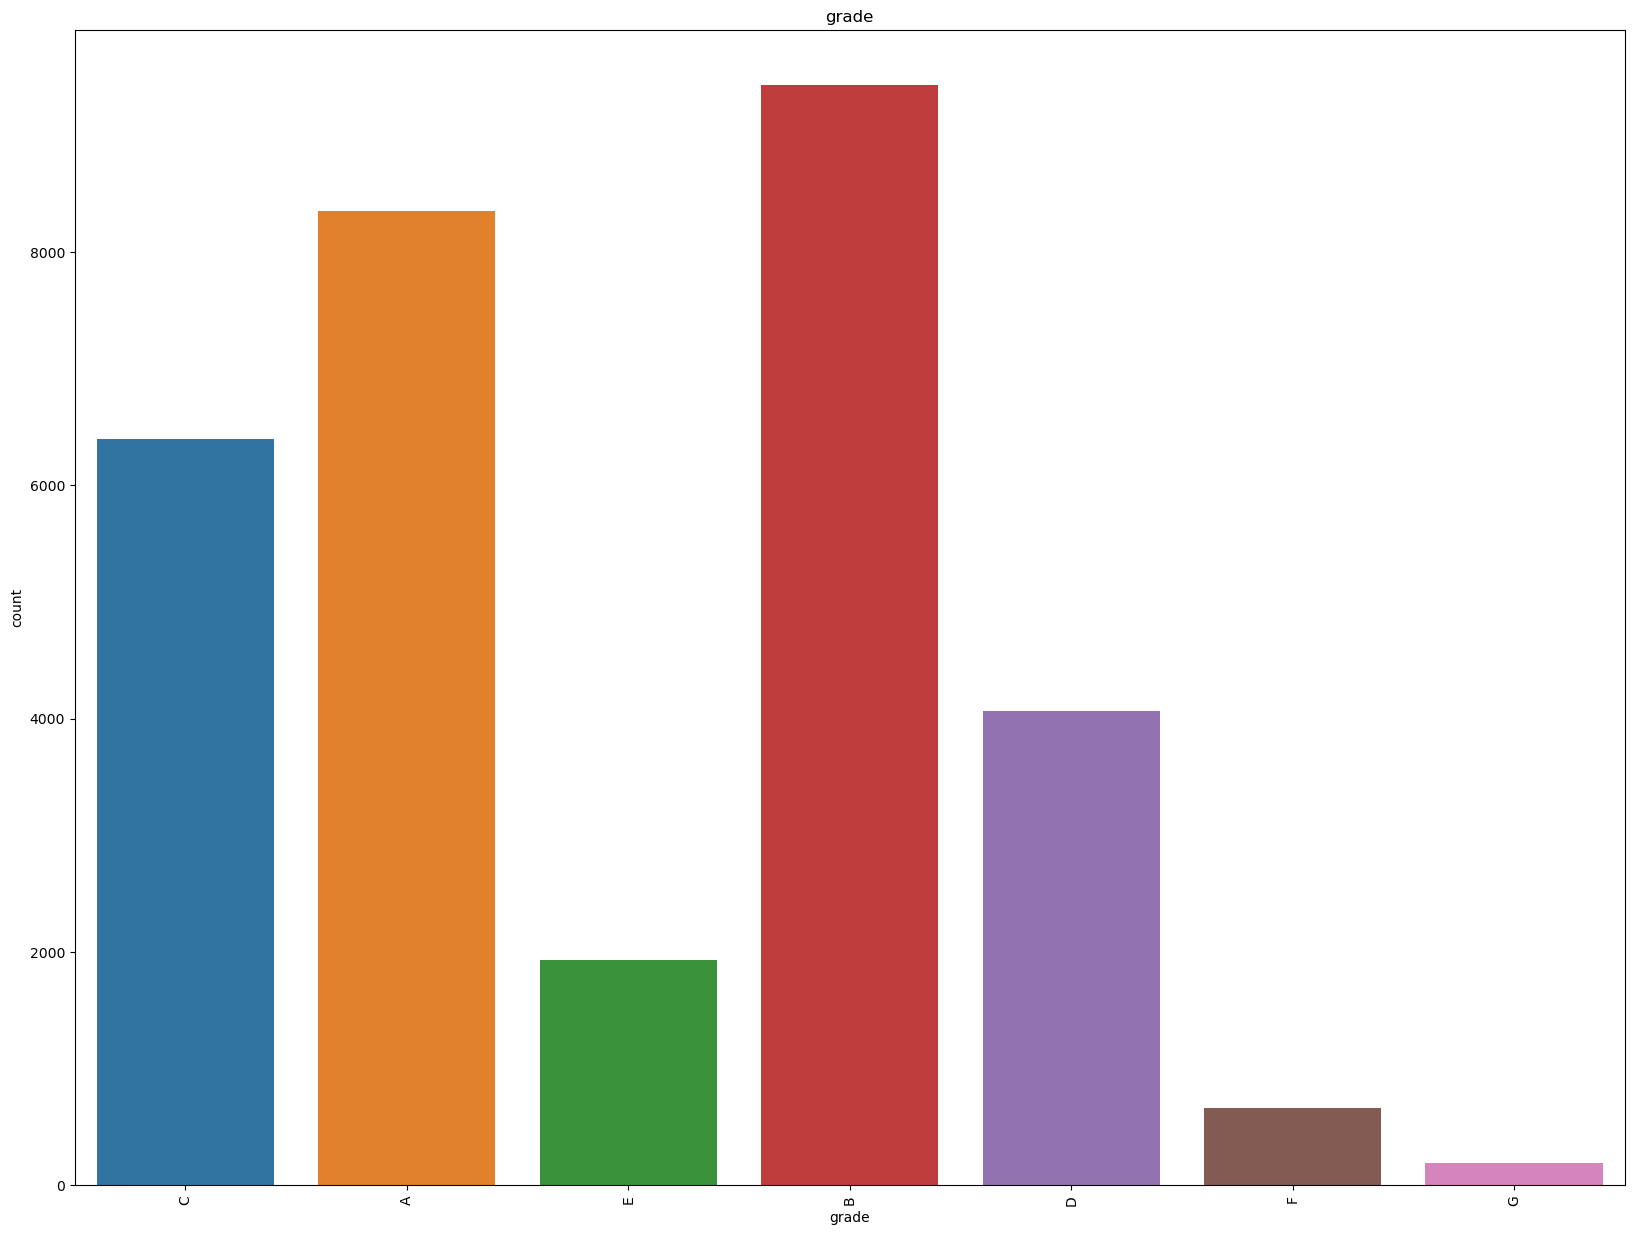

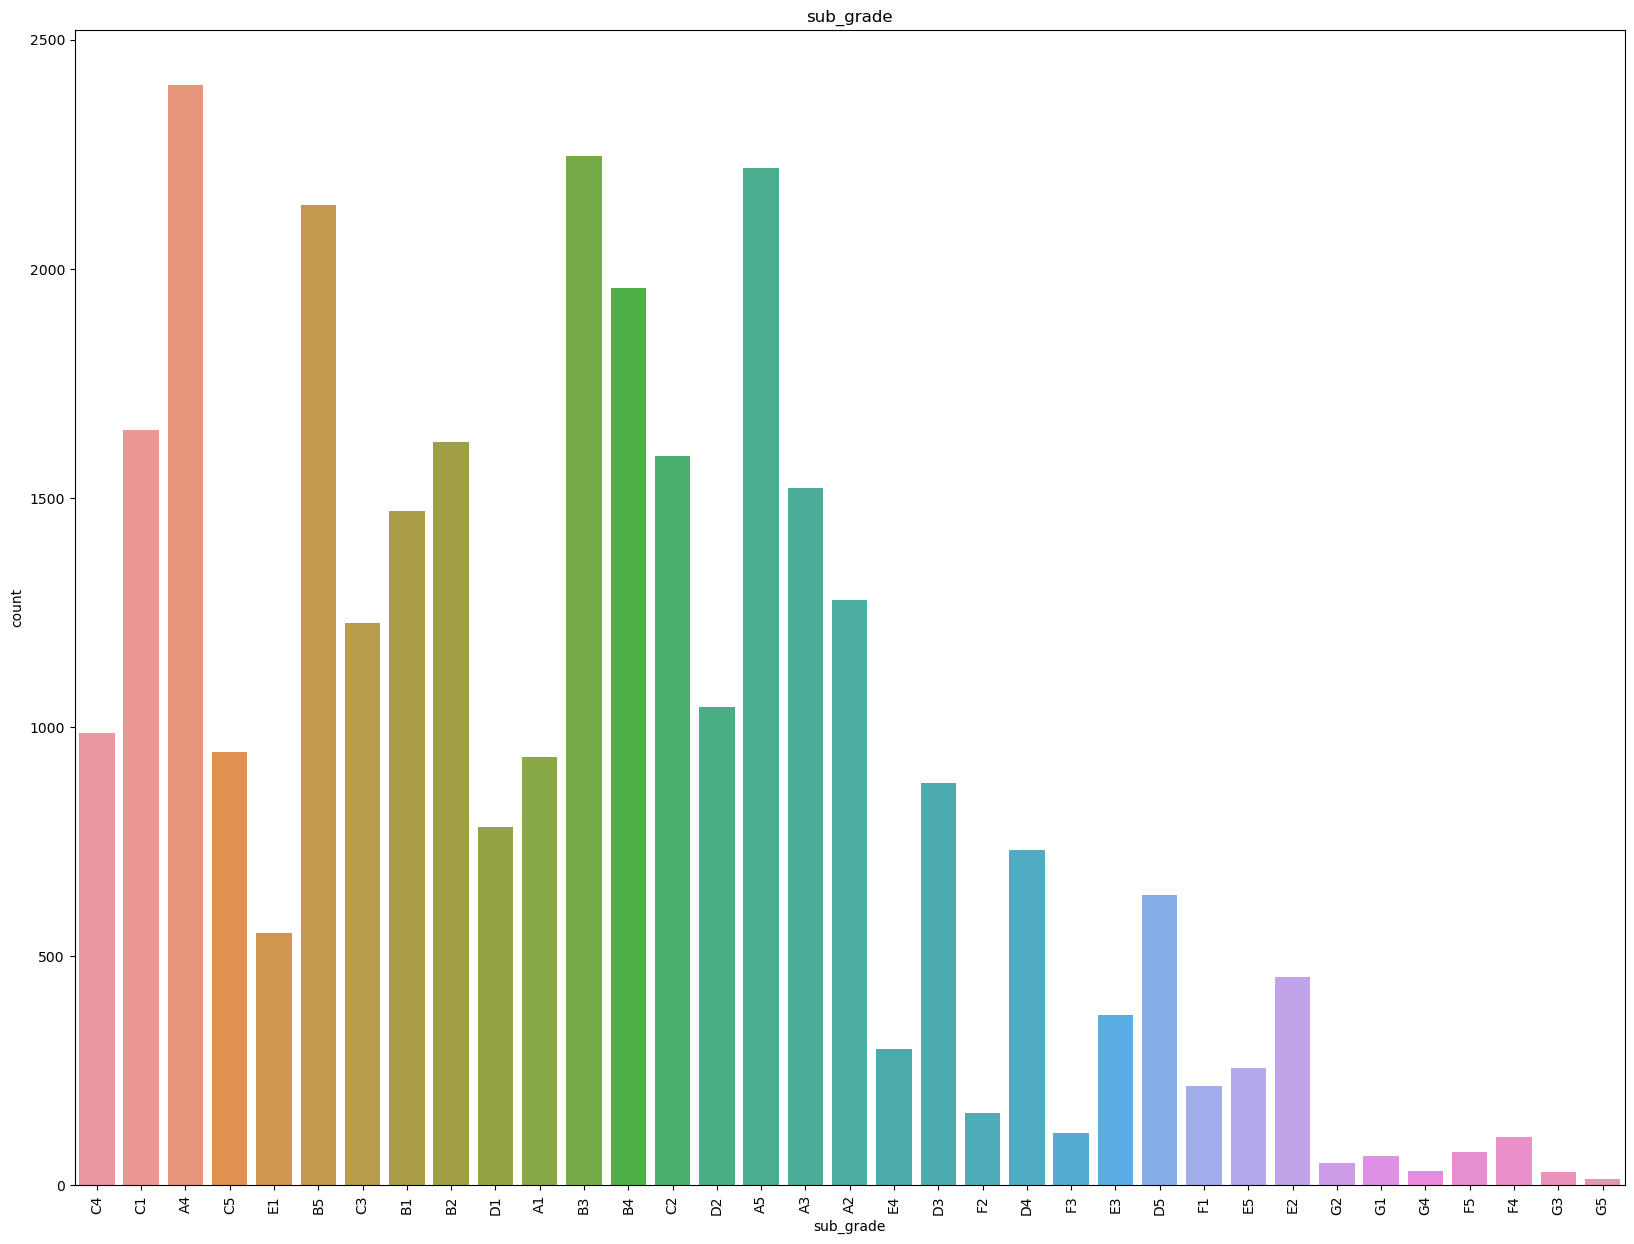

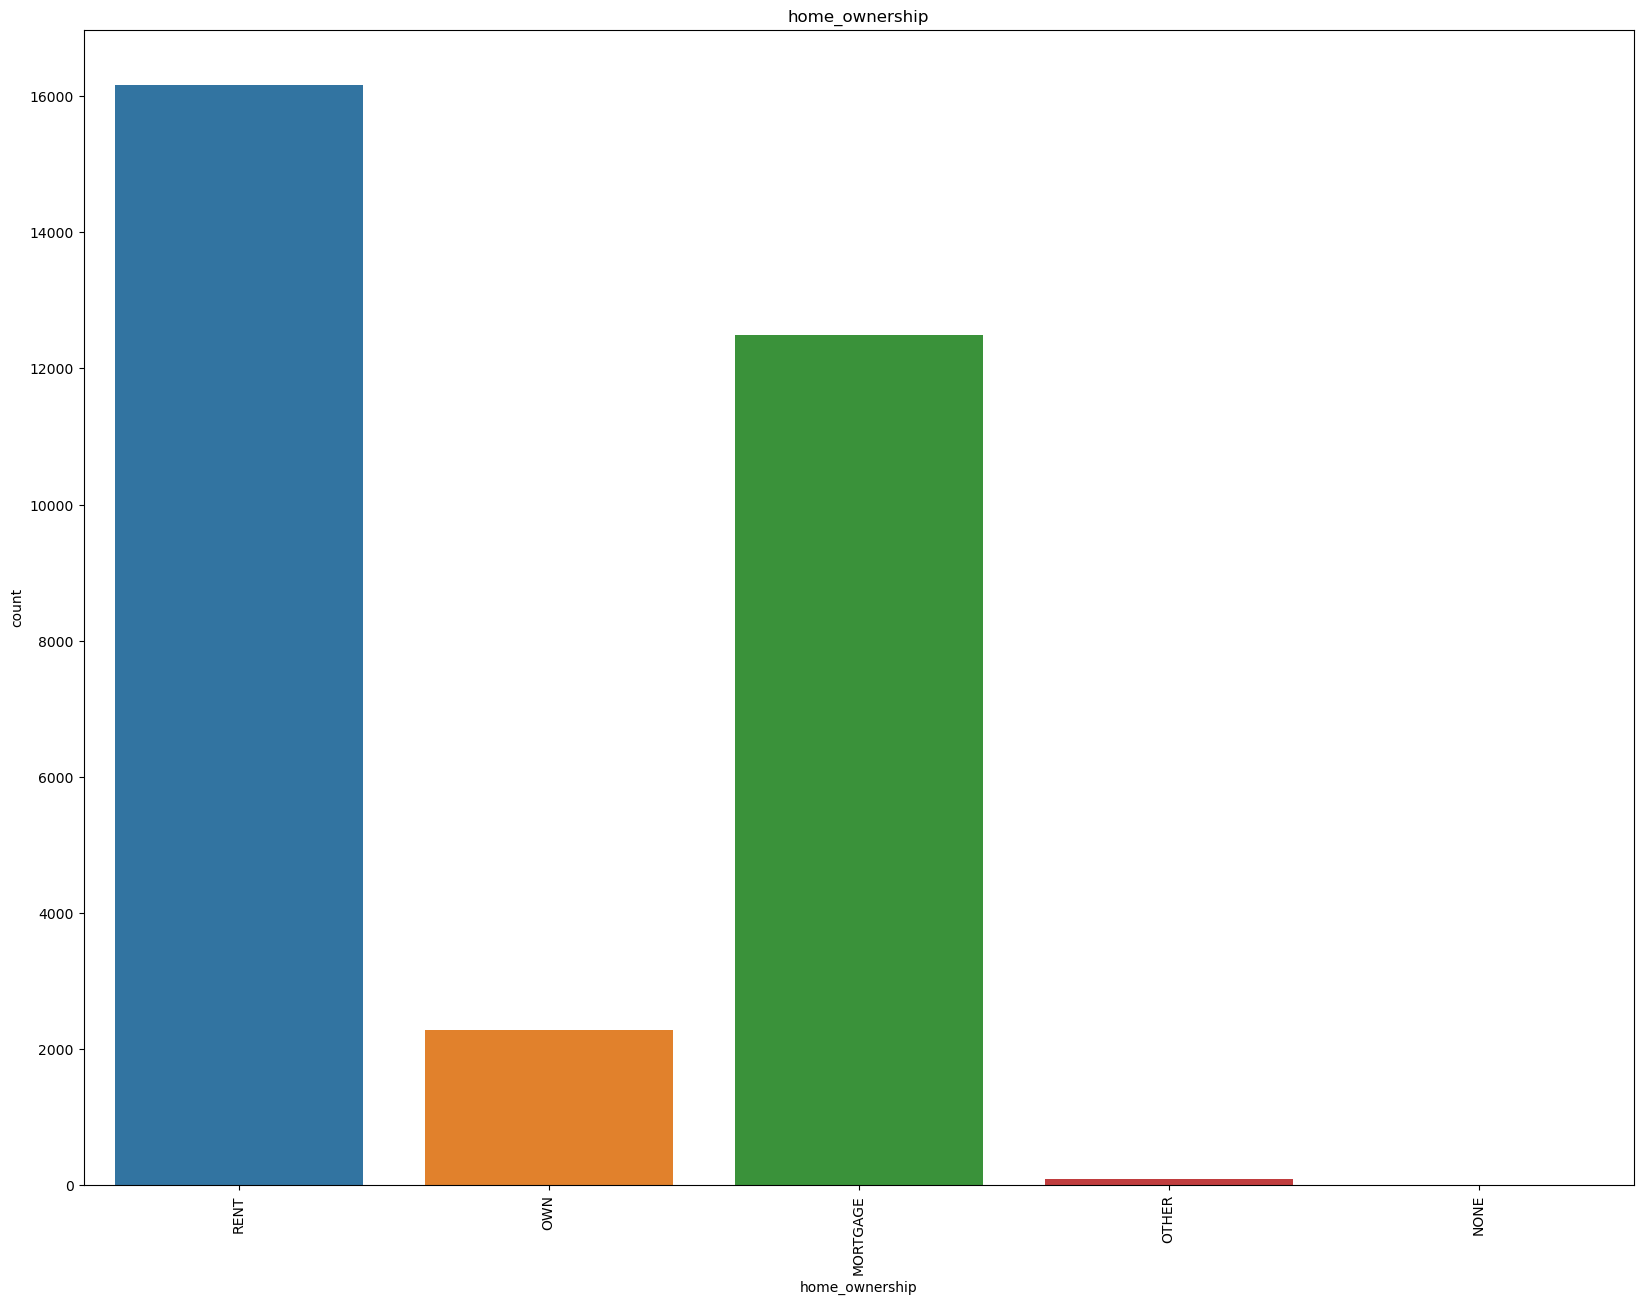

In [72]:
for i in categorical:
    plot_univariate_analysis_categorical(i)

## Insights from continouous univariate analysis

  
- loan amount range is 5300–15000
- Funded amount range is 5200–15000
- Funded amount investment range is 5000–14000
- Interest rate of the loan lies between 8.94–14.38 percent
- dti ratio lies between 8.13–18.56
- Employment length of the loan seekers is between 2–9 years where most of the people seeking loans have 4 years of employment length
- For most of the people, the number of delinquency incidents, derogatory public record, bankrupcies and enquieries in last 6 months are 0
- Only approx 30% of the people have healty revoling credit utilization


## Insights from categorical univariate analysis

- The job title for which the maximum loan is taken by the borrower is US Army.
- The zip code from which the maximum loan is taken by the borrower is 112xx
- The month the borrower’s earliest reported credit line was opened is October-99.
- Term for 36 months has more loan compared to 60 months
- Address of the state where most of the loans are taken is CA
- There are more than 14000 loans that are not verified
- Loan issue date for maximum loans is Dec-11
- The most recent month LC pulled credit for this loan is May-16.
- Loan status: Fully paid loan count is more than 25000, charged-off loans count is less than 5000
- Most of the loans are taken for debt_consolidation purpose
- For grade B, A4 subgrade has max loan count
- People who are staying on rent have more loans

#### Deriving Year and Month for loan issue date

In [73]:
loan_df['loan_issue_year'] = loan_df.issue_d.apply(lambda d : '20'+ d.split('-')[1])
loan_df['loan_issue_year'].value_counts()

2011    16161
2010     9491
2009     3888
2008     1305
2007      185
Name: loan_issue_year, dtype: int64

In [74]:
loan_df['loan_issue_month'] = loan_df.issue_d.apply(lambda d : d.split('-')[0])
loan_df['loan_issue_month'].value_counts()

Dec    3365
Nov    3168
Oct    2923
Sep    2783
Jul    2754
Aug    2744
Jun    2560
May    2400
Apr    2312
Mar    2179
Feb    1933
Jan    1909
Name: loan_issue_month, dtype: int64

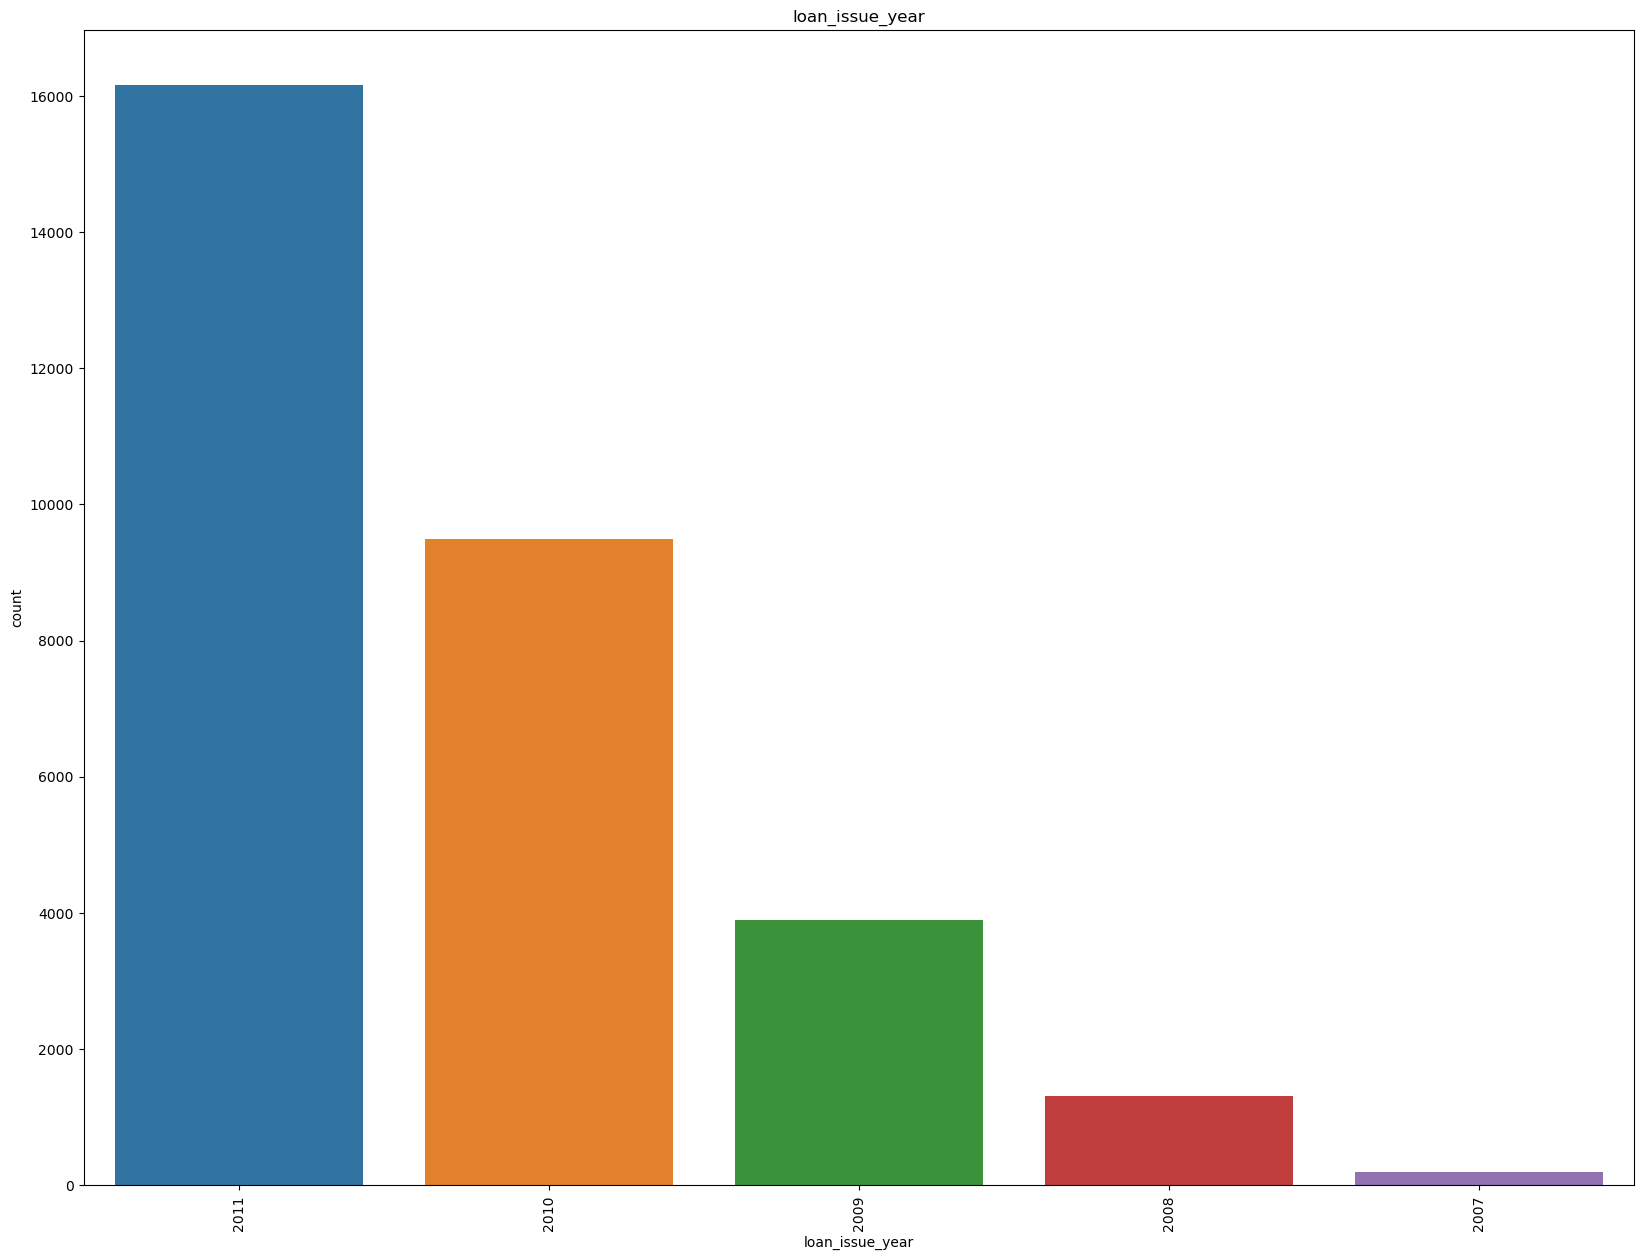

In [75]:
plot_univariate_analysis_categorical('loan_issue_year')

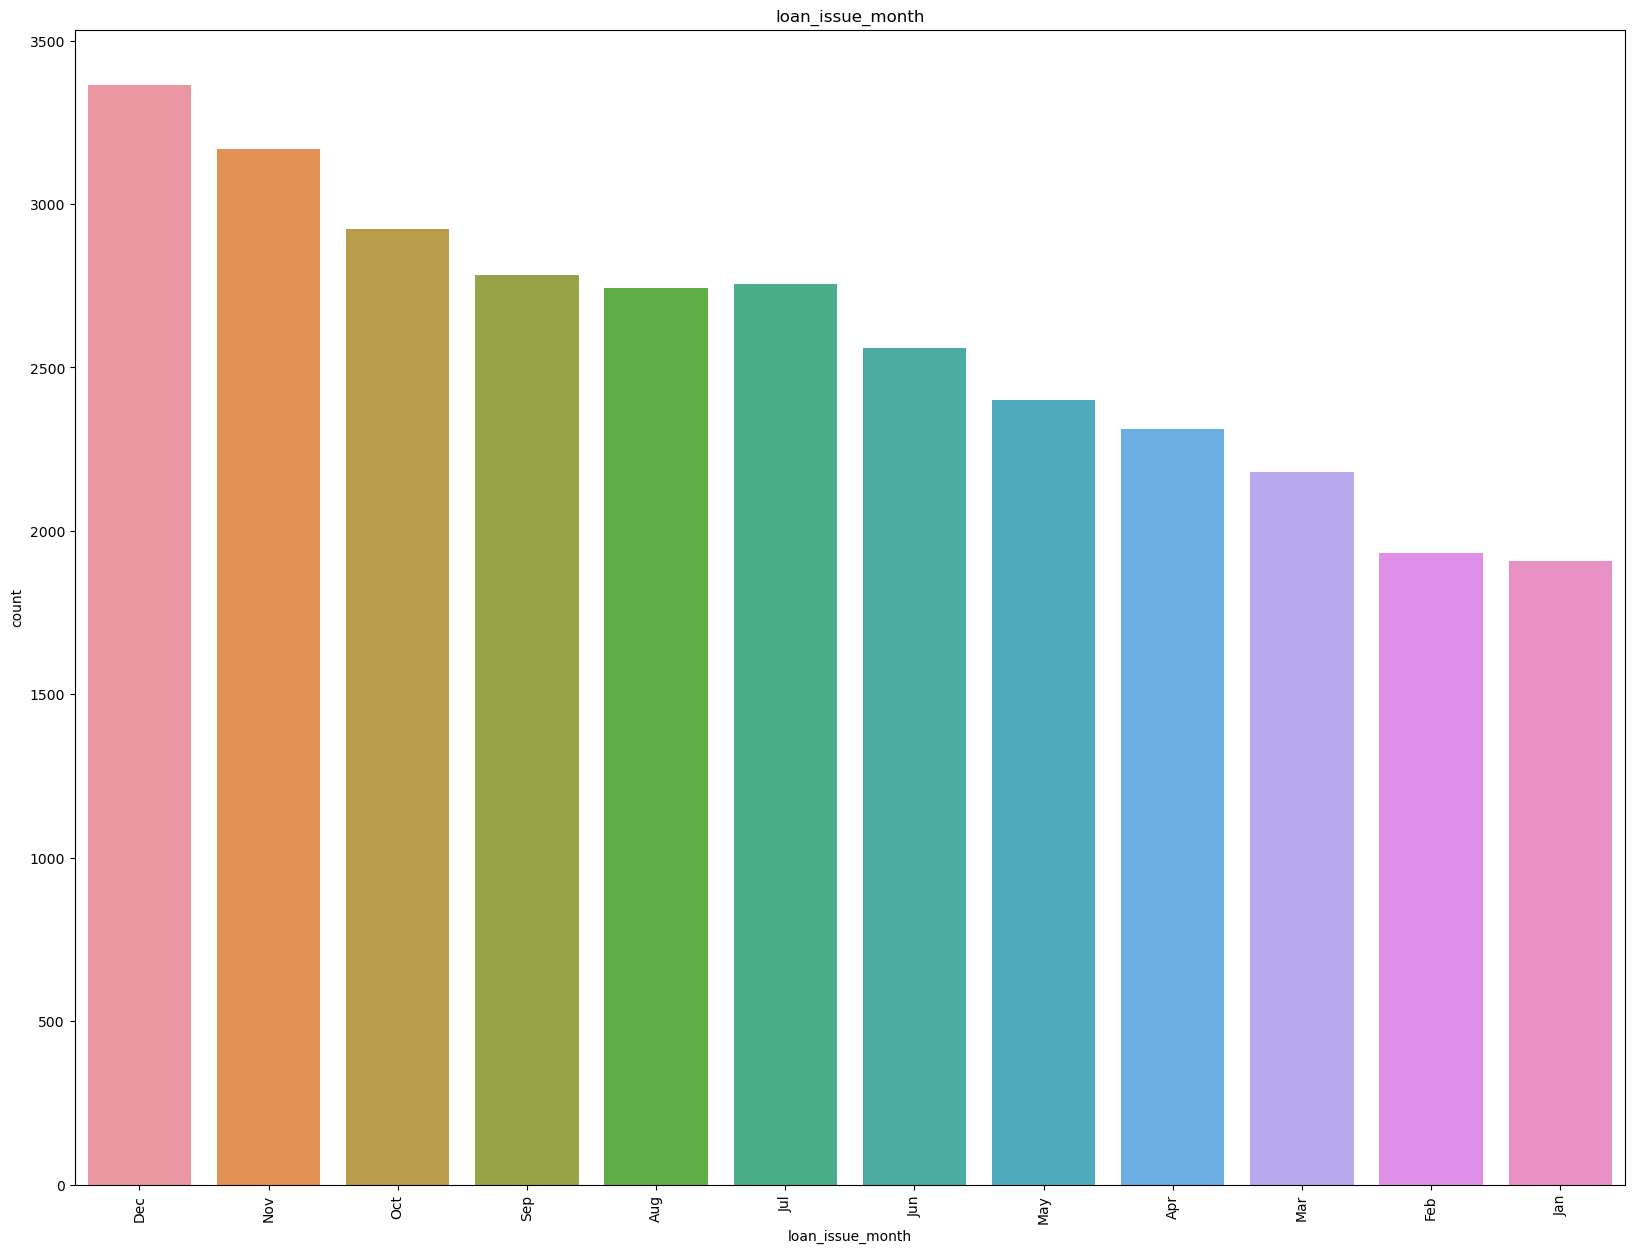

In [76]:
plot_univariate_analysis_categorical('loan_issue_month')

## Insights from derived categorical analysis

- Maximum loans are applied in December month
- Maximum loans are applied in 2011 year

## Segmented univariate analysis

#### Creating bins for segmented analysis

In [92]:
for i in continuous:
    minV = loan_df[i].min()
    maxV = loan_df[i].max()
    print(minV, "\t", maxV, "\t\t", i)

500 	 35000 		 loan_amnt
500 	 35000 		 funded_amnt
0.0 	 35000.0 		 funded_amnt_inv
5.42 	 24.4 		 int_rate
0.0 	 29.99 		 dti
0 	 10 		 emp_length
4000.0 	 140000.0 		 annual_inc
0 	 11 		 delinq_2yrs
0.0 	 120.0 		 mths_since_last_delinq
0 	 8 		 inq_last_6mths
0 	 4 		 pub_rec
0.0 	 2.0 		 pub_rec_bankruptcies
2 	 42 		 open_acc
2 	 90 		 total_acc
0 	 35954 		 revol_bal
0.0 	 99.9 		 revol_util
0.0 	 58563.67993 		 total_pymnt
0.0 	 58563.68 		 total_pymnt_inv
0.0 	 11873.37 		 last_pymnt_amnt
0.0 	 35000.02 		 total_rec_prncp
0.0 	 23563.68 		 total_rec_int
0.0 	 180.2 		 total_rec_late_fee


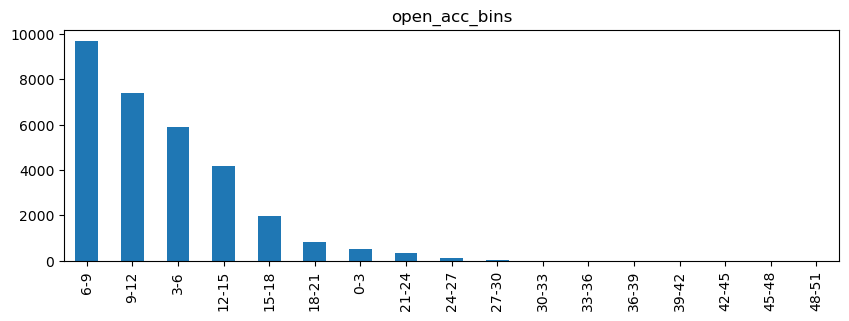

In [94]:
range_label = []
for i in range(0,50,3): 
    range_label.append(str(str(i)+'-'+str(i+3)))

bins = np.linspace(0, 50, 18)
    
loan_df['open_acc_bins'] = pd.cut(loan_df['open_acc'], bins, labels=range_label)

plt.figure(figsize = (10,3))
plt.title("open_acc_bins")
loan_df.open_acc_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()  

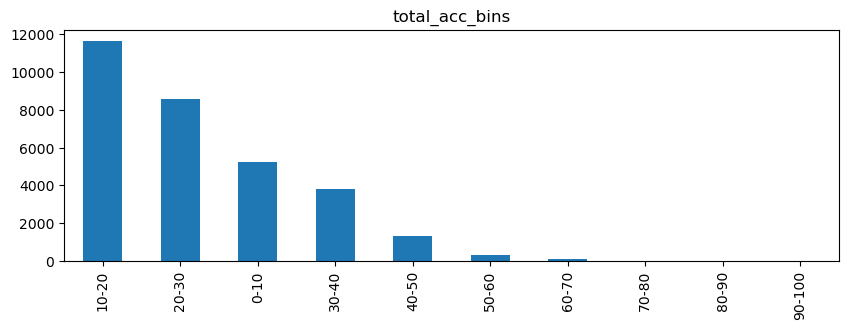

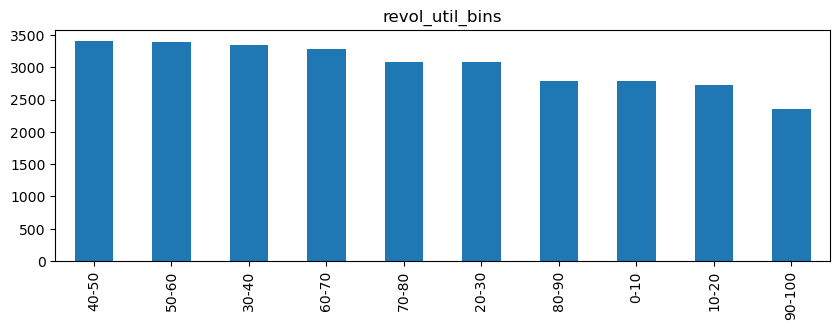

In [89]:
range_label = []
for i in range(0,100,10): 
    range_label.append(str(str(i)+'-'+str(i+10)))

bins = np.linspace(0, 100, 11)
    
loan_df['total_acc_bins'] = pd.cut(loan_df['total_acc'], bins, labels=range_label)
loan_df['revol_util_bins'] = pd.cut(loan_df['revol_util'], bins, labels=range_label)

plt.figure(figsize = (10,3))
plt.title("total_acc_bins")
loan_df.total_acc_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()  

plt.figure(figsize = (10,3))
plt.title("revol_util_bins")
loan_df.revol_util_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()   

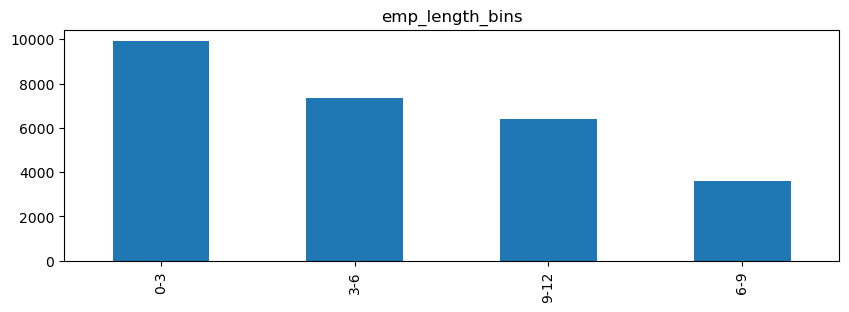

In [79]:
range_label = []
for i in range(0,12,3): 
    range_label.append(str(str(i)+'-'+str(i+3)))

bins = np.linspace(0, 12, 5)
    
loan_df['emp_length_bins'] = pd.cut(loan_df['emp_length'], bins, labels=range_label)

plt.figure(figsize = (10,3))
plt.title("emp_length_bins")
loan_df.emp_length_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()         


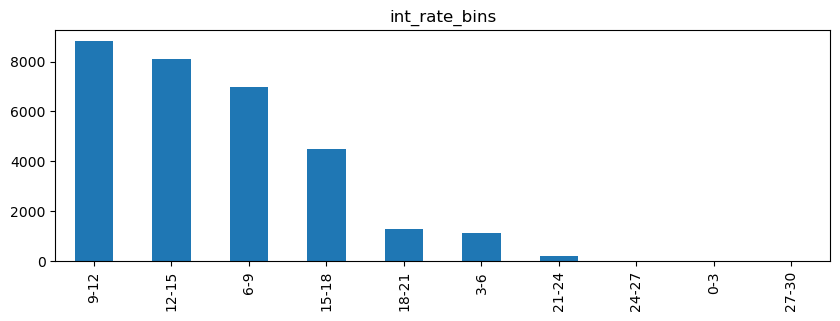

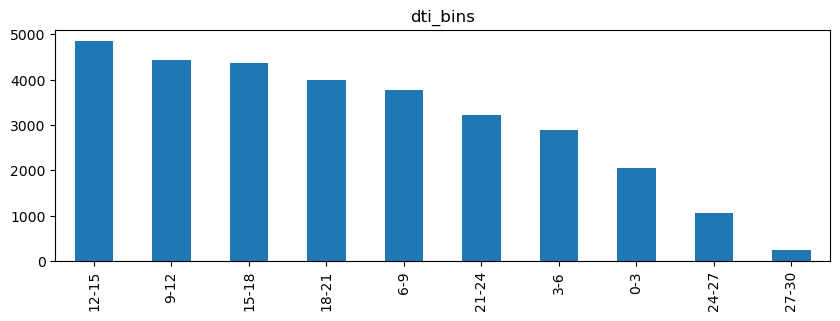

In [80]:
range_label = []
for i in range(0,30,3): 
    range_label.append(str(str(i)+'-'+str(i+3)))

bins = np.linspace(0, 30, 11)
    
loan_df['int_rate_bins'] = pd.cut(loan_df['int_rate'], bins, labels=range_label)
loan_df['dti_bins'] = pd.cut(loan_df['dti'], bins, labels=range_label)

plt.figure(figsize = (10,3))
plt.title("int_rate_bins")
loan_df.int_rate_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()         


plt.figure(figsize = (10,3))
plt.title("dti_bins")
loan_df.dti_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()   

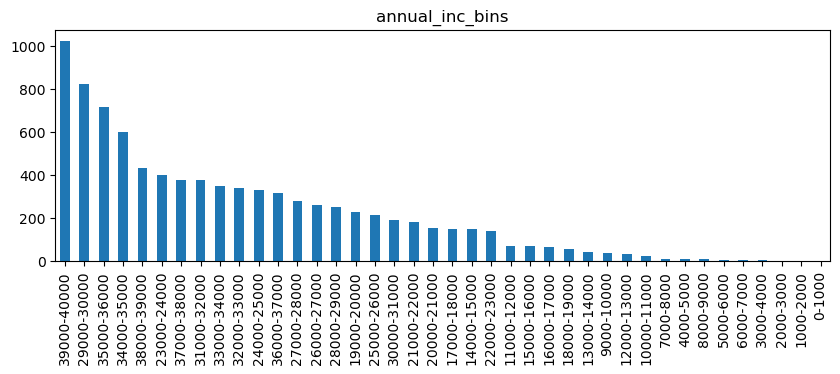

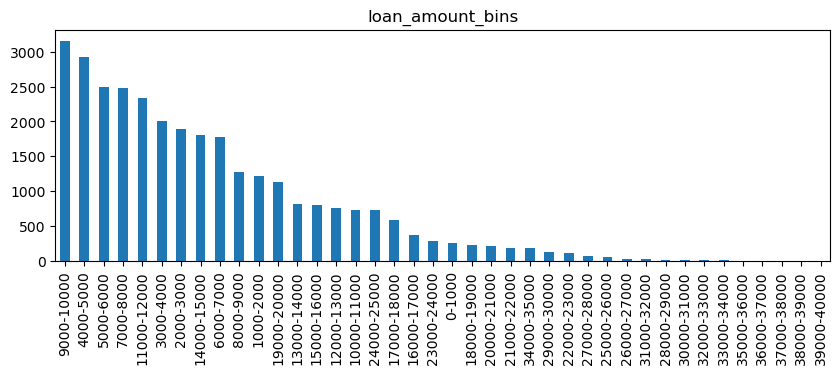

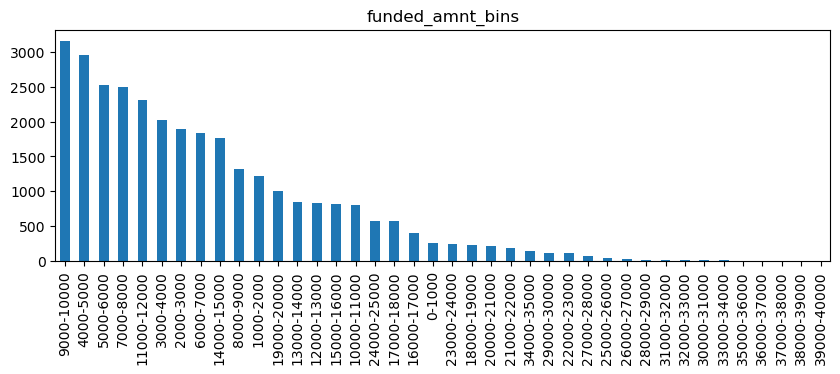

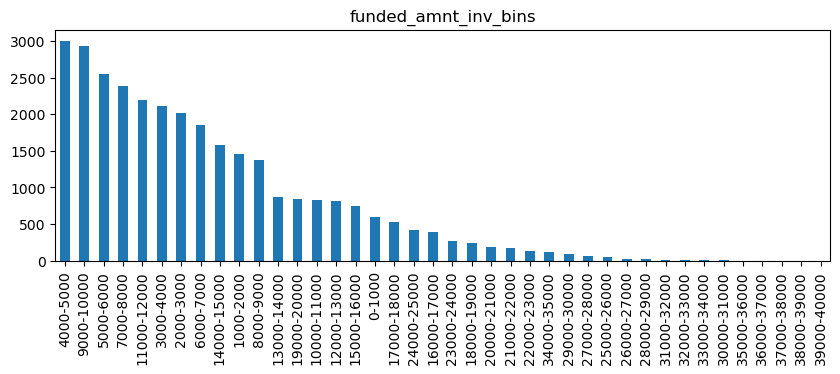

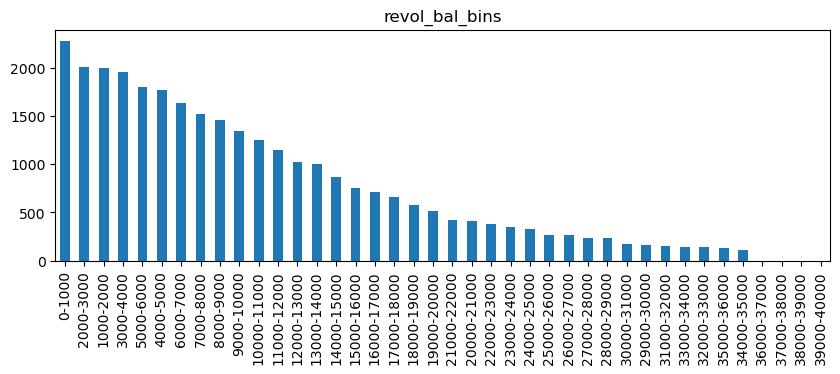

In [86]:
range_label = []
for i in range(0,40000,1000): 
    range_label.append(str(str(i)+'-'+str(i+1000)))

bins = np.linspace(0, 40000, 41)
loan_df['loan_amount_bins'] = pd.cut(loan_df['loan_amnt'], bins, labels=range_label)
loan_df['funded_amnt_bins'] = pd.cut(loan_df['funded_amnt'], bins, labels=range_label)
loan_df['funded_amnt_inv_bins'] = pd.cut(loan_df['funded_amnt_inv'], bins, labels=range_label)
loan_df['annual_inc_bins'] = pd.cut(loan_df['annual_inc'], bins, labels=range_label)
loan_df['revol_bal_bins'] = pd.cut(loan_df['revol_bal'], bins, labels=range_label)

plt.figure(figsize = (10,3))
plt.title("annual_inc_bins")
loan_df.annual_inc_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()
                                    
plt.figure(figsize = (10,3))
plt.title("loan_amount_bins")
loan_df.loan_amount_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize = (10,3))
plt.title("funded_amnt_bins")
loan_df.funded_amnt_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize = (10,3))
plt.title("funded_amnt_inv_bins")
loan_df.funded_amnt_inv_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize = (10,3))
plt.title("revol_bal_bins")
loan_df.revol_bal_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()

## Insights from segmented analysis of the continuous data

- The loan amount range for maximum loan count is 9000–10000.
- Maximum count of funded amount range by LC is 9000–10000.
- Maximum count of the amount approved by the investor is 4000–5000
- Borrowers with annual income between 39000–40000 applies for the maximum loan.
- Max count of interest rate range applied on Loans is 12-15
- dti ratio for maximum loans is 12-15
- revol_bal for most of the loans lies between 0-1000
- Maximum loan applicants have 6-9 open accounts
- Maximum loan applicants have 10-20 total accounts

## Heatmap to analyze correlation between continuous data

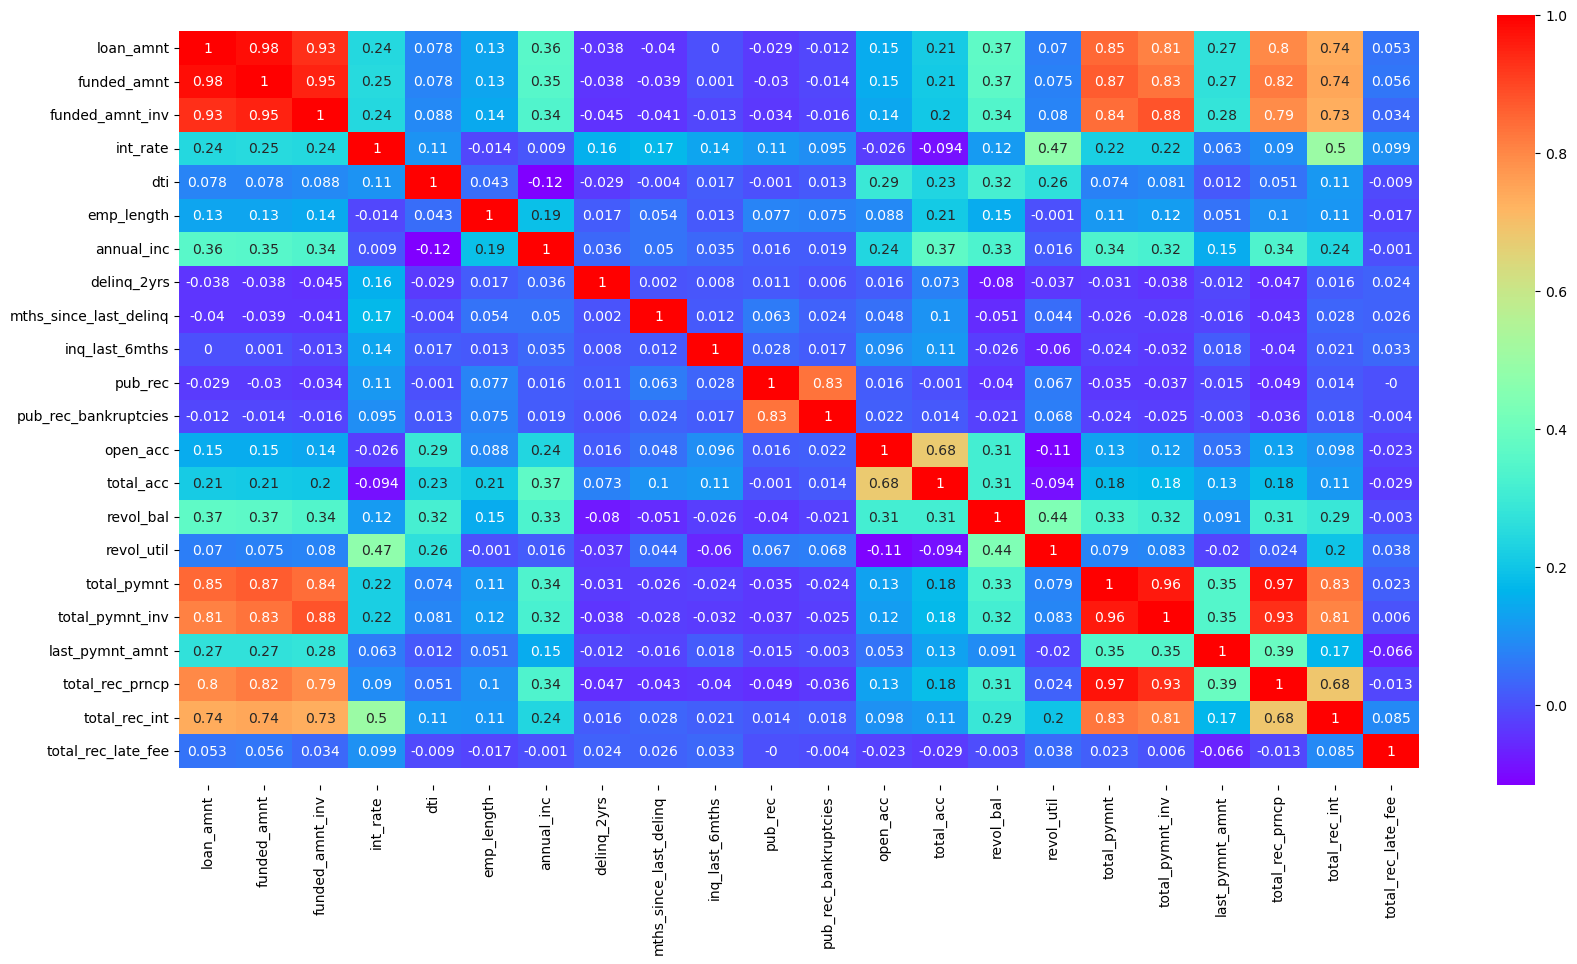

In [101]:
cor = round(loan_df[continuous].corr(),3)
# figure size
plt.figure(figsize=(20,10))
# heatmap
ax = sns.heatmap(cor, cmap = "rainbow", annot=True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

#### Above heat map shows that loan_amt,funded_amt,funded_amt_inv are highly correlated. It implies that investors lend approx 95 percent of the loan amount claimed by the borrower.
#### Also total_pymnt, total_pymnt_inv, total_rec_prncp are highly correlated. It implies that borrower has paid approx 96 percent of the money investors lended.

## Bivariate analysis for categorical variables with the rate of charge off